In [1]:
from Predict_lc import PredictLightCurve
from LightCurve import LightCurve

In [2]:
import numpy as np
from dataframe import Data
from io_utils import *
import matplotlib.pyplot as plt
from astropy.table import Table, vstack

In [3]:
dataset_val = 1

In [4]:
if dataset_val == 0:
    dataset =  "PLAsTiCC"
    data_ob = load_PLAsTiCC_data()
    object_ids = data_ob.get_all_object_ids()
    kilonova_ids=data_ob.get_ids_of_event_type(64)
    color_band_dict = {0:'C4',1:'C2', 2:'C3', 3:'C1', 4:'k', 5:'C5'}
    bands = [0,1,2,3,4,5]
    #transient_filter_load_saved(data_ob=data_ob)

In [6]:
if dataset_val == 1:    
    dataset = "ZTF"
    data_ob = load_ztf_mixed()
    
    
    data_ob.df_data.sort(['SNID','MJD'])
    data_ob.df_metadata.sort(['SNID'])
    #Error with load_ztf_mixed()
    object_ids = data_ob.get_all_object_ids()
    #kilonova_ids = object_ids
    bands = ['g', 'r']
    color_band_dict = {'g':'C2', 'r':'C3'}

In [9]:
max_mjds = []
min_mjds = []

for object_id in object_ids:
    lc = LightCurve(data_ob, object_id)
    current_min = np.amin(lc.df[data_ob.time_col_name])
    current_max = np.amax(lc.df[data_ob.time_col_name])
    max_mjds.append(current_max)
    min_mjds.append(current_min)

print(np.amax(min_mjds))
print(np.amin(max_mjds))

57606.5029
57451.2961


In [ ]:
data_ob.df_data

In [ ]:
data_ob.df_data['FLT']

In [11]:
from prediction_evaluation import ztf_ob_type_name #add the function to dataframe class

In [ ]:
print(data_ob.df_data['FLT'])

In [ ]:
np.random.shuffle(object_ids)

In [ ]:
print(object_ids)

In [14]:
from random import random

   MJD     FLT    FIELD     PHOTFLAG PHOTPROB ... SKY_SIG ZEROPT SIM_MAGOBS SNID
---------- --- ------------ -------- -------- ... ------- ------ ---------- ----
57434.1094   r 553                 0      0.0 ...   75.88  28.53       99.0 8267
57434.1436   g 553                 0      0.0 ...    79.8  28.79       99.0 8267
57438.1321   g 553                 0      0.0 ...  147.14  29.07       99.0 8267
57559.4756   g 553                 0      0.0 ...  150.14  29.02       99.0 8267
57562.4559   g 553                 0      0.0 ...  116.31  28.92       99.0 8267
57562.4757   r 553                 0      0.0 ...   84.32  28.41       99.0 8267
57572.4578   g 553                 0      0.0 ...   35.33  28.32       99.0 8267
 57572.479   r 553                 0      0.0 ...   44.61  28.43       99.0 8267
57575.4421   g 553                 0      0.0 ...    33.7  28.36       99.0 8267
57575.4621   r 553                 0      0.0 ...   44.96  28.62       99.0 8267
       ... ...          ... 

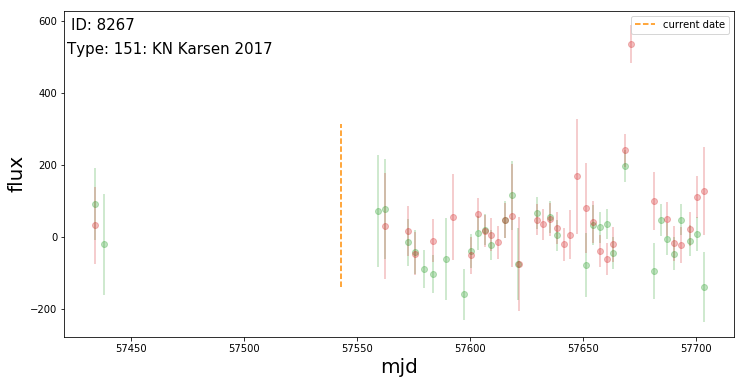

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID
---------- --- ------------ -------- ... ------- ------ ---------- -----
57433.3225   r 751                 0 ...    44.3  28.54       99.0 14868
57433.3645   g 751                 0 ...   26.29  28.15       99.0 14868
57436.2598   r 751                 0 ...   72.65  28.58       99.0 14868
 57436.327   g 751                 0 ...   71.57  28.61       99.0 14868
57439.3056   r 751                 0 ...  116.67  28.52       99.0 14868
57443.2944   g 751                 0 ...  113.55  28.84       99.0 14868
57443.3367   r 751                 0 ...   87.85  28.53       99.0 14868
57451.2584   g 751                 0 ...   23.65  28.11       99.0 14868
57451.2878   r 751                 0 ...   37.75  28.55       99.0 14868
57454.2831   g 751                 0 ...   24.14  28.11       99.0 14868
       ... ...          ...      ... ...     ...    ...        ...   ...
 57687.534   r 751                 0 ...   50.66  2

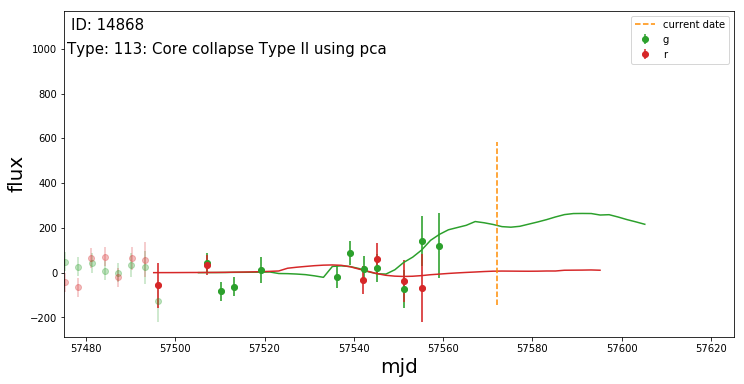

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID
---------- --- ------------ -------- ... ------- ------ ---------- -----
57435.5555   g 797                 0 ...   29.78  28.25       99.0 61560
57443.5304   r 797                 0 ...   74.37  28.56       99.0 61560
57443.5514   g 797                 0 ...  122.12   28.9       99.0 61560
57452.5304   g 797                 0 ...   31.18  28.24       99.0 61560
57455.5103   g 797                 0 ...   26.93  28.19       99.0 61560
57455.5304   r 797                 0 ...    37.4   28.5       99.0 61560
57458.5285   g 797                 0 ...   26.07  28.14       99.0 61560
57461.4753   g 797                 0 ...   26.82  28.22       99.0 61560
57461.5311   r 797                 0 ...    40.0  28.64       99.0 61560
57467.4749   g 797                 0 ...   70.36  28.65       99.0 61560
       ... ...          ...      ... ...     ...    ...        ...   ...
57686.0998   r 797                 0 ...    42.4  2

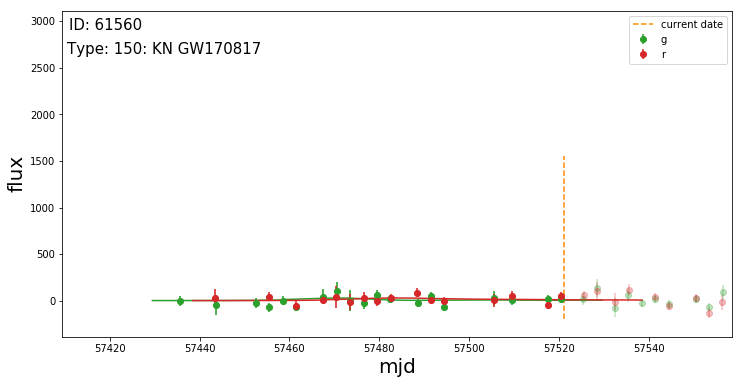

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID
---------- --- ------------ -------- ... ------- ------ ---------- -----
57433.4086   r 756                 0 ...   39.94  28.59       99.0 72277
 57433.426   g 756                 0 ...   23.49  28.11       99.0 72277
57436.3839   g 756                 0 ...   59.53  28.58       99.0 72277
57436.4485   r 756                 0 ...   47.88  28.54       99.0 72277
57439.3618   r 756                 0 ...  103.78  28.62       99.0 72277
57439.4031   g 756                 0 ...  190.23  29.11       99.0 72277
57444.4093   g 756                 0 ...   92.61  28.75       99.0 72277
57444.4312   r 756                 0 ...   79.09  28.52       99.0 72277
57451.3526   r 756                 0 ...   40.73   28.6       99.0 72277
57451.3849   g 756                 0 ...    23.0  28.09       99.0 72277
       ... ...          ...      ... ...     ...    ...        ...   ...
57683.5228   g 756                 0 ...   90.67  2

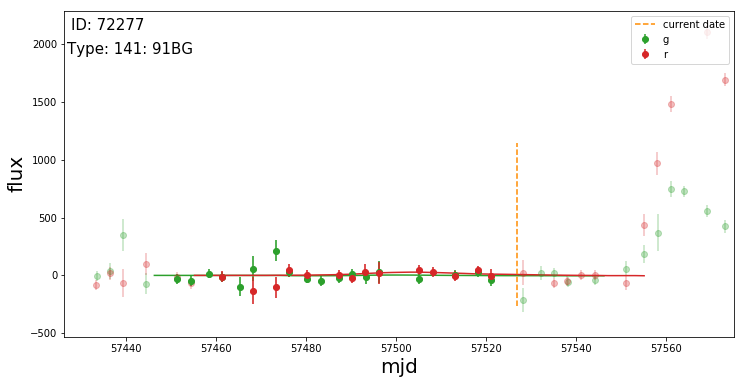

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID
---------- --- ------------ -------- ... ------- ------ ---------- -----
57433.4874   g 719                 0 ...   22.96  28.08       99.0 91515
57433.5142   r 719                 0 ...   35.84  28.52       99.0 91515
57436.4941   g 719                 0 ...   23.72  28.09  23.141905 91515
 57436.527   r 719                 0 ...   35.86  28.52  23.386324 91515
57439.4419   r 719                 0 ...   86.24  28.57  22.518465 91515
 57439.561   g 719                 0 ...   47.71  28.43   22.26513 91515
57443.4203   g 719                 0 ...  124.08  28.94  21.593996 91515
57443.4924   r 719                 0 ...   79.75  28.49  21.769123 91515
57451.3996   g 719              4096 ...   24.43  28.16  20.808836 91515
57451.4488   r 719              6144 ...   35.73  28.53  20.926218 91515
       ... ...          ...      ... ...     ...    ...        ...   ...
57575.2285   r 719                 0 ...   39.15  2

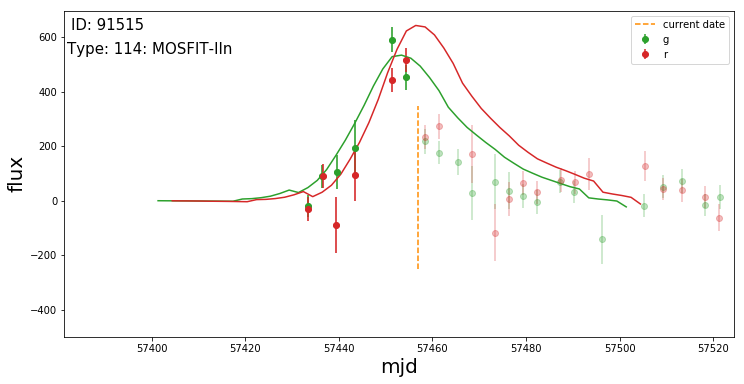

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57533.4606   r 389                 0 ...   112.9  28.54  19.219883 114668
57537.4279   g 389                 0 ...   64.16  28.67  19.252972 114668
57537.4417   r 389                 0 ...   75.59  28.57  19.228313 114668
57540.4634   g 389                 0 ...   37.81  28.36  19.301962 114668
57543.4621   r 389                 0 ...   47.22   28.6  19.257061 114668
57546.4272   g 389                 0 ...   33.24  28.34   19.26048 114668
57546.4624   r 389                 0 ...   47.23  28.58   19.23451 114668
57552.4599   r 389                 0 ...   48.35  28.57  19.216139 114668
57555.3577   g 389                 0 ...   84.54  28.85   19.23026 114668
57558.4377   g 389                 0 ...  148.58  29.06  19.188879 114668
       ... ...          ...      ... ...     ...    ...        ...    ...
 57662.211   g 389                 0 .

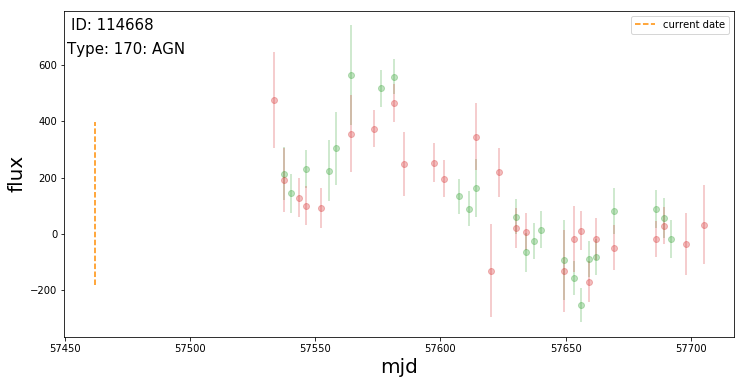

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57537.4408   r 338                 0 ...   69.15  28.49       99.0 116775
 57537.477   g 338                 0 ...   74.45  28.72       99.0 116775
57546.4383   g 338                 0 ...   35.89  28.39       99.0 116775
 57546.461   r 338                 0 ...   48.31  28.49       99.0 116775
57552.4392   g 338                 0 ...   34.19  28.34       99.0 116775
57555.3568   g 338                 0 ...   86.51  28.86       99.0 116775
57576.3776   g 338                 0 ...   35.91  28.36       99.0 116775
57576.4177   r 338                 0 ...   45.11  28.49       99.0 116775
57585.3379   g 338                 0 ...   97.87  28.87       99.0 116775
57585.3567   r 338                 0 ...   79.35  28.47       99.0 116775
       ... ...          ...      ... ...     ...    ...        ...    ...
57669.1683   r 338                 0 .

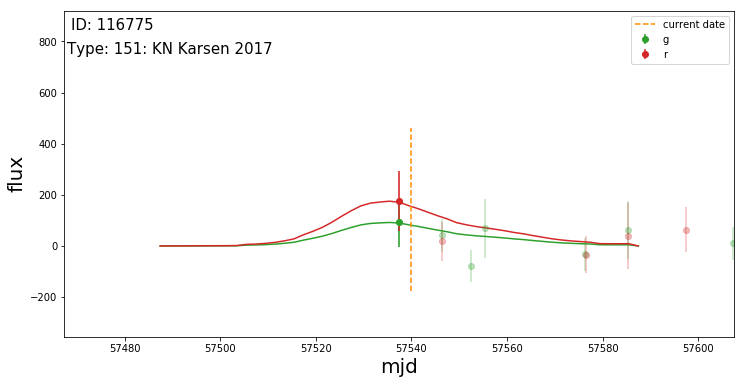

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
  57434.42   g 474                 0 ...   25.75  28.16   98.53649 122694
57437.3406   g 474                 0 ...  103.58  28.92   98.53649 122694
57452.3956   g 474                 0 ...   25.41  28.13   98.53649 122694
57455.3312   g 474                 0 ...   29.93  28.27   98.53649 122694
57460.3313   g 474              4096 ...   27.75  28.21  20.819546 122694
57460.3372   r 474              4096 ...   41.84  28.54  21.071255 122694
57463.3323   r 474                 0 ...    49.5  28.53   20.84828 122694
57463.3775   g 474              6144 ...   27.89  28.17   20.46695 122694
57466.3159   r 474                 0 ...   77.19  28.54  24.707111 122694
57469.2908   g 474                 0 ...  273.77  29.27  26.229948 122694
57469.3073   r 474                 0 ...  158.11  28.53   24.63832 122694
57473.2556   g 474                 0 .

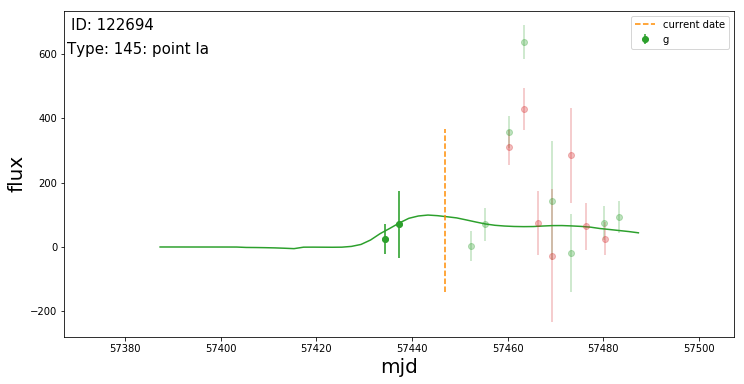

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57517.4605   g 545                 0 ...   34.37  28.41       99.0 166268
57517.4822   r 545                 0 ...   58.22  28.58       99.0 166268
57525.4779   g 545                 0 ...   32.64  28.27       99.0 166268
57532.4776   r 545                 0 ...   85.41  28.54  24.314428 166268
57537.4563   r 545                 0 ...   67.14  28.43  23.628143 166268
57537.4621   g 545                 0 ...   64.88  28.63  23.928263 166268
57540.4422   r 545                 0 ...   46.83  28.62  23.339956 166268
57540.4667   g 545                 0 ...    35.7  28.31  23.668678 166268
57543.4567   g 545                 0 ...   28.06   28.2  23.463293 166268
57543.4655   r 545                 0 ...   40.35  28.51  23.103662 166268
       ... ...          ...      ... ...     ...    ...        ...    ...
57672.2106   g 545                 0 .

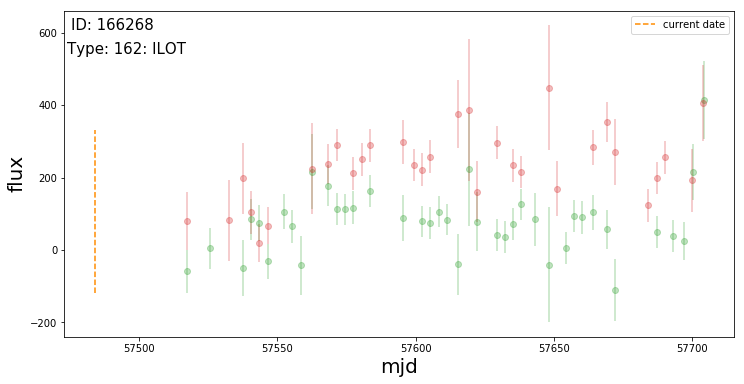

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57439.5459   g 587                 0 ...   65.64  28.64       99.0 170700
57443.5227   r 587                 0 ...   78.08  28.63       99.0 170700
57451.5266   g 587                 0 ...   38.73  28.35       99.0 170700
57456.5061   g 587                 0 ...   28.01  28.22       99.0 170700
57459.5174   r 587                 0 ...    37.4  28.49       99.0 170700
57459.5241   g 587                 0 ...   26.27  28.22       99.0 170700
57462.5246   r 587                 0 ...    40.3  28.62       99.0 170700
57465.5194   g 587                 0 ...   25.93  28.19       99.0 170700
 57465.527   r 587                 0 ...   41.29  28.59       99.0 170700
57469.5021   g 587                 0 ...   96.87  28.82       99.0 170700
       ... ...          ...      ... ...     ...    ...        ...    ...
57651.1288   g 587                 0 .

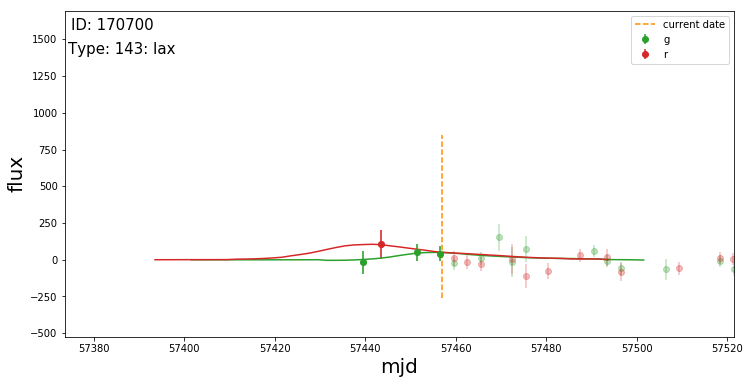

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.5525   g 798                 0 ...   30.68  28.28   98.64162 210856
57444.5368   r 798                 0 ...    68.7  28.48   98.64162 210856
57444.5539   g 798                 0 ...  101.95  28.86   98.64162 210856
57452.5406   g 798                 0 ...   32.15  28.29   98.64162 210856
57455.5088   g 798                 0 ...    28.8  28.21   98.64162 210856
57455.5385   r 798                 0 ...    39.9  28.55   98.64162 210856
57459.5106   r 798                 0 ...   41.09   28.6   98.64162 210856
 57459.534   g 798                 0 ...    27.1  28.19   98.64162 210856
57467.4453   r 798                 0 ...   78.84  28.59   98.64162 210856
 57467.493   g 798                 0 ...   52.02  28.53   98.64162 210856
       ... ...          ...      ... ...     ...    ...        ...    ...
57686.1156   g 798                 0 .

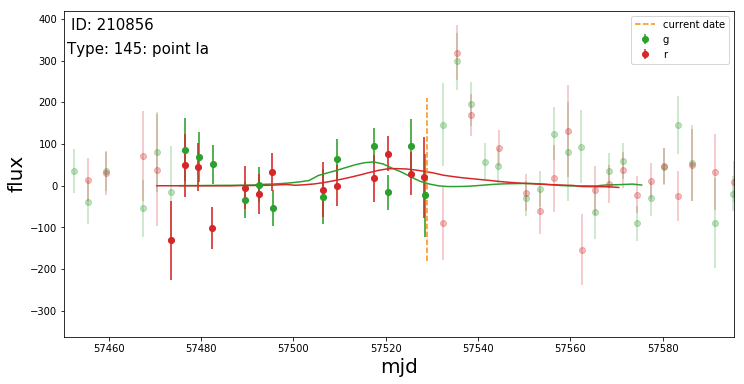

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
 57433.239   g 856                 0 ...   56.13  28.61   98.06117 231534
57436.1377   r 856                 0 ...   76.48  28.57   98.06117 231534
57436.1621   g 856                 0 ...   86.74  28.75   98.06117 231534
57439.1388   r 856                 0 ...   90.95  28.57   98.06117 231534
 57439.253   g 856                 0 ...  152.18  29.08   98.06117 231534
57443.2345   g 856                 0 ...  114.48  28.93   98.06117 231534
57443.2764   r 856                 0 ...    89.4  28.47   98.06117 231534
57451.1751   r 856                 0 ...   47.14  28.54   98.06117 231534
57451.2018   g 856                 0 ...   33.55  28.32   98.06117 231534
57454.2005   g 856                 0 ...   35.34  28.36   98.06117 231534
       ... ...          ...      ... ...     ...    ...        ...    ...
57687.3653   g 856                 0 .

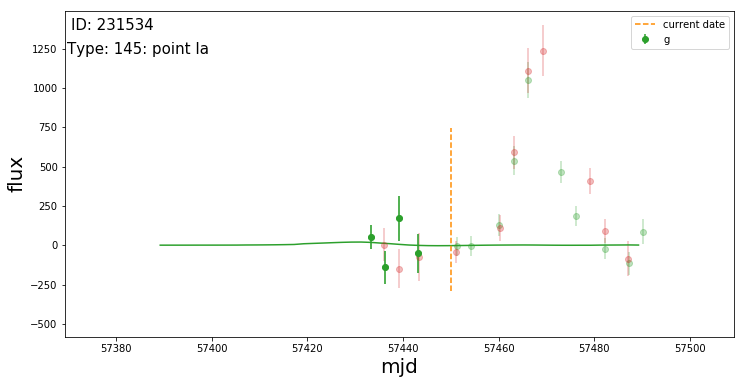

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
 57433.342   r 669                 0 ...   41.25  28.53    22.2209 238544
57433.4366   g 669                 0 ...   23.01   28.1  23.104263 238544
 57436.331   g 669                 0 ...   65.86  28.57  23.078224 238544
57436.3384   r 669                 0 ...   66.37  28.51  22.177942 238544
57439.2747   g 669                 0 ...  180.01  29.14  23.052366 238544
57439.3238   r 669                 0 ...  126.05   28.5  22.136768 238544
57444.2809   g 669                 0 ...   83.87  28.72   23.01504 238544
57444.3054   r 669                 0 ...   81.23  28.52  22.074709 238544
57451.2999   g 669                 0 ...   23.71  28.08  22.971172 238544
57454.2894   g 669                 0 ...   24.16  28.09  22.955025 238544
       ... ...          ...      ... ...     ...    ...        ...    ...
57687.5397   r 669                 0 .

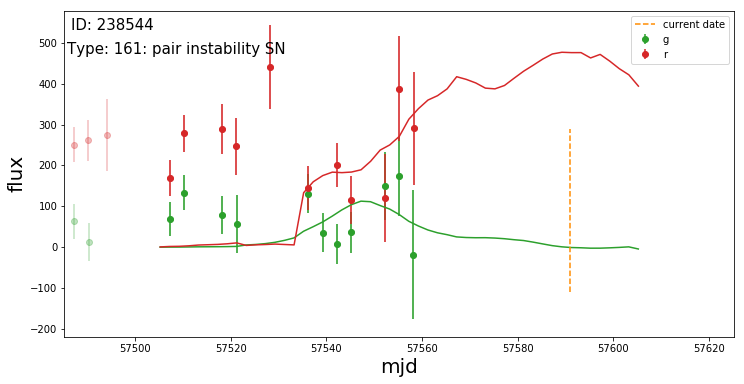

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57453.3981   g 325                 0 ...   39.37   28.5  19.276709 282963
 57453.419   r 325                 0 ...   45.91  28.49   19.01038 282963
57456.3758   g 325              4096 ...   40.37  28.53  19.286974 282963
57456.4182   r 325                 0 ...   48.57  28.57  19.019564 282963
57477.3899   r 325                 0 ...   68.77  28.49   19.04448 282963
57477.3983   g 325                 0 ...    61.6  28.62  19.315042 282963
57481.3151   g 325                 0 ...   39.84  28.48   19.34779 282963
 57481.356   r 325                 0 ...   47.01  28.55   19.07313 282963
57491.3133   r 325              6144 ...    50.3   28.5  19.095089 282963
 57495.272   g 325                 0 ...   93.64  28.92  19.361639 282963
57495.3131   r 325                 0 ...   77.78  28.55  19.085108 282963
57511.3124   g 325                 0 .

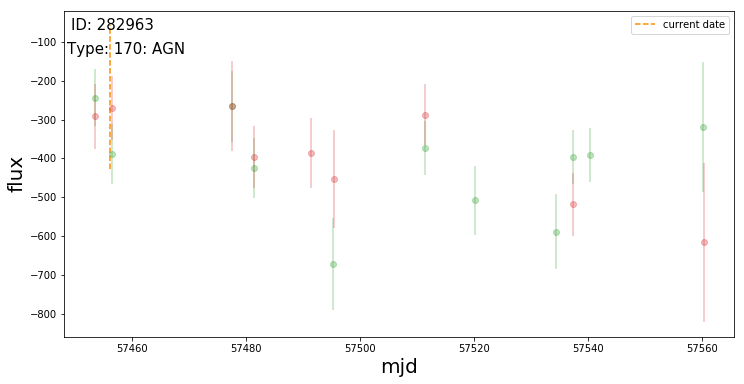

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57439.5043   g 850                 0 ...  136.86  29.09       99.0 299161
57444.5378   r 850                 0 ...   75.33  28.48       99.0 299161
57444.5529   g 850                 0 ...  120.72  28.98       99.0 299161
57453.5383   g 850                 0 ...   37.66   28.4       99.0 299161
57453.5482   r 850                 0 ...   83.46   28.5       99.0 299161
 57462.454   g 850                 0 ...   35.91   28.4  23.461042 299161
57462.4875   r 850                 0 ...   44.17   28.5  23.649403 299161
57470.4442   r 850                 0 ...  108.66  28.56   21.34068 299161
57470.4927   g 850                 0 ...  163.92  29.11  21.206215 299161
57473.4474   g 850                 0 ...   141.9  29.06  20.920145 299161
       ... ...          ...      ... ...     ...    ...        ...    ...
57686.0945   r 850                 0 .

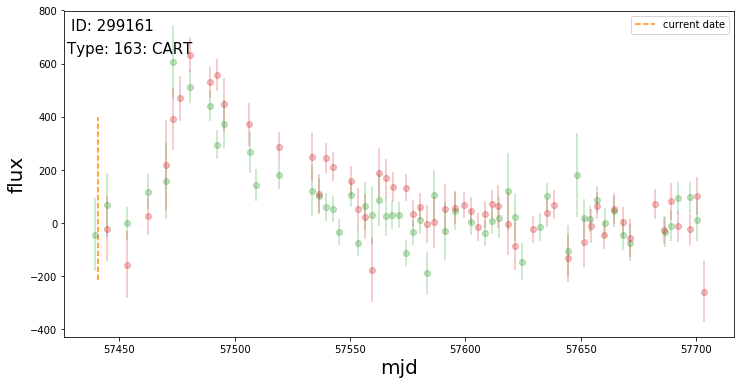

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57433.4005   r 716                 0 ...   39.31  28.57       99.0 318881
57433.4274   g 716                 0 ...   22.57  28.07       99.0 318881
57436.3829   g 716                 0 ...    58.5  28.55       99.0 318881
57436.4504   r 716                 0 ...   46.89  28.51       99.0 318881
57439.3594   r 716                 0 ...  106.98  28.59       99.0 318881
57439.4026   g 716                 0 ...  197.85  29.11       99.0 318881
57444.3466   g 716                 0 ...   97.69  28.82       99.0 318881
57444.3895   r 716                 0 ...   83.31  28.51       99.0 318881
57451.3406   r 716                 0 ...   39.95  28.58       99.0 318881
57451.3844   g 716                 0 ...    22.4  28.06       99.0 318881
       ... ...          ...      ... ...     ...    ...        ...    ...
57585.2025   r 716                 0 .

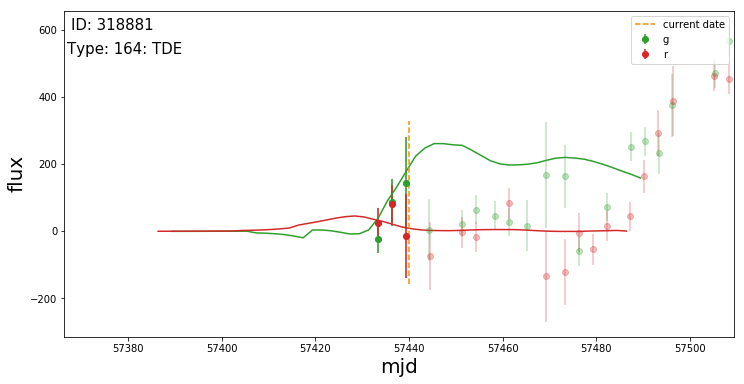

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
 57540.482   r 445                 0 ...  111.23  28.52       99.0 325142
57555.4421   g 445                 0 ...   34.81  28.38    24.0059 325142
57558.4633   g 445                 0 ...  104.66  28.92  22.857006 325142
57563.4609   r 445                 0 ...  118.42  28.55   22.11004 325142
57573.4578   g 445              4096 ...   28.75  28.21  21.263355 325142
57576.4579   g 445                 0 ...   29.17  28.21   21.25996 325142
57579.4398   r 445                 0 ...   40.42   28.5  21.138685 325142
57583.4379   r 445              6144 ...   43.73  28.63   21.13058 325142
57583.4599   g 445                 0 ...    29.3  28.27  21.617628 325142
 57596.399   g 445                 0 ...   51.71  28.56  22.996897 325142
       ... ...          ...      ... ...     ...    ...        ...    ...
57671.2538   r 445                 0 .

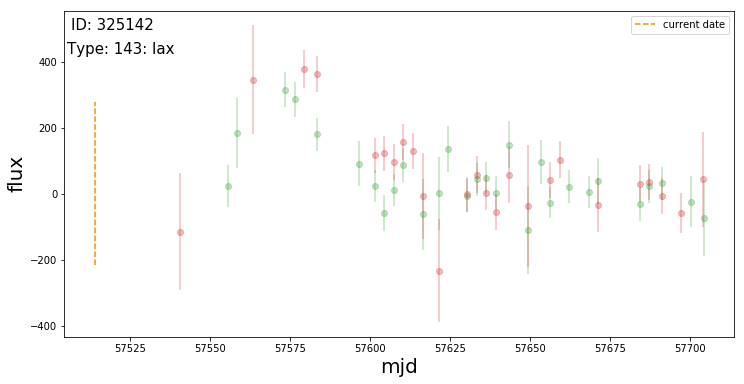

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57433.3784   r 523                 0 ...    41.6   28.6  16.622923 384765
57433.4181   g 523                 0 ...    25.0  28.16  17.113054 384765
57436.3772   g 523                 0 ...   60.62  28.58  17.113037 384765
57439.3563   r 523                 0 ...  133.98  28.58  16.622889 384765
57444.3487   g 523                 0 ...  113.99  28.89   17.11299 384765
57444.3938   r 523                 0 ...   103.7  28.58   16.62286 384765
57451.2965   g 523                 0 ...   27.41  28.25   17.11295 384765
57454.3149   r 523                 0 ...   43.67  28.61  16.622803 384765
57454.3351   g 523                 0 ...   27.37   28.2  17.112932 384765
57459.2953   g 523                 0 ...   25.54  28.19  17.112904 384765
       ... ...          ...      ... ...     ...    ...        ...    ...
57545.1706   r 523                 0 .

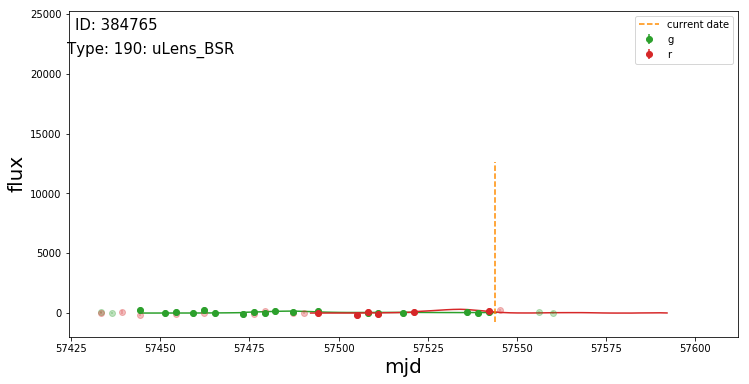

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.5282   r 760                 0 ...   37.65  28.57  22.187014 396108
57434.5616   g 760                 0 ...    24.1  28.11   21.83744 396108
57437.4942   g 760              4096 ...   40.73  28.39  20.775064 396108
57437.5167   r 760              6144 ...   41.73  28.57  20.756126 396108
57443.4306   g 760              4096 ...  114.67  28.89  20.412733 396108
57443.5166   r 760              4096 ...   76.51  28.53  20.100006 396108
57451.4749   g 760                 0 ...   26.03  28.16   22.87849 396108
57451.4939   r 760              4096 ...   39.73  28.56  20.738394 396108
57454.4523   g 760                 0 ...   24.68  28.16  48.449173 396108
57454.4747   r 760                 0 ...   36.52  28.57  48.870552 396108
       ... ...          ...      ... ...     ...    ...        ...    ...
57613.1971   g 760                 0 .

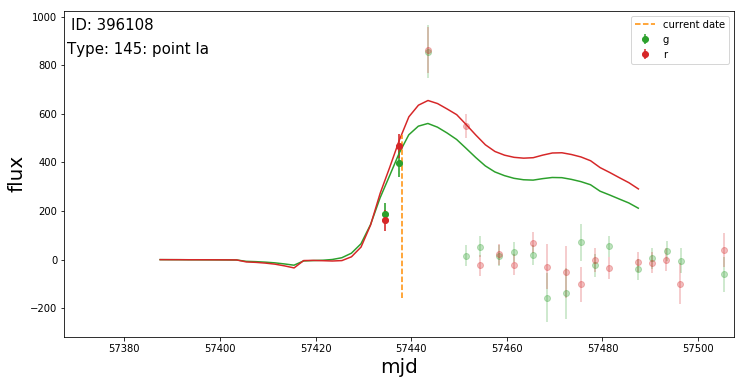

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57433.2559   g 518                 0 ...    42.4  28.43       99.0 444953
57433.3148   r 518                 0 ...   47.78  28.59       99.0 444953
 57436.254   r 518                 0 ...   80.71   28.6       99.0 444953
57436.3072   g 518                 0 ...   87.69  28.75       99.0 444953
57443.2473   g 518                 0 ...  107.85  28.86       99.0 444953
57443.3153   r 518                 0 ...  103.56   28.6       99.0 444953
57451.2316   r 518                 0 ...   41.11   28.6       99.0 444953
57451.2522   g 518                 0 ...   25.22  28.16       99.0 444953
57454.2333   r 518                 0 ...   42.75  28.59       99.0 444953
57454.2692   g 518                 0 ...   26.61   28.2       99.0 444953
       ... ...          ...      ... ...     ...    ...        ...    ...
57686.5089   r 518              4096 .

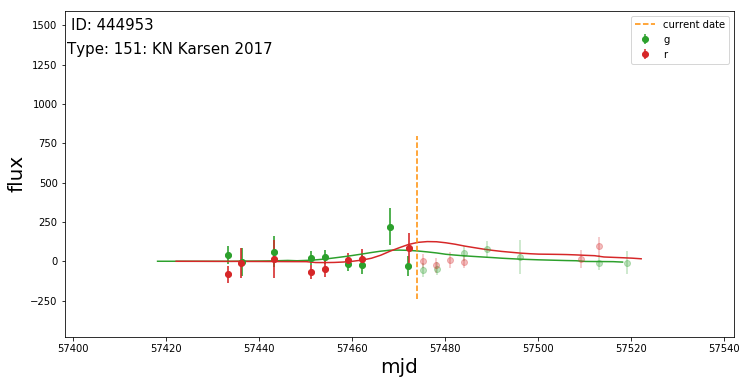

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57505.4987   r 690              4096 ...   67.22  28.53   19.31565 450666
57519.4525   r 690                 0 ...   40.85  28.46   19.31918 450666
 57519.466   g 690              6144 ...   27.47  28.21   20.48833 450666
57532.4578   r 690                 0 ...   76.02  28.52  19.308388 450666
 57535.442   g 690                 0 ...   73.11  28.68  20.486782 450666
57535.4629   r 690                 0 ...   68.29  28.65   19.31865 450666
57539.4445   r 690              4096 ...   44.95  28.52  19.317747 450666
57539.4695   g 690                 0 ...   39.49  28.38  20.486786 450666
57542.4467   g 690              4096 ...   27.81  28.25  20.477797 450666
57542.4658   r 690              4096 ...   41.11   28.6  19.314953 450666
       ... ...          ...      ... ...     ...    ...        ...    ...
57683.1869   g 690                 0 .

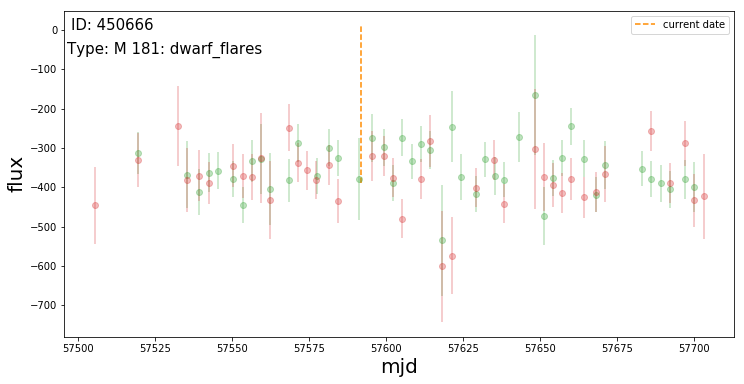

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.1089   r 502                 0 ...   78.32  28.48  98.198135 451759
57434.1441   g 502                 0 ...   83.32  28.84  98.198135 451759
57438.1326   g 502                 0 ...  151.32  29.07  98.198135 451759
57558.4686   g 502                 0 ...  119.79  29.02  98.198135 451759
57562.4563   g 502                 0 ...  130.79  28.97  98.198135 451759
57562.4761   r 502                 0 ...   92.23   28.4  98.198135 451759
57571.4645   g 502                 0 ...    41.5  28.45  98.198135 451759
57571.4842   r 502                 0 ...  118.53   28.6  98.198135 451759
57574.4413   g 502                 0 ...   37.53  28.44  98.198135 451759
57574.4662   r 502                 0 ...   45.46  28.56  98.198135 451759
       ... ...          ...      ... ...     ...    ...        ...    ...
57687.2571   g 502                 0 .

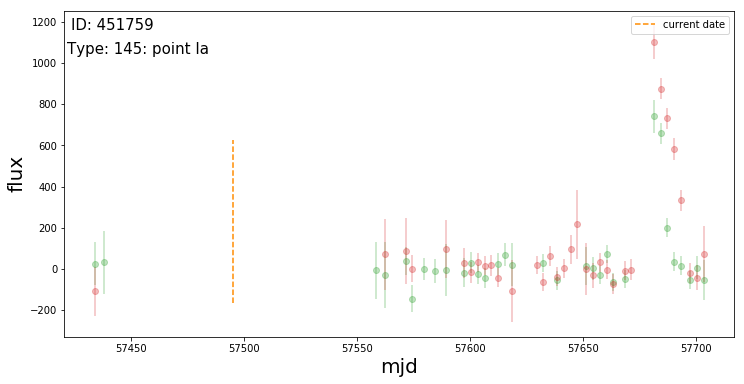

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57435.4169   g 848                 0 ...   51.83  28.62   98.74899 466878
57444.4137   g 848                 0 ...  110.43  28.93   98.74899 466878
57444.5088   r 848                 0 ...   71.28  28.55   98.74899 466878
57453.4036   g 848                 0 ...   35.13  28.39   98.74899 466878
57453.4926   r 848                 0 ...   40.81  28.55   98.74899 466878
57456.3721   g 848                 0 ...   37.25  28.37   98.74899 466878
57456.4277   r 848                 0 ...   45.02  28.56   98.74899 466878
57460.3709   g 848                 0 ...    34.6  28.36   98.74899 466878
 57460.538   r 848                 0 ...    42.0  28.61   98.74899 466878
57467.3203   g 848                 0 ...  120.51  29.01   98.74899 466878
       ... ...          ...      ... ...     ...    ...        ...    ...
57684.0941   r 848                 0 .

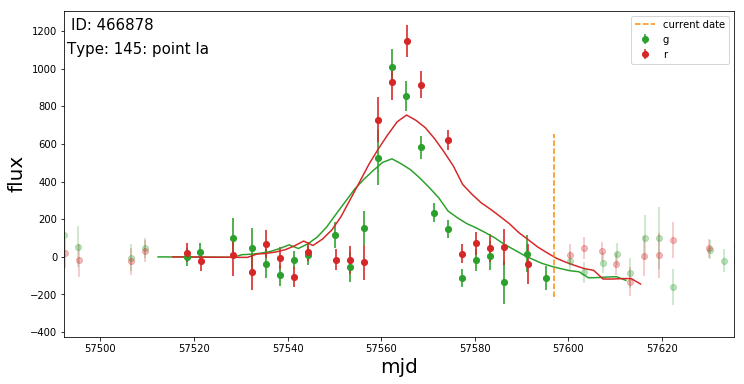

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.5239   r 677                 0 ...   36.52  28.52  20.517332 497502
57437.4818   g 677                 0 ...    40.3  28.36  21.614573 497502
57437.5201   r 677                 0 ...   40.32  28.51  20.516222 497502
57443.4406   g 677                 0 ...   125.1  28.96  21.611498 497502
57443.4779   r 677                 0 ...   85.25  28.52  20.513998 497502
57451.4643   g 677                 0 ...   25.37  28.12  21.607525 497502
57451.4834   r 677                 0 ...   38.72  28.52   20.50984 497502
57454.4162   g 677                 0 ...   25.79  28.19  21.606249 497502
57454.4213   r 677                 0 ...   38.24  28.61  20.507935 497502
57458.4153   g 677                 0 ...   25.44  28.16  21.603754 497502
       ... ...          ...      ... ...     ...    ...        ...    ...
57585.2063   r 677              4096 .

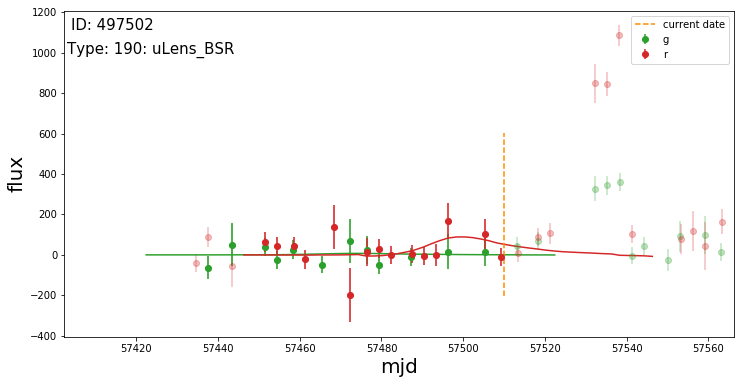

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57534.4563   g 497                 0 ...  104.19  28.84  98.947205 552406
57534.4611   r 497                 0 ...   92.16  28.58  98.947205 552406
57545.4553   g 497                 0 ...   35.68  28.35  98.947205 552406
57552.4558   g 497                 0 ...   35.11  28.31  98.947205 552406
57555.4431   g 497                 0 ...   34.21  28.38  98.947205 552406
57558.4638   g 497                 0 ...   94.49  28.82  98.947205 552406
57563.4584   g 497                 0 ...  105.93  28.85  98.947205 552406
57563.4783   r 497                 0 ...  106.88  28.56  98.947205 552406
57572.4415   g 497                 0 ...   30.28  28.31  98.947205 552406
57572.4629   r 497                 0 ...   41.43  28.56  98.947205 552406
       ... ...          ...      ... ...     ...    ...        ...    ...
57671.2898   g 497                 0 .

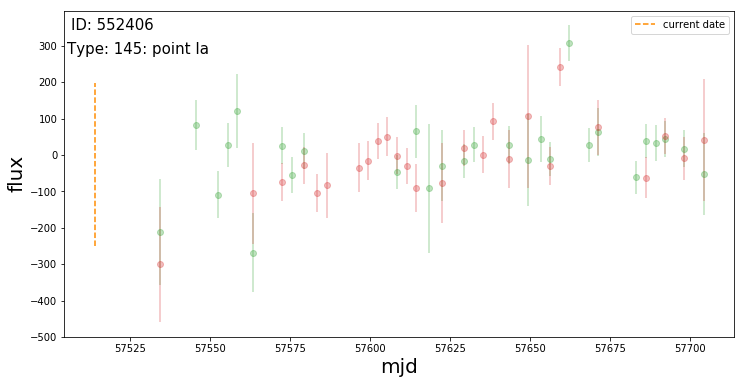

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57433.3954   r 672                 0 ...   39.39  28.55       99.0 632290
 57436.399   r 672                 0 ...   58.24  28.52       99.0 632290
57439.3589   r 672                 0 ...  109.61  28.56       99.0 632290
57439.4006   g 672                 0 ...  196.21  29.09       99.0 632290
57444.3471   g 672                 0 ...  103.47  28.82       99.0 632290
57444.3793   r 672                 0 ...   86.57   28.5       99.0 632290
57451.3373   r 672                 0 ...   39.51  28.57       99.0 632290
 57451.379   g 672                 0 ...   22.37  28.05       99.0 632290
57454.3385   g 672                 0 ...   25.11  28.13       99.0 632290
57454.3588   r 672                 0 ...   38.23  28.52       99.0 632290
       ... ...          ...      ... ...     ...    ...        ...    ...
57581.1867   r 672                 0 .

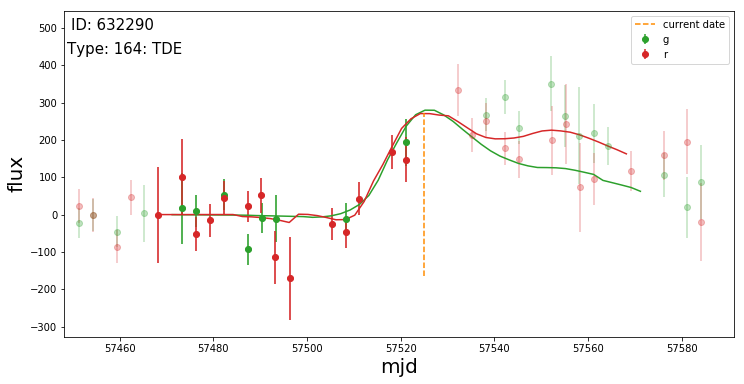

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57433.2705   g 462              4096 ...   45.06  28.42  17.155523 642347
57439.2953   r 462                 0 ...  152.35  28.48  16.510418 642347
 57444.229   r 462              6144 ...   56.76  28.51  16.649094 642347
57444.2497   g 462              4096 ...   61.76  28.59  16.891245 642347
57451.1678   r 462              4096 ...   40.52   28.5  16.922338 642347
57451.1916   g 462              4096 ...   26.36  28.15  17.152693 642347
57454.2293   r 462              4096 ...   46.34  28.56  16.502228 642347
57454.2516   g 462                 0 ...   30.19  28.23  16.618143 642347
57459.1876   g 462              4096 ...   30.17  28.22  16.831137 642347
57459.2074   r 462              4096 ...   41.62  28.55  16.740417 642347
       ... ...          ...      ... ...     ...    ...        ...    ...
57671.5033   g 462              4096 .

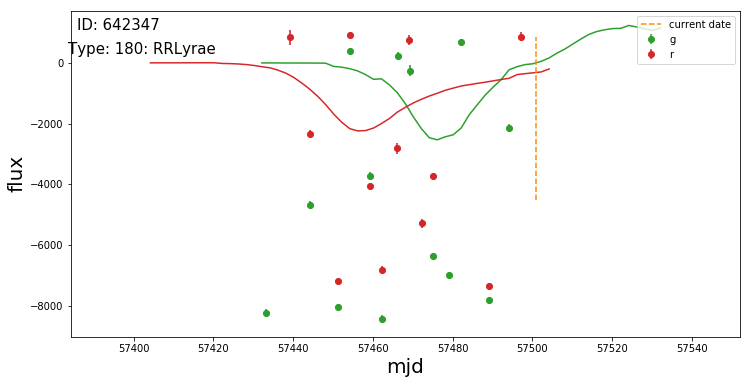

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.1131   r 737                 0 ...   74.79  28.58       99.0 654047
 57434.138   g 737                 0 ...   69.67  28.68       99.0 654047
57438.1397   g 737                 0 ...  148.04   29.1       99.0 654047
57533.4756   r 737                 0 ...   85.77  28.42       99.0 654047
 57537.447   r 737                 0 ...    63.4  28.48       99.0 654047
57537.4735   g 737                 0 ...   63.02  28.64       99.0 654047
57540.4701   g 737                 0 ...   44.79  28.51       99.0 654047
 57555.395   g 737                 0 ...   68.26  28.64       99.0 654047
 57558.472   g 737                 0 ...   93.64  28.79       99.0 654047
57561.4265   g 737                 0 ...  164.05  29.14       99.0 654047
       ... ...          ...      ... ...     ...    ...        ...    ...
57687.2256   g 737                 0 .

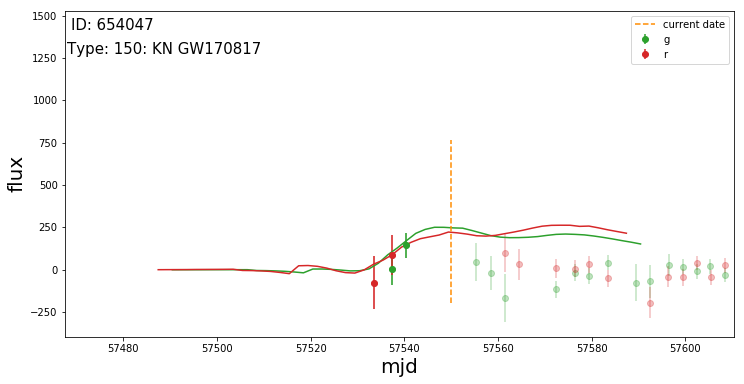

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57453.5398   g 766                 0 ...   34.05   28.3   98.50626 660304
57453.5467   r 766                 0 ...   80.46  28.61   98.50626 660304
57462.5158   g 766                 0 ...    28.5  28.22   98.50626 660304
57462.5352   r 766                 0 ...   43.36  28.58   98.50626 660304
57469.5108   g 766                 0 ...  103.12  28.87   98.50626 660304
 57473.517   r 766                 0 ...   73.15  28.52   98.50626 660304
57473.5315   g 766                 0 ...  132.71  28.92   98.50626 660304
57476.5001   g 766                 0 ...   64.71  28.62   98.50626 660304
57476.5073   r 766                 0 ...   58.05  28.54   98.50626 660304
57480.4972   g 766                 0 ...   35.08  28.31   98.50626 660304
       ... ...          ...      ... ...     ...    ...        ...    ...
57686.1127   g 766                 0 .

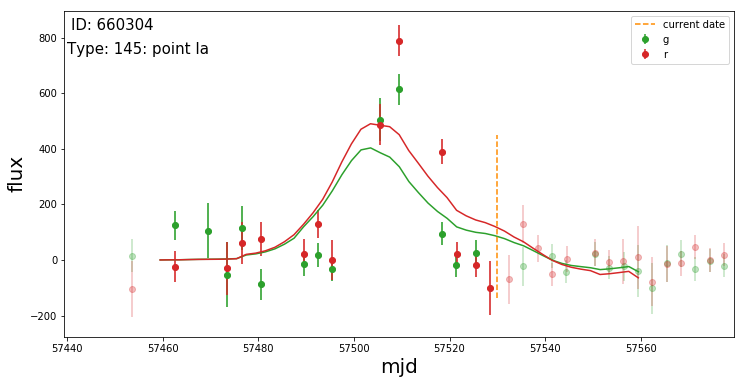

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.5592   g 847                 0 ...    30.5   28.3       99.0 713249
57437.4552   g 847                 0 ...   79.33  28.72       99.0 713249
57443.5323   r 847                 0 ...   76.04   28.6       99.0 713249
57452.5128   r 847                 0 ...   42.97  28.61       99.0 713249
57452.5356   g 847                 0 ...   32.54  28.31       99.0 713249
57455.3266   g 847                 0 ...    38.3  28.44       99.0 713249
57455.4855   r 847                 0 ...   41.76  28.63       99.0 713249
57460.3693   g 847                 0 ...   32.62  28.34       99.0 713249
57460.4095   r 847                 0 ...   42.66  28.58       99.0 713249
57463.4957   g 847                 0 ...   27.99  28.25       99.0 713249
       ... ...          ...      ... ...     ...    ...        ...    ...
57664.1773   g 847                 0 .

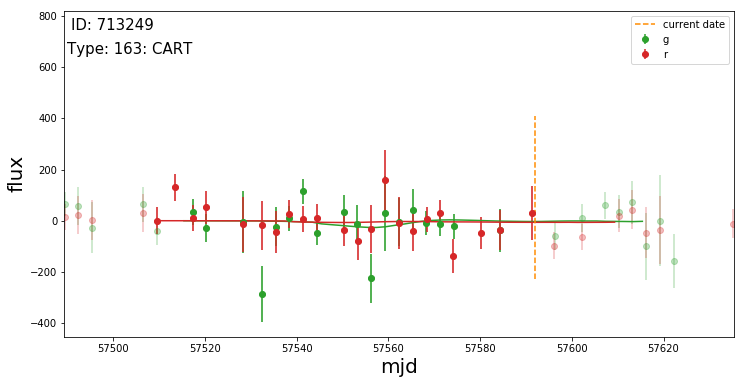

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57443.5409   r 683                 0 ...   75.05  28.55  20.923748 738523
57443.5489   g 683              4096 ...  124.36  28.92   20.51856 738523
57451.5309   g 683              6144 ...   36.89  28.32  20.286217 738523
57451.5482   r 683              4096 ...   63.19  28.62  20.672792 738523
57455.5068   g 683              4096 ...   28.95  28.25   20.24012 738523
 57455.541   r 683              4096 ...    37.1  28.46  20.619934 738523
57458.5367   g 683              4096 ...   26.36   28.2   20.23769 738523
57461.5052   g 683              4096 ...   24.34  28.13  20.258116 738523
57461.5385   r 683              4096 ...   39.06  28.59  20.631025 738523
57467.4667   g 683                 0 ...   74.16  28.72  20.357157 738523
       ... ...          ...      ... ...     ...    ...        ...    ...
57684.0892   r 683                 0 .

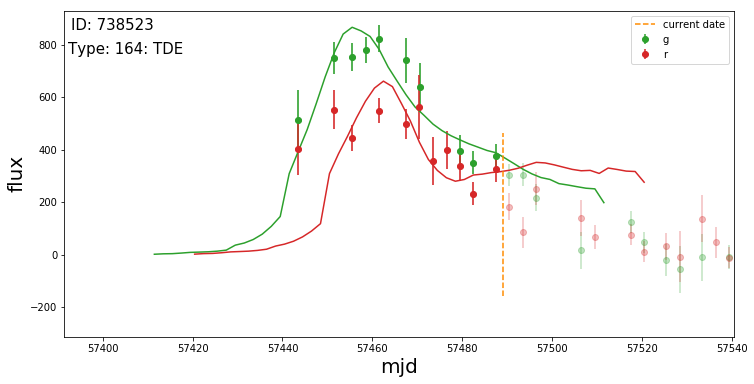

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57433.4072   r 790                 0 ...   40.87  28.62  22.233517 748568
57433.4327   g 790                 0 ...    24.0  28.14  22.640734 748568
57436.3926   g 790                 0 ...   61.12   28.6  22.568058 748568
57436.4048   r 790                 0 ...   61.99   28.6  22.151892 748568
57439.2847   g 790                 0 ...  153.57  29.08  22.503693 748568
57439.4308   r 790                 0 ...  100.73  28.57  22.076387 748568
57443.3586   r 790                 0 ...   93.55  28.63  21.987947 748568
57451.3521   r 790                 0 ...   41.13  28.62  21.837086 748568
57451.3897   g 790                 0 ...   23.76  28.14  22.297342 748568
57454.3476   g 790                 0 ...   26.94  28.21  22.260416 748568
       ... ...          ...      ... ...     ...    ...        ...    ...
57682.5325   g 790                 0 .

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


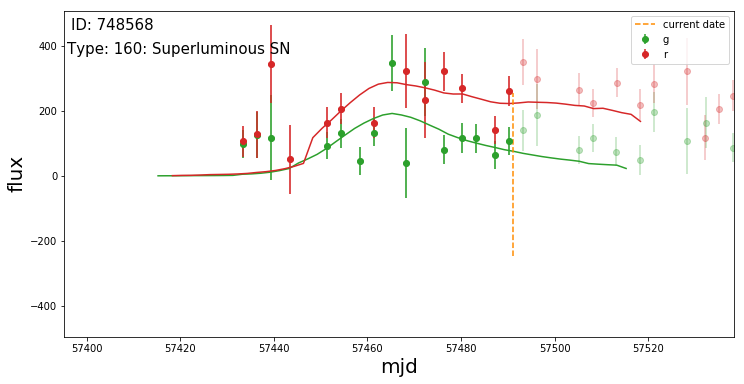

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.1108   r 602              4096 ...   72.76  28.47  14.373255 750547
57434.1427   g 602              6144 ...   75.61  28.81  14.989647 750547
 57438.134   g 602              4096 ...  149.48   29.1  14.986454 750547
57558.4232   g 602              4096 ...  158.67  29.19  14.937246 750547
57561.4246   g 602              4096 ...  171.45   29.2   14.93851 750547
57561.4428   r 602              4096 ...   90.69  28.56    14.3231 750547
57564.4577   r 602              4096 ...    69.9  28.39  14.324369 750547
57572.4574   g 602              4096 ...    32.1  28.28  14.943188 750547
57572.4785   r 602              4096 ...   44.12  28.56  14.326779 750547
57575.4426   g 602              4096 ...    29.7  28.28  14.944527 750547
       ... ...          ...      ... ...     ...    ...        ...    ...
57687.2291   g 602                 0 .

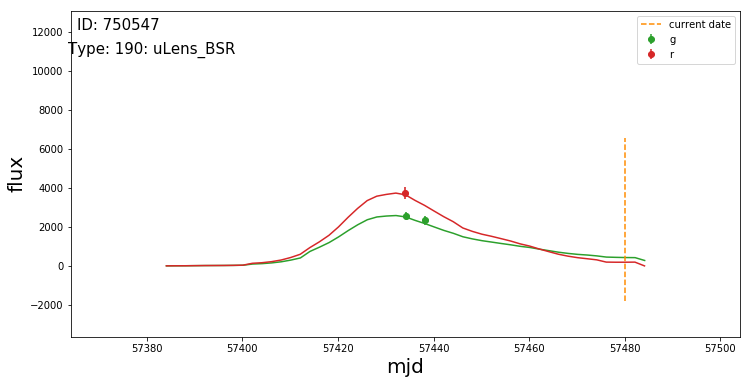

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57507.4648   g 691              4096 ...   58.15  28.66  20.777464 756537
57507.4888   r 691              6144 ...   64.03  28.57  20.512115 756537
57520.4726   g 691              4096 ...    29.2  28.22    20.7411 756537
57532.4636   r 691                 0 ...   78.95  28.59  20.641375 756537
57535.4634   r 691                 0 ...    65.2  28.56  20.675325 756537
 57538.443   r 691              4096 ...   53.94  28.62  20.641405 756537
57538.4655   g 691                 0 ...   51.75  28.49  20.922085 756537
57541.4567   r 691                 0 ...   40.21  28.53  20.667732 756537
57541.4634   g 691                 0 ...   33.31  28.26  20.951992 756537
57544.4426   g 691                 0 ...   27.51  28.21   20.95014 756537
       ... ...          ...      ... ...     ...    ...        ...    ...
57686.1955   r 691              4096 .

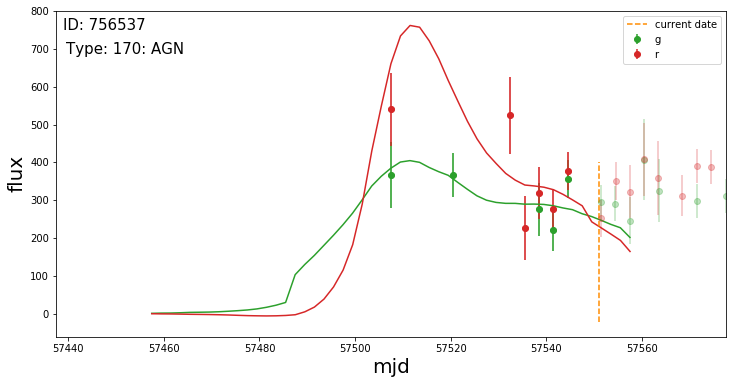

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57433.4642   r 629                 0 ...   38.39   28.6       99.0 775075
57433.4826   g 629                 0 ...   23.73  28.11       99.0 775075
 57436.478   r 629                 0 ...   40.17  28.55       99.0 775075
 57436.483   g 629                 0 ...   24.36  28.11       99.0 775075
57439.4404   r 629                 0 ...    86.8  28.59       99.0 775075
57443.4184   g 629                 0 ...  133.33   29.0       99.0 775075
57451.3986   g 629                 0 ...   25.44   28.2       99.0 775075
57451.4352   r 629                 0 ...   36.99  28.55       99.0 775075
57454.4167   g 629                 0 ...   24.79  28.14       99.0 775075
57454.4199   r 629                 0 ...   37.25  28.57       99.0 775075
       ... ...          ...      ... ...     ...    ...        ...    ...
57563.2125   g 629                 0 .

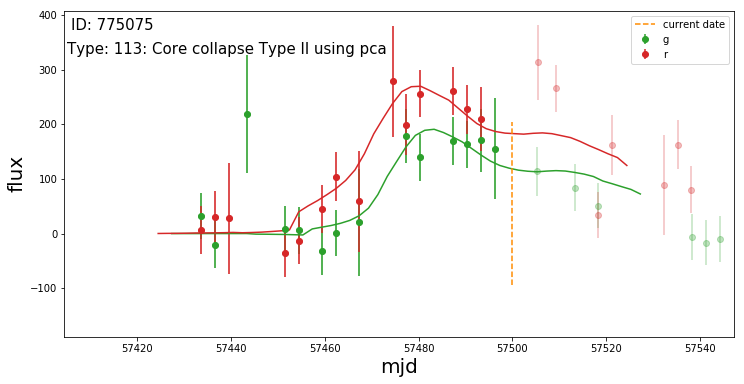

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57433.5229   r 582                 0 ...   38.33  28.58  99.133675 788028
 57433.545   g 582                 0 ...   24.83  28.13  99.133675 788028
57436.5026   g 582                 0 ...   25.64  28.18  99.133675 788028
 57436.523   r 582                 0 ...   37.77  28.57  99.133675 788028
57443.4387   g 582                 0 ...  131.59  28.97  99.133675 788028
57443.4609   r 582                 0 ...   95.97  28.63  99.133675 788028
57451.4618   g 582                 0 ...    27.7  28.21  99.133675 788028
57451.5017   r 582                 0 ...    41.9  28.55  99.133675 788028
57454.4412   g 582                 0 ...   26.54  28.21  99.133675 788028
57454.4807   r 582                 0 ...   36.43  28.56  99.133675 788028
       ... ...          ...      ... ...     ...    ...        ...    ...
57563.2548   r 582                 0 .

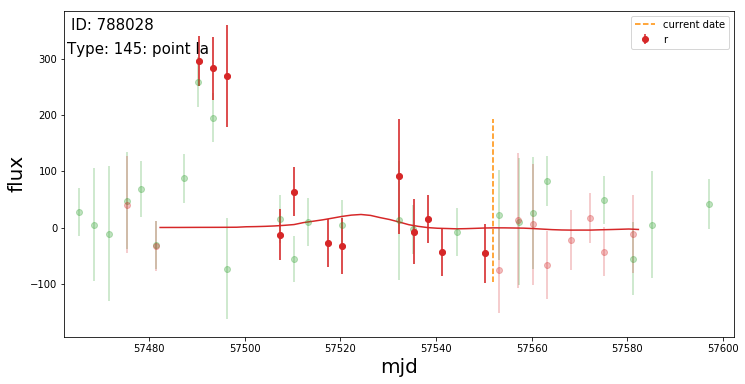

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
  57456.39   g 865                 0 ...   37.38  28.39  98.561844 800462
57456.4272   r 865                 0 ...   46.93  28.55  98.561844 800462
  57467.37   r 865                 0 ...    90.9   28.5  98.561844 800462
57467.4311   g 865                 0 ...   98.42  28.84  98.561844 800462
57473.3905   g 865                 0 ...  138.48  29.05  98.561844 800462
57473.5141   r 865                 0 ...   79.11  28.58  98.561844 800462
57477.4266   g 865                 0 ...   57.64  28.62  98.561844 800462
57477.4667   r 865                 0 ...   58.09  28.49  98.561844 800462
57481.3716   r 865                 0 ...   44.92  28.53  98.561844 800462
57481.5166   g 865                 0 ...   36.85  28.39  98.561844 800462
       ... ...          ...      ... ...     ...    ...        ...    ...
57684.1388   g 865                 0 .

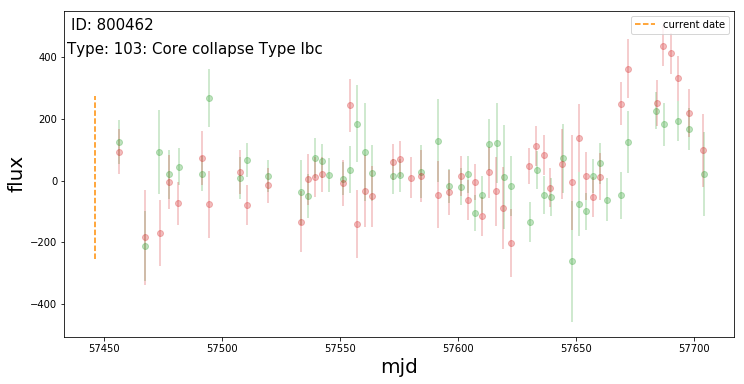

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.5494   g 634              4096 ...    26.4  28.22  20.063831 803435
57437.5252   g 634              6144 ...    28.2   28.2  20.009096 803435
57443.5236   r 634              4096 ...   76.83  28.62  19.941307 803435
57443.5446   g 634                 0 ...  114.23  28.87  19.920427 803435
57451.5247   g 634              4096 ...    36.6  28.32   19.95961 803435
57451.5448   r 634              4096 ...   56.58  28.53  19.976603 803435
57454.5041   r 634              4096 ...   38.51  28.61  20.007717 803435
57458.4837   r 634              4096 ...   38.46  28.64  20.002502 803435
57461.4999   r 634              4096 ...   36.61  28.58  19.996897 803435
57461.5203   g 634              4096 ...   22.82  28.08  19.983124 803435
       ... ...          ...      ... ...     ...    ...        ...    ...
57644.1272   r 634              4096 .

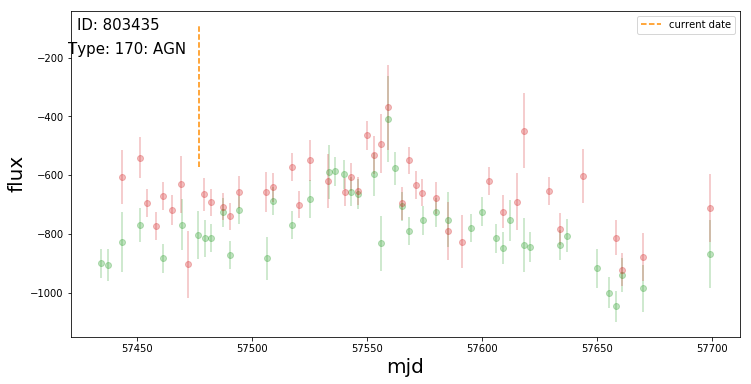

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.5277   r 761                 0 ...   39.23  28.61  99.242226 850796
57434.5574   g 761                 0 ...    24.8  28.13  99.242226 850796
57437.5314   g 761                 0 ...   28.04  28.21  99.242226 850796
57437.5565   r 761                 0 ...   41.69  28.56  99.242226 850796
57443.4563   g 761                 0 ...  114.43  28.89  99.242226 850796
57443.5108   r 761                 0 ...   75.95  28.58  99.242226 850796
57451.5089   r 761                 0 ...   40.55  28.57  99.242226 850796
57451.5404   g 761                 0 ...   31.33  28.23  99.242226 850796
57454.4929   r 761                 0 ...   36.67  28.58  99.242226 850796
57454.5283   g 761                 0 ...   24.09  28.11  99.242226 850796
       ... ...          ...      ... ...     ...    ...        ...    ...
57658.1238   r 761                 0 .

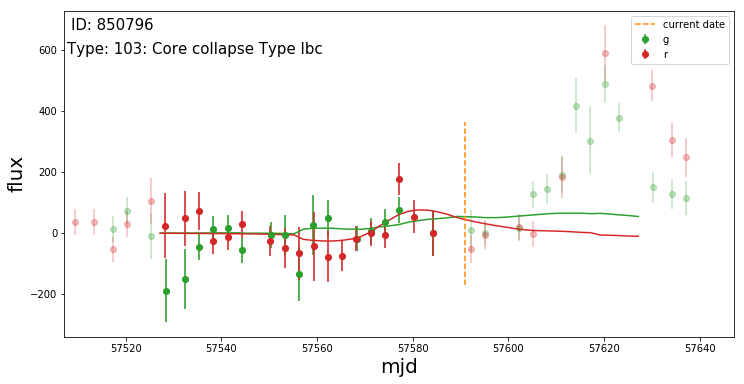

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.1597   g 700                 0 ...   70.38  28.67  98.879776 864799
57434.1705   r 700                 0 ...   80.37  28.48  98.879776 864799
57438.2193   g 700                 0 ...  129.67  28.95  98.879776 864799
57443.1352   g 700                 0 ...   32.68  28.31  98.879776 864799
57452.1325   g 700                 0 ...   26.77  28.18  98.879776 864799
57455.1315   g 700                 0 ...   28.81  28.23  98.879776 864799
57455.1628   r 700                 0 ...   41.29  28.56  98.879776 864799
57460.1421   g 700                 0 ...   51.43  28.51  98.879776 864799
57463.1437   g 700                 0 ...   66.68  28.67  98.879776 864799
57463.1646   r 700                 0 ...   67.08  28.55  98.879776 864799
       ... ...          ...      ... ...     ...    ...        ...    ...
57687.4112   g 700                 0 .

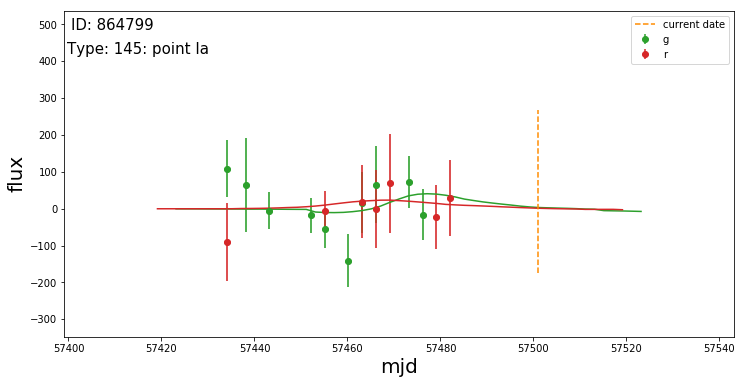

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57539.4816   r 393                 0 ...  143.85  28.53   99.10276 891668
 57557.418   g 393                 0 ...  116.66  29.03   99.10276 891668
57563.4604   r 393                 0 ...  122.88  28.52   99.10276 891668
57573.4583   g 393                 0 ...    31.5  28.26   99.10276 891668
57576.4583   g 393                 0 ...   31.89  28.26   99.10276 891668
 57576.479   r 393                 0 ...   44.42  28.56   99.10276 891668
57581.4613   r 393                 0 ...   44.59  28.57   99.10276 891668
57585.3745   r 393                 0 ...   72.02  28.41   99.10276 891668
57585.3794   g 393                 0 ...   71.95  28.72   99.10276 891668
57596.3986   g 393                 0 ...    51.3  28.56   99.10276 891668
       ... ...          ...      ... ...     ...    ...        ...    ...
57648.3425   r 393                 0 .

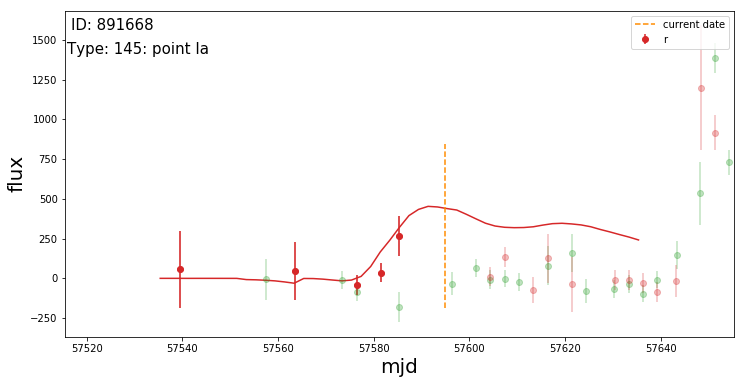

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57435.5488   g 681                 0 ...   27.45  28.23       99.0 894316
57439.5474   g 681                 0 ...   58.29  28.57       99.0 894316
  57443.54   r 681                 0 ...    74.9  28.58       99.0 894316
 57443.548   g 681                 0 ...  113.38  28.87       99.0 894316
 57451.529   g 681                 0 ...   34.43  28.29       99.0 894316
57451.5473   r 681                 0 ...   57.28  28.53       99.0 894316
57454.5206   r 681                 0 ...   37.86  28.57       99.0 894316
57454.5366   g 681                 0 ...   25.16  28.12       99.0 894316
57458.4856   r 681                 0 ...   38.47  28.64       99.0 894316
57458.5187   g 681                 0 ...   24.04  28.11       99.0 894316
       ... ...          ...      ... ...     ...    ...        ...    ...
57664.1074   r 681                 0 .

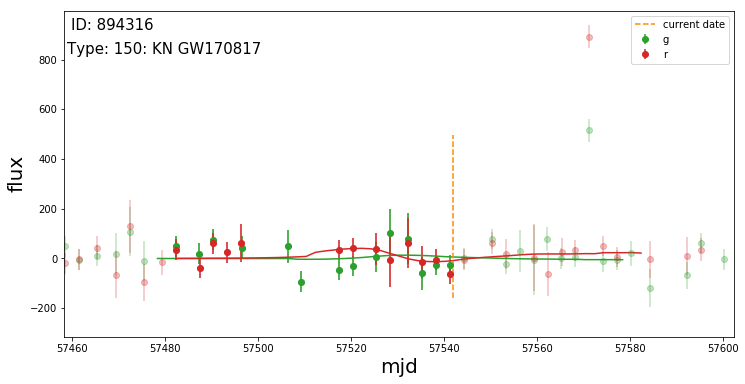

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57433.3229   r 786                 0 ...   45.92  28.59       99.0 908338
57433.3649   g 786                 0 ...    27.0   28.2       99.0 908338
57436.2613   r 786                 0 ...   73.35  28.62       99.0 908338
57436.3266   g 786                 0 ...   74.02  28.67       99.0 908338
 57439.258   g 786                 0 ...  167.27   29.1       99.0 908338
57439.3061   r 786                 0 ...  113.94  28.57       99.0 908338
57443.2409   g 786                 0 ...   94.54  28.83       99.0 908338
57443.3372   r 786                 0 ...   89.17  28.58       99.0 908338
57451.2598   g 786                 0 ...   24.59  28.16       99.0 908338
57451.2892   r 786                 0 ...   39.41  28.59       99.0 908338
       ... ...          ...      ... ...     ...    ...        ...    ...
57687.5335   r 786                 0 .

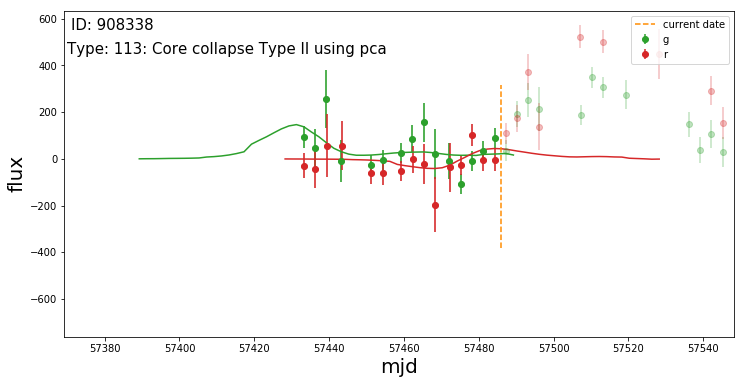

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.5214   r 583              4096 ...   39.61  28.62  17.379574 916558
 57434.544   g 583              6144 ...   26.43  28.17   17.78233 916558
57437.5434   r 583              4096 ...   42.49  28.56  17.117882 916558
57443.5011   r 583              4096 ...   84.06  28.58   17.56264 916558
57452.4815   r 583              4096 ...    38.7   28.6  17.403168 916558
57455.5024   g 583              4096 ...    24.1  28.11   17.96674 916558
57459.4606   g 583                 0 ...   24.68  28.16  17.578632 916558
 57459.481   r 583              4096 ...   36.74  28.57  17.054537 916558
57462.4388   g 583              4096 ...   24.65  28.18   17.96674 916558
57465.4812   r 583              4096 ...   37.47  28.55  17.478352 916558
       ... ...          ...      ... ...     ...    ...        ...    ...
57581.2349   r 583              4096 .

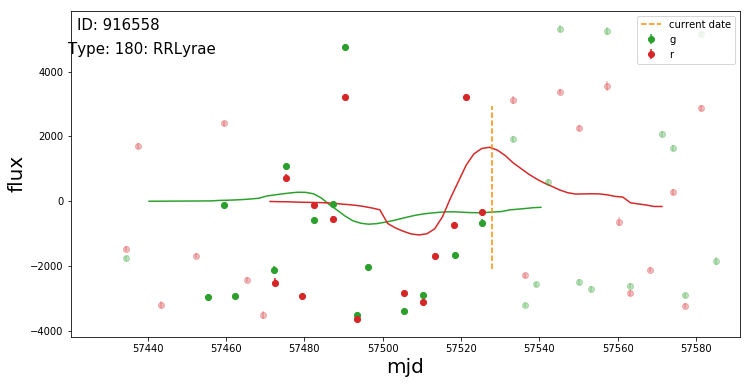

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.1089   r 502                 0 ...   78.32  28.48       99.0 950703
57434.1441   g 502                 0 ...   83.32  28.84       99.0 950703
57438.1326   g 502                 0 ...  151.32  29.07       99.0 950703
57558.4686   g 502                 0 ...  119.79  29.02       99.0 950703
57562.4563   g 502                 0 ...  130.79  28.97       99.0 950703
57562.4761   r 502                 0 ...   92.23   28.4       99.0 950703
57571.4645   g 502                 0 ...    41.5  28.45       99.0 950703
57571.4842   r 502                 0 ...  118.53   28.6       99.0 950703
57574.4413   g 502                 0 ...   37.53  28.44       99.0 950703
57574.4662   r 502                 0 ...   45.46  28.56       99.0 950703
       ... ...          ...      ... ...     ...    ...        ...    ...
57687.2571   g 502                 0 .

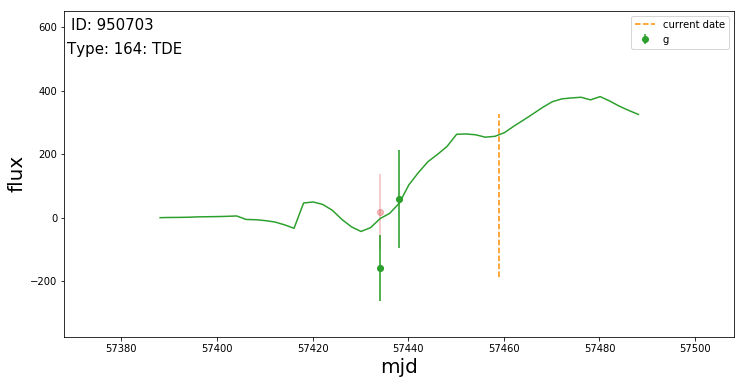

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.5282   r 760                 0 ...   37.65  28.57       99.0 959342
57434.5616   g 760                 0 ...    24.1  28.11       99.0 959342
57437.4942   g 760                 0 ...   40.73  28.39       99.0 959342
57437.5167   r 760                 0 ...   41.73  28.57       99.0 959342
57443.4306   g 760                 0 ...  114.67  28.89       99.0 959342
57443.5166   r 760                 0 ...   76.51  28.53       99.0 959342
57451.4749   g 760                 0 ...   26.03  28.16       99.0 959342
57451.4939   r 760                 0 ...   39.73  28.56       99.0 959342
57454.4523   g 760                 0 ...   24.68  28.16       99.0 959342
57454.4747   r 760                 0 ...   36.52  28.57       99.0 959342
       ... ...          ...      ... ...     ...    ...        ...    ...
57613.1971   g 760                 0 .

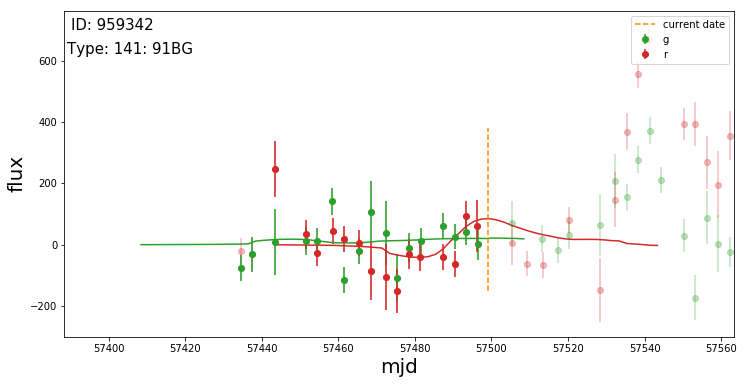

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57532.4612   r 598                 0 ...   88.42   28.6  21.924921 965870
 57532.485   g 598                 0 ...  227.73  29.28  22.593765 965870
57536.4648   r 598                 0 ...   74.09   28.5   21.90726 965870
57540.4682   g 598                 0 ...   44.28  28.46  22.573503 965870
57543.4548   g 598                 0 ...   32.55  28.26  22.566544 965870
57543.4673   r 598                 0 ...   45.03  28.51  21.878742 965870
57546.4462   g 598                 0 ...   30.98  28.32  22.560373 965870
57546.4657   r 598                 0 ...   46.09  28.62  21.867323 965870
57551.4424   g 598                 0 ...   28.95  28.25  22.550617 965870
57551.4637   r 598                 0 ...   44.41  28.57  21.848888 965870
       ... ...          ...      ... ...     ...    ...        ...    ...
57684.2121   r 598                 0 .

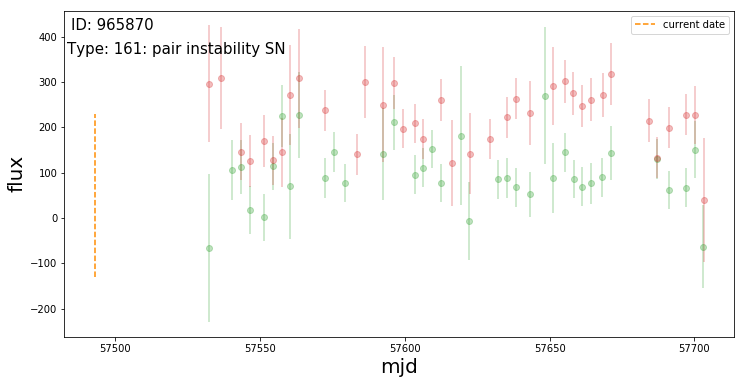

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57434.1117   r 649                 0 ...   74.11  28.45   98.71654 966414
57434.1394   g 649                 0 ...   77.73  28.82   98.71654 966414
57438.1349   g 649                 0 ...  149.89  29.08   98.71654 966414
 57533.477   r 649                 0 ...   85.71  28.37   98.71654 966414
57537.4461   r 649                 0 ...   66.98  28.49   98.71654 966414
57537.4745   g 649                 0 ...   61.19  28.59   98.71654 966414
 57546.451   g 649                 0 ...   36.57  28.39   98.71654 966414
 57546.475   r 649                 0 ...   49.15  28.53   98.71654 966414
57551.4566   g 649                 0 ...   32.83  28.29   98.71654 966414
57551.4651   r 649                 0 ...   47.99  28.51   98.71654 966414
       ... ...          ...      ... ...     ...    ...        ...    ...
57683.2877   r 649              4096 .

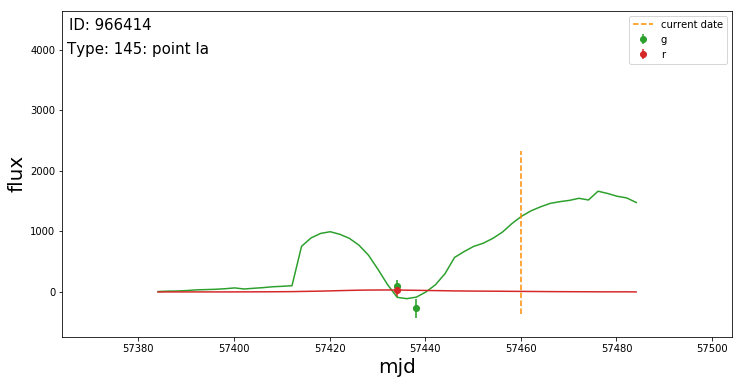

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57519.4612   g 440                 0 ...   31.82  28.32  21.695967 980384
 57533.461   r 440                 0 ...  104.93   28.5   21.18338 980384
57537.4577   r 440                 0 ...   67.82  28.48  21.308277 980384
57537.4607   g 440                 0 ...   70.03  28.71  21.430304 980384
57540.4388   r 440                 0 ...   45.37  28.53  21.334139 980384
57540.4629   g 440              4096 ...   36.14  28.38  21.461575 980384
57543.4617   r 440                 0 ...   45.11  28.61  21.310806 980384
57546.4392   g 440                 0 ...    30.1  28.31  21.460505 980384
57546.4619   r 440                 0 ...   45.11   28.6  21.336403 980384
 57551.439   g 440                 0 ...    28.5  28.27  21.366013 980384
       ... ...          ...      ... ...     ...    ...        ...    ...
57668.1063   r 440                 0 .

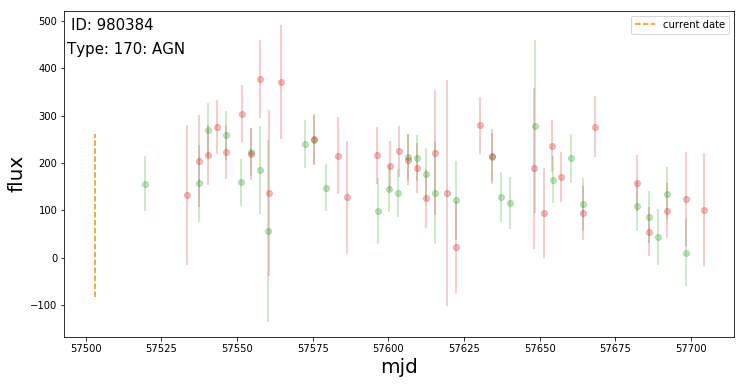

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS  SNID 
---------- --- ------------ -------- ... ------- ------ ---------- ------
57433.3225   r 751                 0 ...    44.3  28.54   98.74128 992370
57433.3645   g 751                 0 ...   26.29  28.15   98.74128 992370
57436.2598   r 751                 0 ...   72.65  28.58   98.74128 992370
 57436.327   g 751                 0 ...   71.57  28.61   98.74128 992370
57439.3056   r 751                 0 ...  116.67  28.52   98.74128 992370
57443.2944   g 751                 0 ...  113.55  28.84   98.74128 992370
57443.3367   r 751                 0 ...   87.85  28.53   98.74128 992370
57451.2584   g 751                 0 ...   23.65  28.11   98.74128 992370
57451.2878   r 751                 0 ...   37.75  28.55   98.74128 992370
57454.2831   g 751                 0 ...   24.14  28.11   98.74128 992370
       ... ...          ...      ... ...     ...    ...        ...    ...
 57687.534   r 751                 0 .

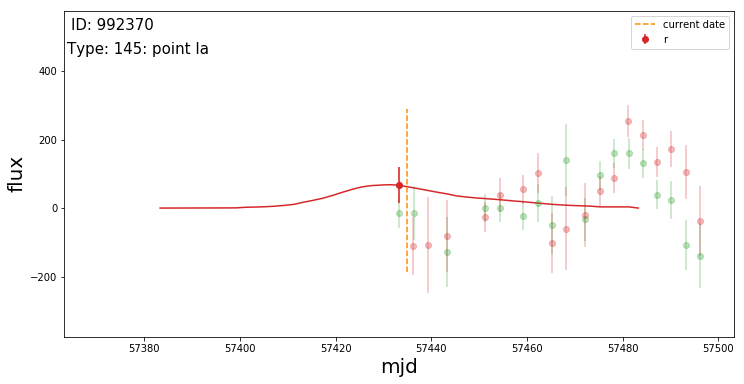

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.1878   r 357                 0 ...    59.7  28.56       99.0 1004642
57433.2323   g 357                 0 ...   58.58   28.6       99.0 1004642
57436.1484   g 357                 0 ...  111.28  28.92       99.0 1004642
57436.1691   r 357                 0 ...   98.22  28.55       99.0 1004642
  57443.21   r 357                 0 ...   83.59  28.42       99.0 1004642
57443.2311   g 357                 0 ...  111.03  28.87       99.0 1004642
57452.1901   r 357                 0 ...   47.83  28.45       99.0 1004642
57455.2109   g 357                 0 ...   37.38   28.4       99.0 1004642
57460.1476   r 357                 0 ...   52.87  28.49       99.0 1004642
57460.1844   g 357                 0 ...   42.88  28.48       99.0 1004642
       ... ...          ...      ... ...     ...    ...        ...     ...
57681.4591   r 357       

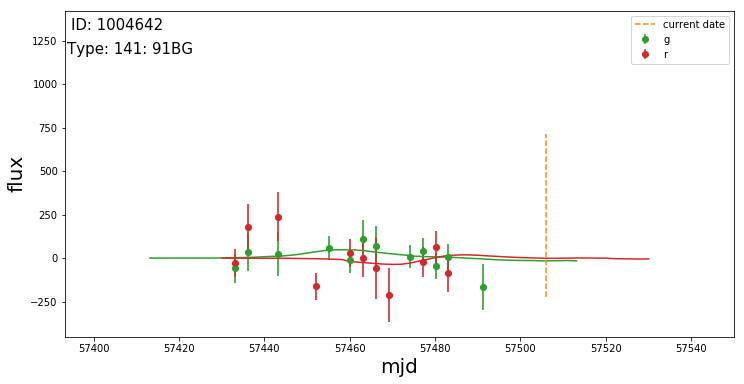

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.5555   g 797                 0 ...   29.78  28.25   98.41144 1018778
57443.5304   r 797                 0 ...   74.37  28.56   98.41144 1018778
57443.5514   g 797                 0 ...  122.12   28.9   98.41144 1018778
57452.5304   g 797                 0 ...   31.18  28.24   98.41144 1018778
57455.5103   g 797                 0 ...   26.93  28.19   98.41144 1018778
57455.5304   r 797                 0 ...    37.4   28.5   98.41144 1018778
57458.5285   g 797              4096 ...   26.07  28.14  21.065624 1018778
57461.4753   g 797              6144 ...   26.82  28.22  20.334833 1018778
57461.5311   r 797              4096 ...    40.0  28.64   20.61895 1018778
57467.4749   g 797                 0 ...   70.36  28.65  23.502733 1018778
57467.5102   r 797                 0 ...    46.2  28.64  22.433645 1018778
 57470.449   r 797       

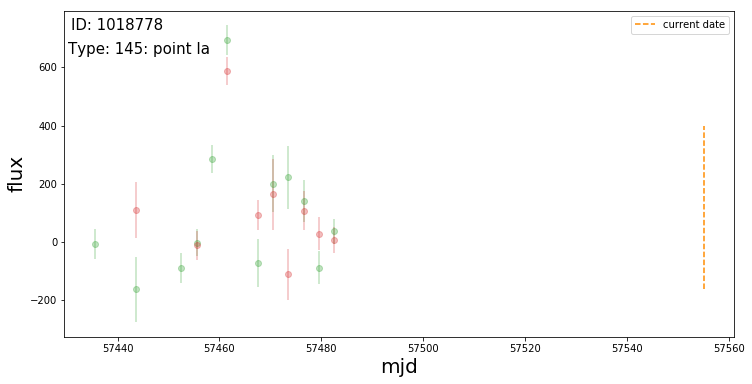

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57443.5414   r 684                 0 ...   75.96  28.51       99.0 1038326
57443.5589   g 684                 0 ...  131.98  28.98       99.0 1038326
57451.5304   g 684                 0 ...   39.17  28.42       99.0 1038326
57451.5487   r 684                 0 ...   63.49  28.53       99.0 1038326
57458.5371   g 684                 0 ...   27.76  28.18       99.0 1038326
57462.5075   g 684                 0 ...   27.34  28.23       99.0 1038326
57462.5332   r 684                 0 ...   38.76  28.49       99.0 1038326
57467.4896   g 684                 0 ...   54.07  28.56       99.0 1038326
57467.5367   r 684                 0 ...    49.2   28.6       99.0 1038326
57470.4642   r 684                 0 ...   97.35  28.53       99.0 1038326
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.1228   g 684       

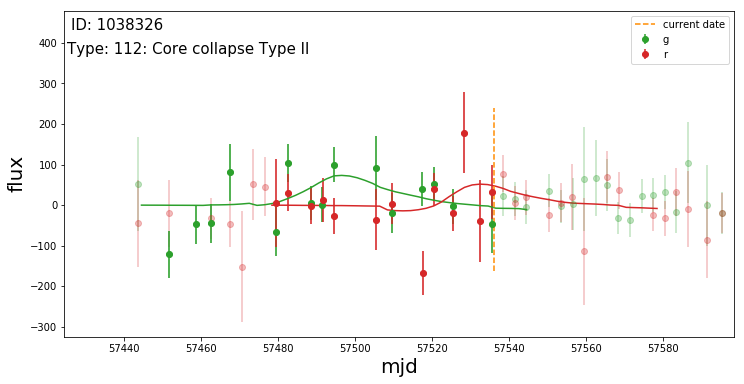

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.5229   r 582                 0 ...   38.33  28.58       99.0 1040610
 57433.545   g 582                 0 ...   24.83  28.13       99.0 1040610
57436.5026   g 582                 0 ...   25.64  28.18       99.0 1040610
 57436.523   r 582                 0 ...   37.77  28.57       99.0 1040610
57443.4387   g 582                 0 ...  131.59  28.97       99.0 1040610
57443.4609   r 582                 0 ...   95.97  28.63       99.0 1040610
57451.4618   g 582                 0 ...    27.7  28.21  22.590414 1040610
57451.5017   r 582              4096 ...    41.9  28.55  20.977667 1040610
57454.4412   g 582                 0 ...   26.54  28.21  24.036465 1040610
57454.4807   r 582              6144 ...   36.43  28.56   22.02858 1040610
       ... ...          ...      ... ...     ...    ...        ...     ...
57563.2548   r 582       

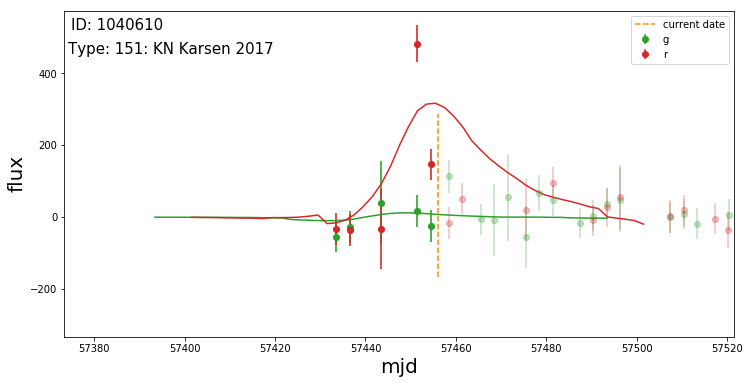

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1288   g 453                 0 ...   74.84  28.66   98.76019 1079383
57439.1715   g 453                 0 ...  164.52  29.08   98.76019 1079383
57444.1291   g 453                 0 ...   36.16  28.33   98.76019 1079383
57453.1323   g 453                 0 ...   36.78  28.35   98.76019 1079383
57453.1512   r 453                 0 ...   51.81   28.4   98.76019 1079383
57456.1291   r 453                 0 ...   49.24  28.46   98.76019 1079383
57456.1509   g 453                 0 ...   42.84  28.45   98.76019 1079383
57462.1274   r 453                 0 ...   75.83  28.39   98.76019 1079383
57467.1287   r 453                 0 ...  105.52  28.31   98.76019 1079383
 57591.446   g 453                 0 ...  167.02  29.18  21.793343 1079383
       ... ...          ...      ... ...     ...    ...        ...     ...
57681.3929   r 453       

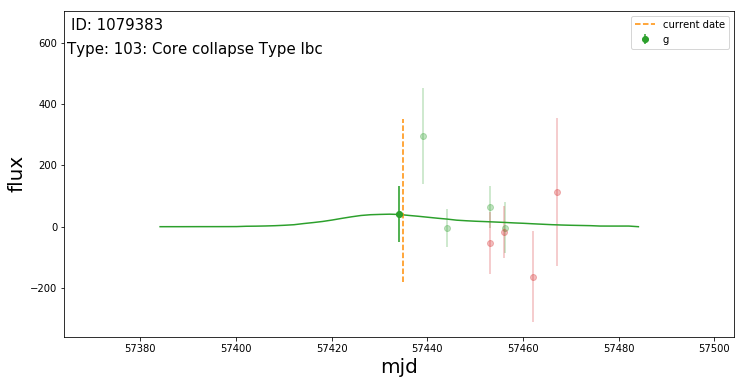

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5554   g 796                 0 ...   26.06  28.14       99.0 1100335
57437.5285   g 796                 0 ...   28.85  28.22       99.0 1100335
57443.5128   r 796                 0 ...    73.9  28.53       99.0 1100335
57443.5542   g 796                 0 ...  122.59  28.94       99.0 1100335
57452.5309   g 796                 0 ...   31.77   28.3  25.162395 1100335
57455.5165   g 796                 0 ...   26.28  28.21   24.39438 1100335
57455.5366   r 796                 0 ...   38.83  28.61  24.042742 1100335
57458.4951   r 796                 0 ...   36.98   28.5  23.483566 1100335
57458.5281   g 796                 0 ...    25.8  28.19  23.830683 1100335
57461.5116   g 796                 0 ...   23.85  28.16  23.393827 1100335
       ... ...          ...      ... ...     ...    ...        ...     ...
57672.1384   g 796       

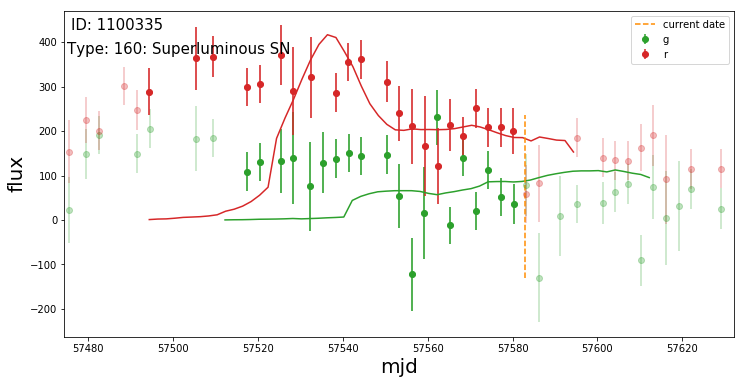

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.4816   g 581                 0 ...   24.51  28.17       99.0 1104927
57437.4803   g 581                 0 ...   41.87   28.4       99.0 1104927
57437.5022   r 581                 0 ...   41.79  28.56       99.0 1104927
57443.4382   g 581                 0 ...  134.57  29.02       99.0 1104927
57451.4613   g 581                 0 ...   26.49  28.17       99.0 1104927
57451.4813   r 581                 0 ...   40.92  28.55       99.0 1104927
57454.4194   r 581                 0 ...   39.69  28.63       99.0 1104927
57454.4407   g 581                 0 ...    24.8  28.15       99.0 1104927
57459.3969   g 581                 0 ...   26.31  28.23       99.0 1104927
57459.4208   r 581                 0 ...   38.37   28.6       99.0 1104927
       ... ...          ...      ... ...     ...    ...        ...     ...
57558.2706   r 581       

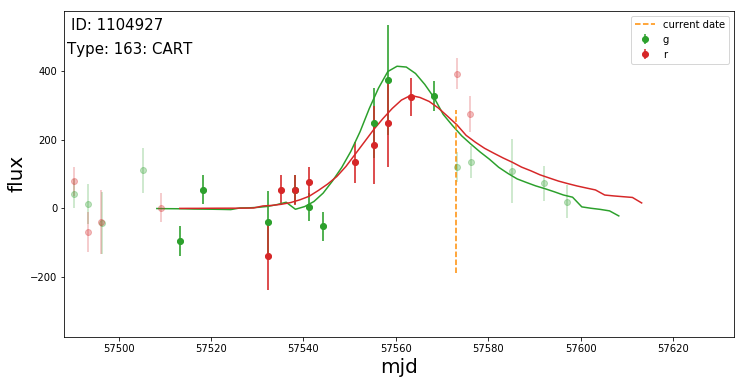

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.5502   g 682                 0 ...   28.71  28.22       99.0 1120910
57439.5479   g 682                 0 ...   58.07  28.52       99.0 1120910
57443.5275   r 682                 0 ...   72.83  28.52       99.0 1120910
57443.5475   g 682                 0 ...   121.2  28.94       99.0 1120910
57451.5295   g 682                 0 ...   37.52  28.37       99.0 1120910
57451.5468   r 682                 0 ...   57.76  28.57       99.0 1120910
57454.5069   r 682                 0 ...   38.21  28.51       99.0 1120910
 57454.539   g 682                 0 ...    26.0  28.17       99.0 1120910
57458.5347   g 682                 0 ...   24.95  28.14       99.0 1120910
57461.5184   g 682                 0 ...   23.31  28.12       99.0 1120910
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.1013   r 682       

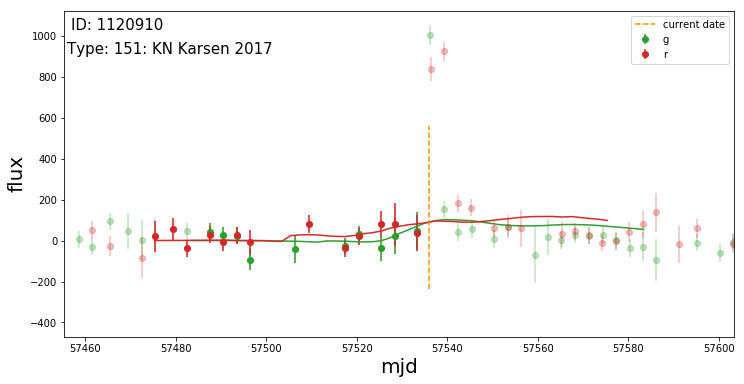

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2631   g 814                 0 ...   42.21  28.37  15.060745 1186507
57433.2877   r 814                 0 ...   50.97  28.51  14.442735 1186507
57436.2006   r 814                 0 ...   71.34  28.49  14.442592 1186507
57436.2378   g 814                 0 ...   78.27  28.66  15.060599 1186507
57439.2998   r 814                 0 ...  115.82  28.53  14.442439 1186507
57443.2375   g 814                 0 ...   92.01  28.74  15.060256 1186507
57443.2843   r 814                 0 ...   78.77  28.53  14.442244 1186507
57451.1702   r 814                 0 ...   39.58   28.5  14.441856 1186507
57451.2646   g 814                 0 ...   27.19   28.2  15.059861 1186507
57454.2429   r 814                 0 ...   43.37  28.53  14.441705 1186507
       ... ...          ...      ... ...     ...    ...        ...     ...
 57687.473   g 814       

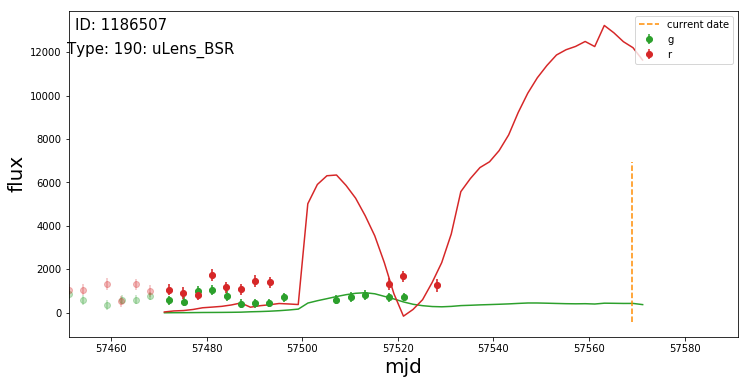

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4898   g 758                 0 ...   23.24   28.1       99.0 1191680
57433.5179   r 758                 0 ...   36.29  28.55       99.0 1191680
57436.4726   r 758                 0 ...   40.33  28.56       99.0 1191680
57436.4981   g 758                 0 ...    24.3  28.11       99.0 1191680
57439.4688   r 758                 0 ...   81.08  28.54       99.0 1191680
57439.5087   g 758                 0 ...   90.81  28.73       99.0 1191680
57443.4095   g 758                 0 ...  124.44  28.95       99.0 1191680
57443.4721   r 758                 0 ...   82.19  28.53       99.0 1191680
57451.4092   g 758                 0 ...   23.97  28.14       99.0 1191680
57451.4503   r 758                 0 ...   36.15  28.55       99.0 1191680
       ... ...          ...      ... ...     ...    ...        ...     ...
57584.1832   g 758       

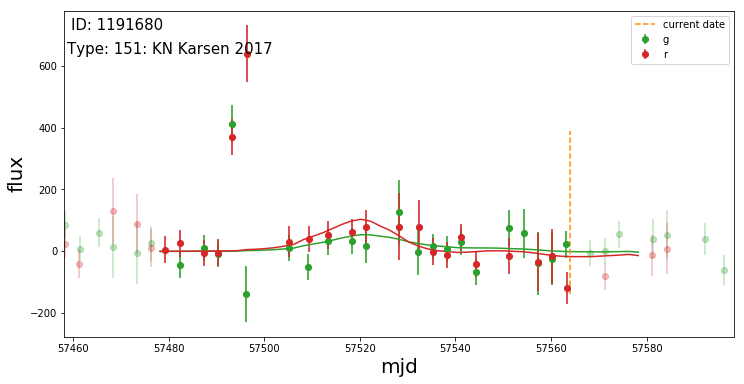

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57555.4426   g 446              4096 ...   36.37  28.45  20.116163 1192233
57558.4196   g 446                 0 ...  152.21  29.15  20.129704 1192233
 57562.479   r 446              6144 ...   98.97  28.43  19.075613 1192233
57573.4573   g 446              4096 ...   30.71  28.28  20.200296 1192233
57576.4574   g 446              4096 ...   30.69  28.27  20.214796 1192233
57581.4622   r 446              4096 ...   43.92  28.63  19.105787 1192233
57585.4613   g 446              4096 ...   31.78  28.32  20.258965 1192233
57585.4826   r 446              4096 ...   72.99  28.57     19.113 1192233
57597.3831   g 446              4096 ...   35.64  28.38   20.31893 1192233
 57597.467   r 446              4096 ...   51.94  28.58  19.136013 1192233
       ... ...          ...      ... ...     ...    ...        ...     ...
57683.2114   g 446       

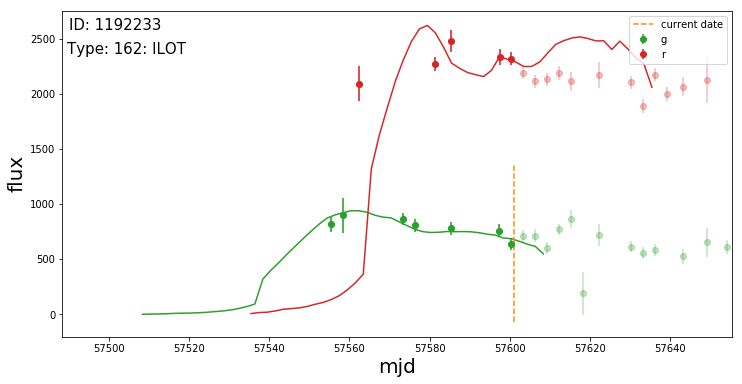

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1292   g 452                 0 ...   81.55  28.76       99.0 1193503
57438.1293   g 452                 0 ...  135.22  28.98       99.0 1193503
57444.1296   g 452                 0 ...    38.9  28.39       99.0 1193503
57453.1327   g 452                 0 ...    41.8  28.43       99.0 1193503
57461.1303   g 452                 0 ...   79.29  28.76       99.0 1193503
57589.4409   r 452                 0 ...  125.83  28.56       99.0 1193503
57592.4834   g 452                 0 ...  126.97  28.99       99.0 1193503
57599.4645   g 452                 0 ...   40.68  28.44       99.0 1193503
57599.4823   r 452                 0 ...    57.2  28.57       99.0 1193503
57602.4631   g 452                 0 ...    32.5  28.31       99.0 1193503
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.3727   g 452       

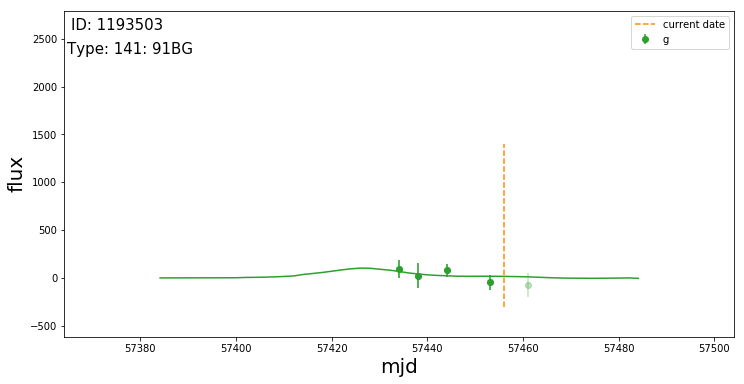

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57436.1532   g 559                 0 ...   95.63   28.8       99.0 1229420
57439.1512   r 559                 0 ...   90.26  28.59       99.0 1229420
57439.1857   g 559                 0 ...  130.54  28.95       99.0 1229420
57444.1437   g 559                 0 ...   28.92  28.25       99.0 1229420
57452.1444   g 559                 0 ...   25.88  28.16       99.0 1229420
57456.1437   r 559                 0 ...   41.25  28.57       99.0 1229420
57456.1611   g 559                 0 ...   29.48  28.23       99.0 1229420
57463.1322   g 559                 0 ...   70.57  28.69       99.0 1229420
57463.1524   r 559                 0 ...   78.76  28.54       99.0 1229420
57466.1272   r 559                 0 ...   74.11  28.45       99.0 1229420
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.4857   g 559       

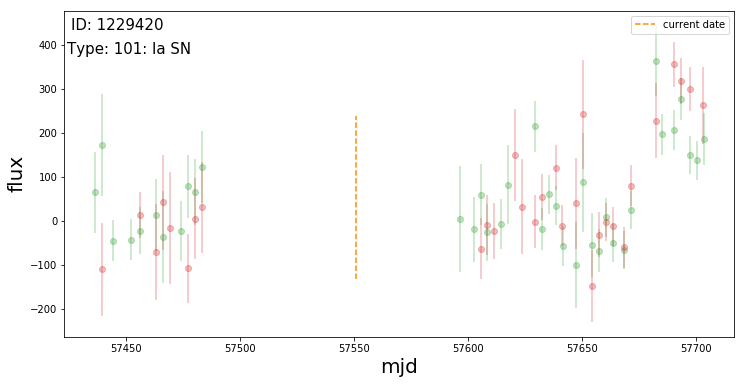

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57471.4808   r 382                 0 ...   99.74  28.59  20.383646 1242938
57471.5014   g 382                 0 ...  168.69  29.12  20.694885 1242938
  57474.46   r 382                 0 ...  103.56  28.54  20.414768 1242938
57474.5225   g 382                 0 ...  152.99  29.09  20.898203 1242938
57481.4398   r 382              4096 ...   46.85  28.56  20.642084 1242938
57481.5019   g 382                 0 ...   40.16  28.44  21.396746 1242938
57489.4808   g 382                 0 ...   32.22  28.34   21.96418 1242938
57489.5014   r 382              6144 ...   50.21  28.56   21.02015 1242938
 57492.459   r 382              4096 ...   45.22  28.61   21.18404 1242938
57492.4807   g 382                 0 ...   31.07  28.31  22.176071 1242938
       ... ...          ...      ... ...     ...    ...        ...     ...
57540.3977   g 382       

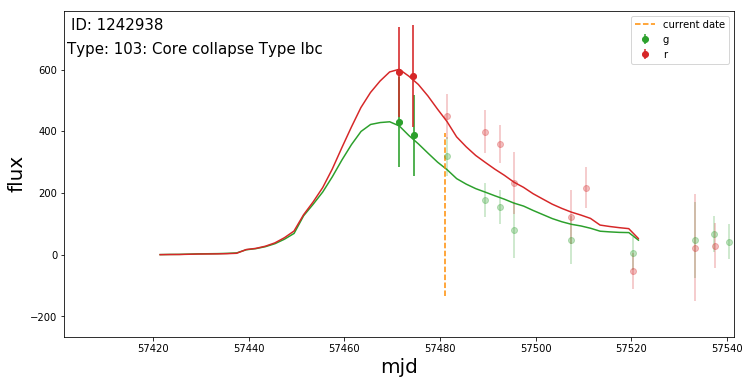

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.3367   r 572                 0 ...   43.11  28.56  18.192812 1277212
57436.2958   g 572                 0 ...   72.59  28.68  18.196978 1277212
57436.3359   r 572                 0 ...   70.86  28.53  18.191845 1277212
57439.2728   g 572                 0 ...   172.6  29.13  18.201593 1277212
57439.3267   r 572                 0 ...  141.63  28.52  18.195814 1277212
57444.2829   g 572                 0 ...   88.92  28.76  18.218182 1277212
 57444.303   r 572                 0 ...   86.95  28.54  18.210945 1277212
 57451.276   r 572                 0 ...   39.81  28.58  18.228176 1277212
57451.2946   g 572                 0 ...   24.91  28.13  18.238434 1277212
57455.2802   g 572                 0 ...    25.7  28.14  18.234638 1277212
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.5262   r 572       

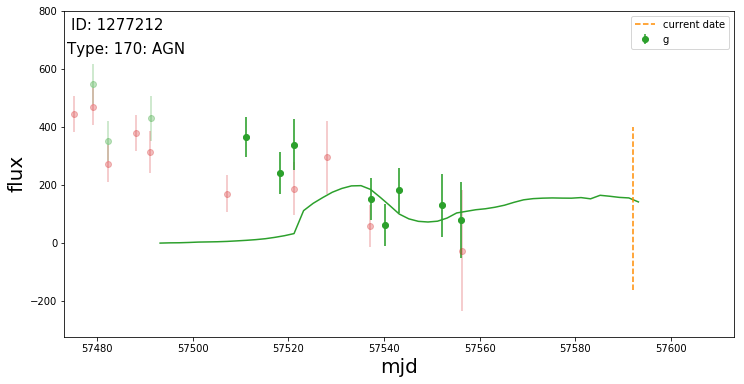

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1592   g 701                 0 ...   68.03  28.62       99.0 1288407
57434.1835   r 701                 0 ...    82.7  28.61       99.0 1288407
57437.1728   r 701                 0 ...   94.34   28.6       99.0 1288407
57437.2019   g 701                 0 ...  105.11  28.85       99.0 1288407
57440.1167   g 701                 0 ...   95.42  28.75       99.0 1288407
57443.1357   g 701                 0 ...   31.75  28.26       99.0 1288407
57452.1329   g 701                 0 ...    26.0   28.2       99.0 1288407
 57455.132   g 701                 0 ...   26.07  28.13       99.0 1288407
57455.1623   r 701                 0 ...    40.3  28.59       99.0 1288407
57460.1529   r 701                 0 ...   58.26  28.59       99.0 1288407
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4107   g 701       

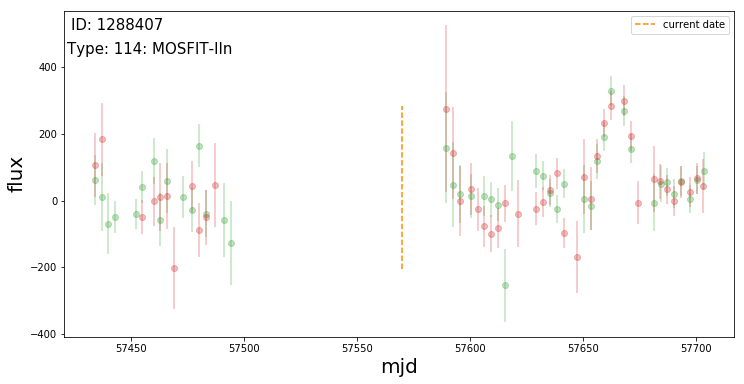

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57532.4598   r 495                 0 ...   93.04  28.62  21.332785 1291776
57532.4827   g 495                 0 ...  218.98  29.29    22.4386 1291776
  57535.46   r 495                 0 ...    87.4  28.56  21.337801 1291776
57539.4666   g 495                 0 ...    51.3  28.56  22.494574 1291776
 57539.483   r 495                 0 ...  106.09   28.5  21.348389 1291776
57543.4572   g 495                 0 ...   32.52  28.27  22.530495 1291776
 57543.465   r 495                 0 ...   46.07  28.55  21.360481 1291776
57546.4434   g 495                 0 ...   31.97  28.36   22.56005 1291776
57546.4775   r 495                 0 ...    43.4  28.46  21.372448 1291776
57552.4567   g 495                 0 ...   30.09  28.22  22.624033 1291776
       ... ...          ...      ... ...     ...    ...        ...     ...
57671.2576   r 495       

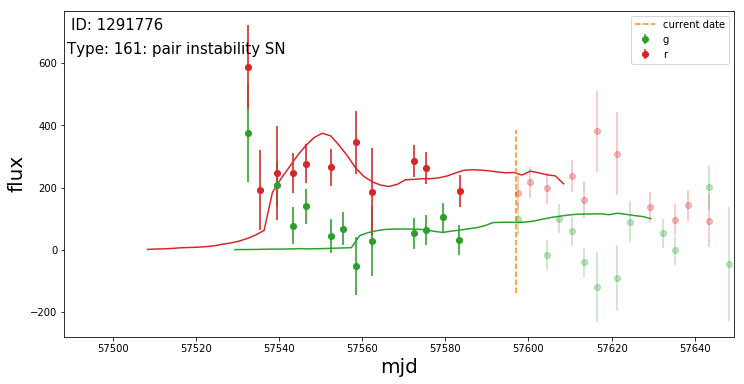

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.1181   g 736                 0 ...   92.83  28.87  99.114174 1293885
57435.1424   r 736                 0 ...   81.05  28.51  99.114174 1293885
57438.1359   g 736                 0 ...  154.82  29.14  99.114174 1293885
57532.4664   r 736                 0 ...   87.19  28.52  99.114174 1293885
57535.4774   r 736                 0 ...   64.66   28.4  99.114174 1293885
57538.4463   r 736                 0 ...   56.63  28.55  99.114174 1293885
57538.4674   g 736                 0 ...   53.98  28.57  99.114174 1293885
 57543.451   g 736                 0 ...   35.61  28.39  99.114174 1293885
57543.4712   r 736                 0 ...   48.88  28.58  99.114174 1293885
57546.4505   g 736                 0 ...   33.29  28.32  99.114174 1293885
       ... ...          ...      ... ...     ...    ...        ...     ...
57611.3923   g 736       

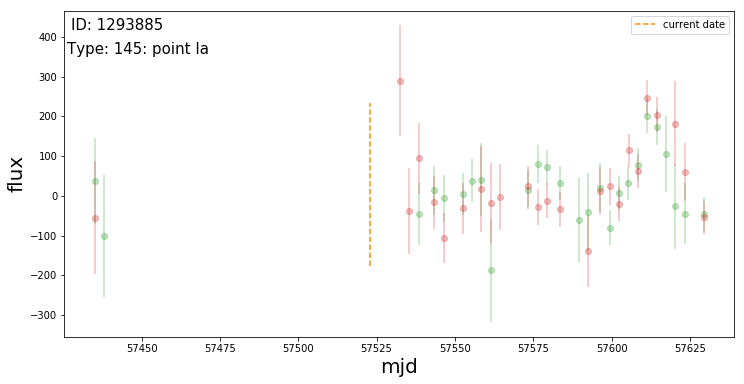

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
  57434.42   g 474                 0 ...   25.75  28.16    99.5828 1294327
57437.3406   g 474                 0 ...  103.58  28.92    99.5828 1294327
57452.3956   g 474                 0 ...   25.41  28.13    99.5828 1294327
57455.3312   g 474                 0 ...   29.93  28.27    99.5828 1294327
57460.3313   g 474                 0 ...   27.75  28.21    99.5828 1294327
57460.3372   r 474                 0 ...   41.84  28.54    99.5828 1294327
57463.3323   r 474                 0 ...    49.5  28.53    99.5828 1294327
57463.3775   g 474                 0 ...   27.89  28.17    99.5828 1294327
57466.3159   r 474                 0 ...   77.19  28.54    99.5828 1294327
57469.2908   g 474                 0 ...  273.77  29.27    99.5828 1294327
       ... ...          ...      ... ...     ...    ...        ...     ...
57536.1699   g 474       

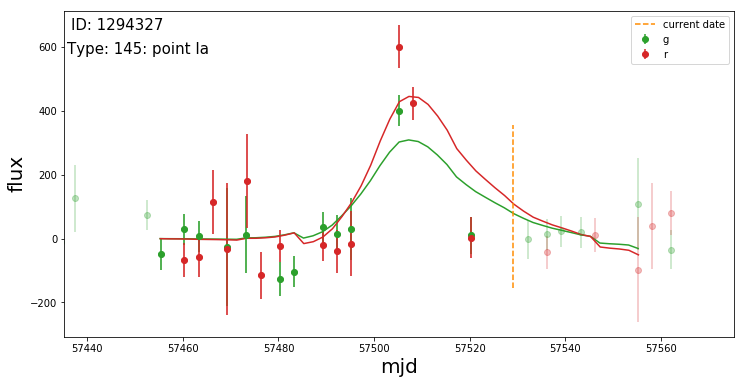

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57533.4629   r 441                 0 ...  101.49  28.56       99.0 1361570
57537.4422   r 441                 0 ...   74.44  28.61       99.0 1361570
57537.4612   g 441                 0 ...   68.56  28.67       99.0 1361570
57540.4393   r 441                 0 ...   48.51  28.59       99.0 1361570
57540.4639   g 441                 0 ...   36.62  28.34       99.0 1361570
57543.4626   r 441                 0 ...   43.48   28.5       99.0 1361570
57546.4277   g 441                 0 ...   30.91  28.31       99.0 1361570
57546.4628   r 441                 0 ...   45.65  28.62       99.0 1361570
57551.4395   g 441                 0 ...   28.21  28.21       99.0 1361570
57551.4603   r 441                 0 ...   46.93   28.6       99.0 1361570
       ... ...          ...      ... ...     ...    ...        ...     ...
57671.1478   r 441       

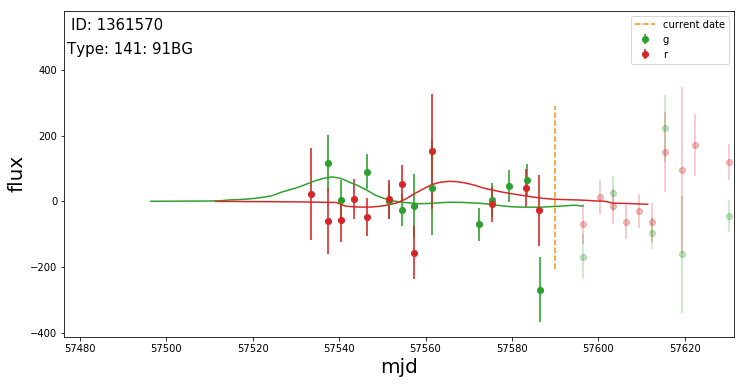

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5258   r 722              4096 ...   38.65   28.6  17.146828 1373503
57434.5545   g 722              6144 ...   24.28  28.11  17.500286 1373503
57437.5305   g 722              4096 ...   27.82  28.19   17.41072 1373503
57437.5512   r 722              4096 ...    41.7  28.54  17.154743 1373503
57443.4444   g 722              4096 ...  117.71  28.94  16.470644 1373503
57443.5088   r 722              4096 ...   76.22  28.56   16.58252 1373503
57451.5123   r 722              4096 ...   40.34  28.54  17.283255 1373503
57451.5364   g 722                 0 ...   30.69   28.2  17.220074 1373503
57454.4909   r 722              4096 ...   36.06  28.56  17.164648 1373503
57454.5297   g 722              4096 ...   23.85  28.08  17.439695 1373503
       ... ...          ...      ... ...     ...    ...        ...     ...
57637.1305   r 722       

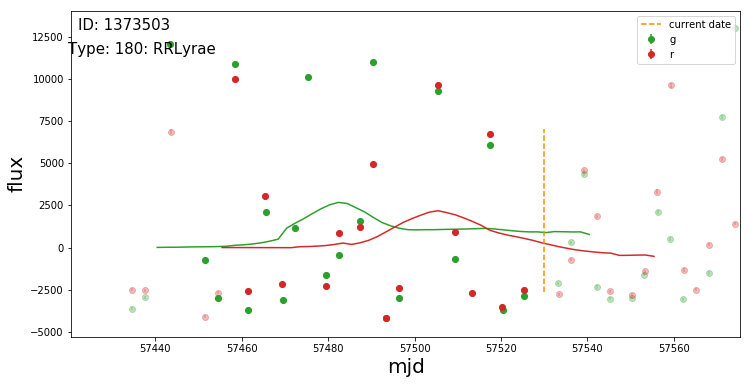

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4294   g 844                 0 ...   28.05  28.25       99.0 1375154
57436.3179   g 844                 0 ...   79.41  28.72       99.0 1375154
57436.4107   r 844                 0 ...   65.25   28.6       99.0 1375154
57439.2857   g 844                 0 ...  157.37   29.1       99.0 1375154
57439.3657   r 844                 0 ...   92.67  28.49       99.0 1375154
57443.3634   r 844                 0 ...   79.59  28.48       99.0 1375154
57451.3057   g 844                 0 ...   29.81  28.28       99.0 1375154
57454.2773   g 844                 0 ...   32.17  28.34       99.0 1375154
57454.3685   r 844                 0 ...   44.54   28.6       99.0 1375154
57458.3826   g 844                 0 ...    28.2  28.25       99.0 1375154
       ... ...          ...      ... ...     ...    ...        ...     ...
57619.1761   g 844       

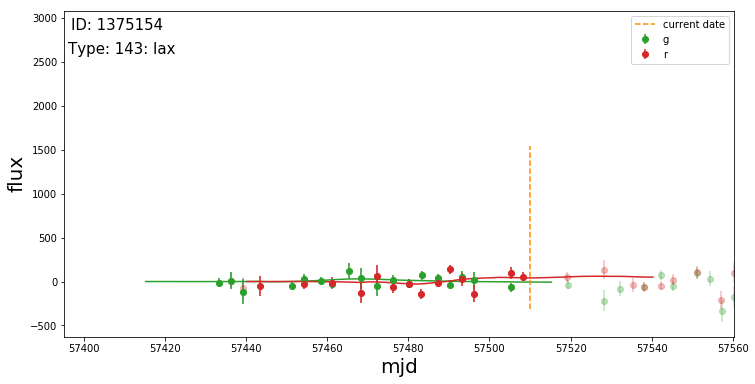

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.5517   g 638              4096 ...   36.83  28.41  21.218163 1378934
57443.5594   g 638                 0 ...  135.34  28.97  21.226307 1378934
57451.5328   g 638              6144 ...   40.05  28.41  21.251709 1378934
57455.5209   g 638                 0 ...   32.03  28.23  21.270285 1378934
57458.5404   g 638              4096 ...   29.43  28.24  21.286633 1378934
57462.5182   g 638                 0 ...    27.5  28.17  21.311293 1378934
57462.5283   r 638              4096 ...   41.52  28.57  20.735607 1378934
 57465.517   g 638              4096 ...   29.01  28.25  21.331944 1378934
57465.5289   r 638              4096 ...   42.13  28.53  20.742016 1378934
57469.5055   g 638                 0 ...  100.78  28.85  21.362291 1378934
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.1233   g 638       

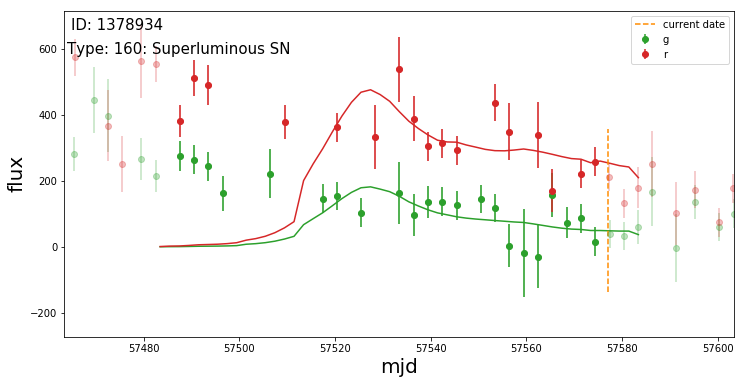

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.3028   g 367                 0 ...   57.88  28.61   98.82123 1410870
57434.3168   r 367                 0 ...   57.69   28.5   98.82123 1410870
57437.2957   r 367                 0 ...   90.96  28.53   98.82123 1410870
57437.3537   g 367                 0 ...  110.37  28.91   98.82123 1410870
57444.3515   g 367                 0 ...  125.44  28.98   98.82123 1410870
57444.3956   r 367                 0 ...  102.89  28.51   98.82123 1410870
57452.2951   g 367                 0 ...   32.81  28.34   98.82123 1410870
57455.2765   g 367                 0 ...   33.33  28.36   98.82123 1410870
57455.2944   r 367                 0 ...   47.49  28.57   98.82123 1410870
57460.2768   g 367                 0 ...   31.63  28.32   98.82123 1410870
       ... ...          ...      ... ...     ...    ...        ...     ...
57482.2112   g 367       

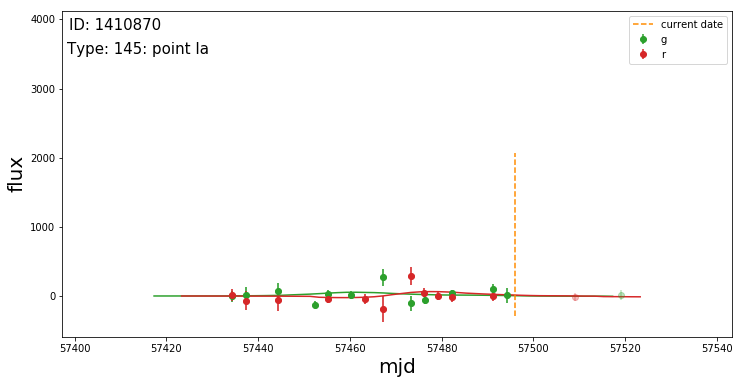

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1209   r 651                 0 ...   75.38  28.64  98.492096 1433062
57434.1413   g 651                 0 ...   73.91  28.76  98.492096 1433062
 57438.142   g 651                 0 ...  141.67  29.06  98.492096 1433062
57444.1329   g 651                 0 ...   39.04  28.41  98.492096 1433062
57453.1355   g 651                 0 ...   43.38  28.51  98.492096 1433062
57461.1335   g 651                 0 ...   80.79  28.79  98.492096 1433062
57559.4751   g 651                 0 ...  140.17   29.0  98.492096 1433062
57562.4549   g 651                 0 ...  113.16  28.91  98.492096 1433062
57562.4743   r 651                 0 ...   84.17  28.52  98.492096 1433062
57565.4336   r 651                 0 ...   77.73  28.45  98.492096 1433062
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.2355   r 651       

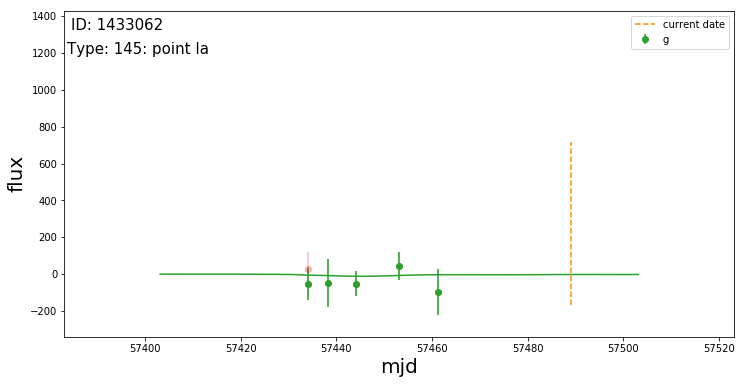

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.4169   g 848                 0 ...   51.83  28.62  98.823906 1451779
57444.4137   g 848                 0 ...  110.43  28.93  98.823906 1451779
57444.5088   r 848                 0 ...   71.28  28.55  98.823906 1451779
57453.4036   g 848                 0 ...   35.13  28.39  98.823906 1451779
57453.4926   r 848                 0 ...   40.81  28.55  98.823906 1451779
57456.3721   g 848                 0 ...   37.25  28.37  98.823906 1451779
57456.4277   r 848                 0 ...   45.02  28.56  98.823906 1451779
57460.3709   g 848                 0 ...    34.6  28.36  98.823906 1451779
 57460.538   r 848                 0 ...    42.0  28.61  98.823906 1451779
57467.3203   g 848                 0 ...  120.51  29.01  98.823906 1451779
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.0941   r 848       

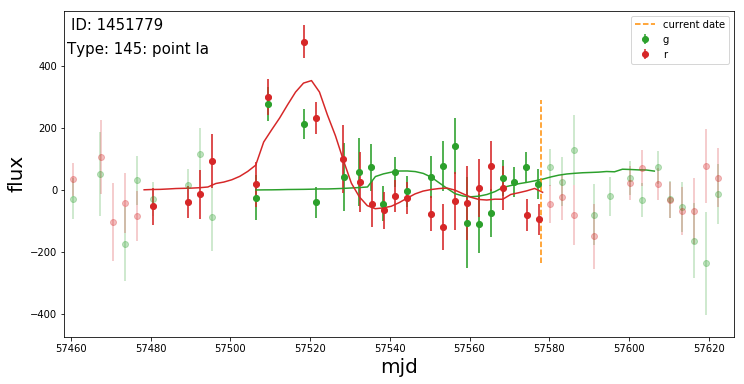

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.5536   g 724              4096 ...   28.05  28.24  19.038963 1466549
57439.5523   g 724              6144 ...   58.21  28.57  19.068367 1466549
 57443.528   r 724                 0 ...    76.6  28.63  19.064669 1466549
57443.5494   g 724                 0 ...  115.79  28.89  19.082932 1466549
57452.5095   r 724                 0 ...   43.02  28.63  19.089243 1466549
57452.5285   g 724              4096 ...   30.32  28.24  19.110348 1466549
57455.5194   g 724                 0 ...    25.3  28.16  19.112055 1466549
 57455.528   r 724              4096 ...   37.02  28.57  19.091713 1466549
57458.4913   r 724              4096 ...   38.66  28.64  19.084766 1466549
57458.5123   g 724              4096 ...   24.52  28.14  19.105343 1466549
       ... ...          ...      ... ...     ...    ...        ...     ...
57669.1092   r 724       

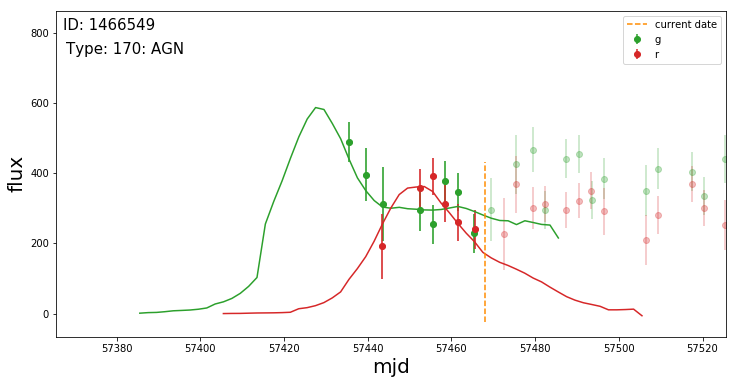

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2173   r 783                 0 ...   54.32  28.59  99.046104 1473559
57433.2626   g 783                 0 ...   41.12  28.39  99.046104 1473559
 57436.201   r 783                 0 ...   77.76  28.59  99.046104 1473559
57436.2168   g 783                 0 ...   84.35  28.73  99.046104 1473559
57443.2031   g 783                 0 ...   72.75  28.66  99.046104 1473559
57443.2848   r 783                 0 ...   85.65  28.63  99.046104 1473559
 57451.225   r 783                 0 ...   41.08   28.6  99.046104 1473559
57451.2651   g 783                 0 ...   26.47  28.23  99.046104 1473559
57454.2439   r 783                 0 ...   44.13  28.63  99.046104 1473559
57454.2579   g 783                 0 ...   25.99  28.13  99.046104 1473559
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4725   g 783       

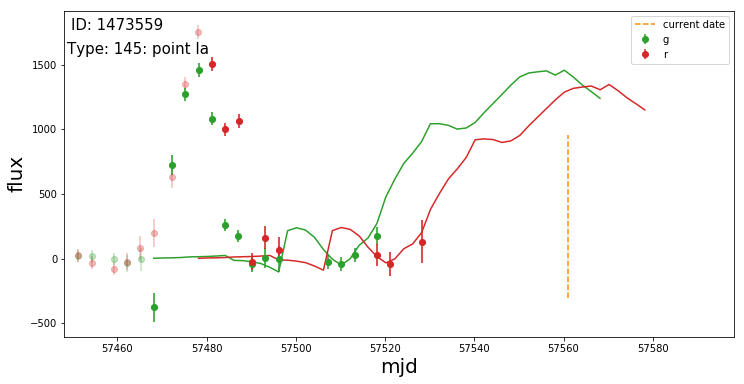

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57532.4589   r 443                 0 ...   97.01  28.57  20.882896 1485368
57532.4813   g 443                 0 ...  228.38  29.29    21.6802 1485368
57540.4662   g 443                 0 ...   40.99  28.43  21.700476 1485368
57543.4577   g 443                 0 ...   34.26  28.34  21.708826 1485368
57543.4645   r 443              4096 ...   46.22  28.49  20.871292 1485368
 57546.442   g 443                 0 ...   33.21  28.36   21.71753 1485368
57546.4784   r 443              6144 ...    46.4  28.53  20.869171 1485368
57552.4583   g 443                 0 ...   32.17   28.3   21.73615 1485368
57552.4613   r 443                 0 ...   46.45  28.54  20.866165 1485368
57555.4397   g 443                 0 ...   32.71  28.34   21.74588 1485368
       ... ...          ...      ... ...     ...    ...        ...     ...
57669.2851   g 443       

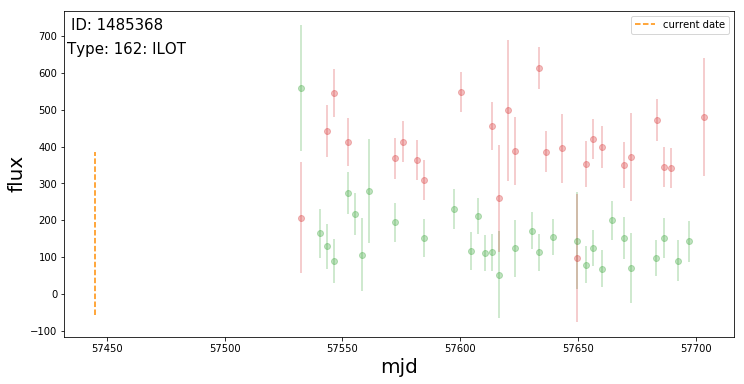

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1237   r 606                 0 ...   85.85   28.6       99.0 1488446
57434.1621   g 606                 0 ...   74.79  28.71       99.0 1488446
57438.2146   g 606                 0 ...  137.98  29.03       99.0 1488446
57443.1307   g 606                 0 ...    34.8  28.32       99.0 1488446
57452.1411   g 606                 0 ...   31.38  28.33       99.0 1488446
 57455.142   g 606                 0 ...   33.24  28.33       99.0 1488446
57462.1301   r 606                 0 ...   69.33  28.44       99.0 1488446
57462.1514   g 606                 0 ...   84.65  28.76       99.0 1488446
57465.1708   g 606                 0 ...  107.87   28.9       99.0 1488446
57575.4857   g 606                 0 ...  240.81  29.32       99.0 1488446
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.3093   g 606       

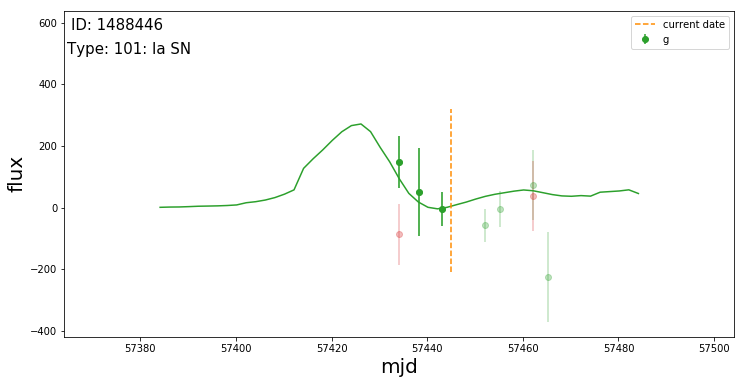

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1461   g 253                 0 ...   91.76  28.83  19.255991 1501996
 57434.168   r 253                 0 ...   91.96  28.36  18.560566 1501996
 57438.127   g 253                 0 ...  152.66  29.11   19.25213 1501996
57631.5013   r 253                 0 ...   61.01  28.55  18.398876 1501996
57634.5014   r 253              4096 ...   57.75  28.52  18.416876 1501996
57639.4815   g 253                 0 ...    42.8  28.53   19.13726 1501996
57639.5016   r 253              6144 ...   55.22   28.5   18.44295 1501996
57648.4589   r 253                 0 ...  140.71  28.52  18.476805 1501996
57648.5227   g 253                 0 ...  358.82  29.53  19.172403 1501996
57651.4398   g 253                 0 ...  117.56   29.0  19.180876 1501996
       ... ...          ...      ... ...     ...    ...        ...     ...
 57684.398   g 253       

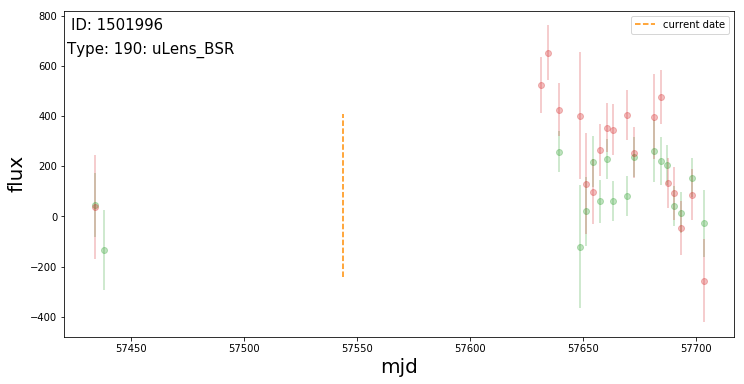

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.3153   r 569                 0 ...   45.95  28.54  20.461483 1516134
57433.3591   g 569                 0 ...   27.23   28.2  21.375313 1516134
57436.2554   r 569                 0 ...   77.15  28.56   20.46141 1516134
57436.3067   g 569                 0 ...   85.05   28.7   21.37524 1516134
57443.2459   g 569                 0 ...  104.24  28.81  21.375072 1516134
57443.3158   r 569                 0 ...   99.24  28.54  20.461239 1516134
57451.2527   g 569                 0 ...   24.31  28.11  21.374876 1516134
57454.2723   g 569                 0 ...   25.93  28.15  21.374804 1516134
57459.2311   r 569                 0 ...   36.87  28.55  20.460852 1516134
57459.2691   g 569                 0 ...   24.23  28.13  21.374681 1516134
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.5288   g 569       

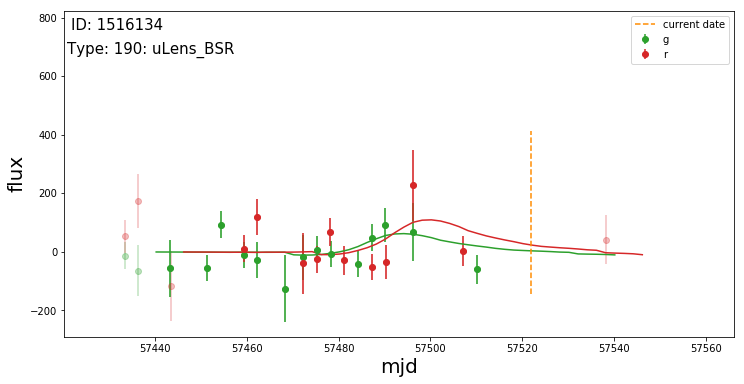

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4135   r 673                 0 ...   39.26  28.55       99.0 1527852
57433.4235   g 673                 0 ...   22.86  28.08       99.0 1527852
 57436.382   g 673                 0 ...   59.07  28.57       99.0 1527852
57436.4559   r 673                 0 ...   46.87   28.5       99.0 1527852
57439.3744   r 673                 0 ...  103.38  28.58       99.0 1527852
57439.4011   g 673                 0 ...  196.74  29.11       99.0 1527852
57443.3557   r 673                 0 ...  108.81   28.6       99.0 1527852
57451.3397   r 673                 0 ...    40.7  28.61       99.0 1527852
57451.3795   g 673                 0 ...   22.97  28.08       99.0 1527852
57454.3389   g 673                 0 ...   25.93  28.18       99.0 1527852
       ... ...          ...      ... ...     ...    ...        ...     ...
57558.1936   r 673       

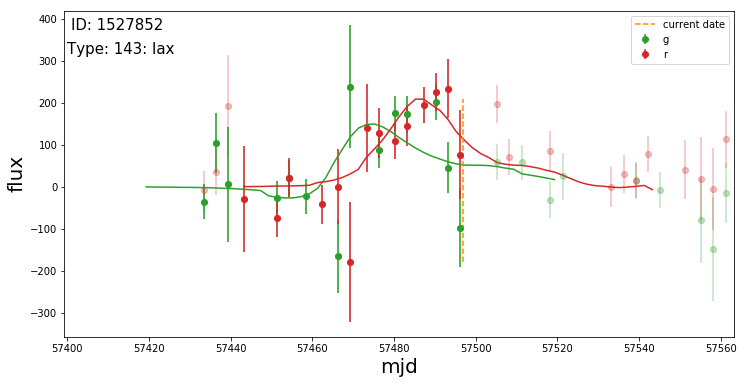

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57453.5087   r 764                 0 ...    40.2  28.57       99.0 1558866
57453.5296   g 764                 0 ...    28.7  28.19       99.0 1558866
57456.5177   g 764                 0 ...   26.98  28.17       99.0 1558866
57456.5359   r 764                 0 ...   39.98  28.64       99.0 1558866
57460.5082   g 764                 0 ...   24.67  28.13       99.0 1558866
57460.5328   r 764                 0 ...   39.57  28.62       99.0 1558866
57467.4758   g 764                 0 ...   71.52  28.66       99.0 1558866
57467.5328   r 764                 0 ...   47.89  28.58       99.0 1558866
57470.4676   r 764                 0 ...   94.12  28.53       99.0 1558866
57470.5306   g 764                 0 ...   99.95   28.8       99.0 1558866
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.1012   r 764       

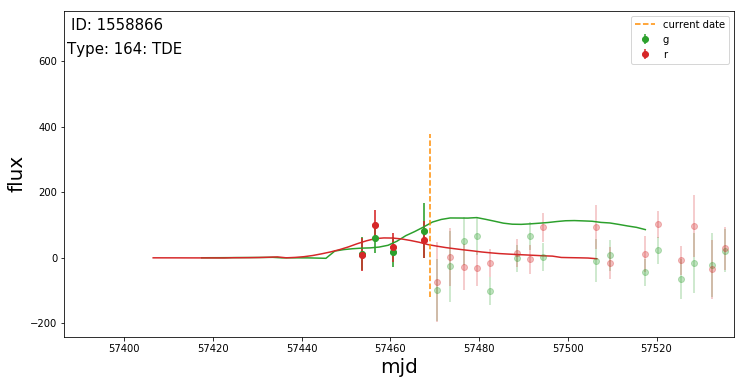

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
  57434.42   g 474              4096 ...   25.75  28.16  20.493607 1563414
57437.3406   g 474                 0 ...  103.58  28.92  20.492758 1563414
57452.3956   g 474              6144 ...   25.41  28.13  20.490864 1563414
57455.3312   g 474              4096 ...   29.93  28.27  20.492393 1563414
57460.3313   g 474              4096 ...   27.75  28.21   20.49253 1563414
57460.3372   r 474                 0 ...   41.84  28.54  19.322382 1563414
57463.3323   r 474              4096 ...    49.5  28.53  19.322622 1563414
57463.3775   g 474              4096 ...   27.89  28.17  20.492693 1563414
57466.3159   r 474                 0 ...   77.19  28.54  19.322927 1563414
57469.2908   g 474                 0 ...  273.77  29.27  20.493093 1563414
       ... ...          ...      ... ...     ...    ...        ...     ...
57536.1699   g 474       

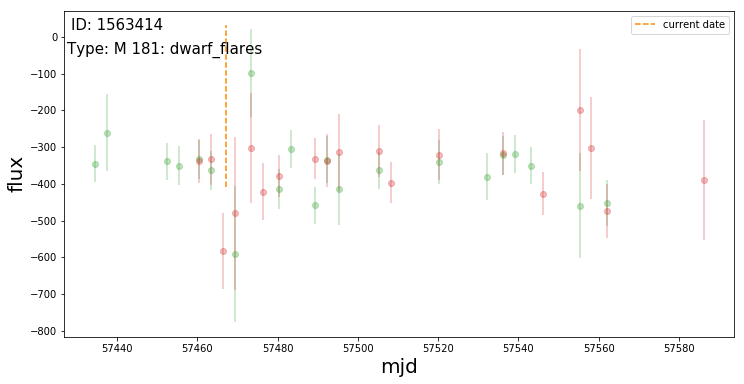

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.3348   r 620                 0 ...   41.75  28.52       99.0 1574774
57433.3586   g 620                 0 ...   25.78  28.12       99.0 1574774
57436.2573   r 620                 0 ...   73.77  28.61       99.0 1574774
57436.2963   g 620                 0 ...   74.17  28.63       99.0 1574774
57443.2444   g 620                 0 ...  111.37  28.88       99.0 1574774
57443.3148   r 620                 0 ...   98.56  28.49       99.0 1574774
57451.2551   g 620                 0 ...   23.89   28.1       99.0 1574774
57451.2745   r 620                 0 ...    38.0  28.53       99.0 1574774
57454.2947   r 620                 0 ...   41.23  28.52       99.0 1574774
57460.3166   g 620                 0 ...   24.21  28.12       99.0 1574774
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.5417   r 620       

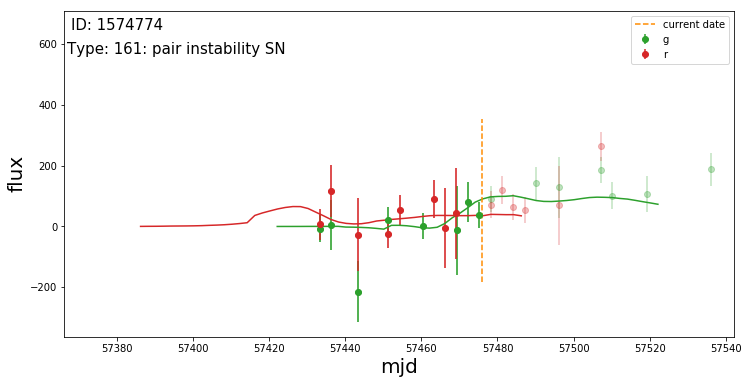

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57436.1512   g 456                 0 ...  101.13  28.82  19.294992 1617591
 57436.171   r 456                 0 ...   96.43  28.57  19.212067 1617591
57439.1502   r 456                 0 ...   90.68  28.54  19.218443 1617591
57439.1871   g 456                 0 ...  141.96  29.02  19.302567 1617591
57443.1454   g 456                 0 ...   34.62  28.33  19.318136 1617591
57453.1443   g 456                 0 ...   29.47  28.25  19.332462 1617591
57453.1489   r 456                 0 ...   45.71  28.53  19.244617 1617591
57456.1451   r 456                 0 ...   42.95  28.56  19.252056 1617591
57456.1625   g 456                 0 ...   33.44  28.33   19.34083 1617591
57460.1441   g 456                 0 ...   53.41  28.59   19.35462 1617591
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.4156   g 456       

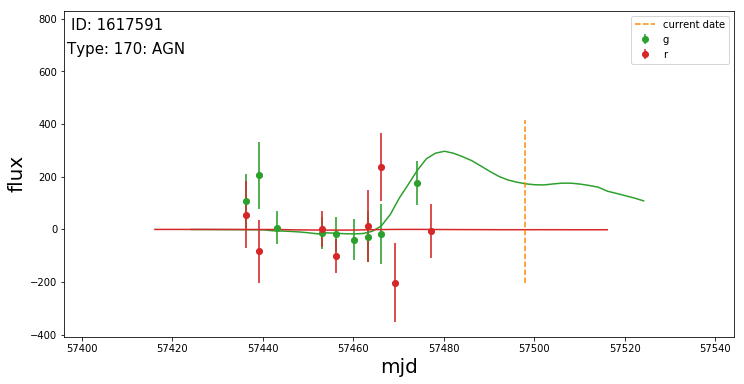

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.5517   g 638                 0 ...   36.83  28.41       99.0 1660957
57443.5594   g 638                 0 ...  135.34  28.97       99.0 1660957
57451.5328   g 638                 0 ...   40.05  28.41  24.461128 1660957
57455.5209   g 638                 0 ...   32.03  28.23  23.608364 1660957
57458.5404   g 638                 0 ...   29.43  28.24  23.161093 1660957
57462.5182   g 638                 0 ...    27.5  28.17  22.724955 1660957
57462.5283   r 638                 0 ...   41.52  28.57  22.772896 1660957
 57465.517   g 638                 0 ...   29.01  28.25  22.465563 1660957
57465.5289   r 638                 0 ...   42.13  28.53  22.503508 1660957
57469.5055   g 638                 0 ...  100.78  28.85  22.184265 1660957
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.1233   g 638       

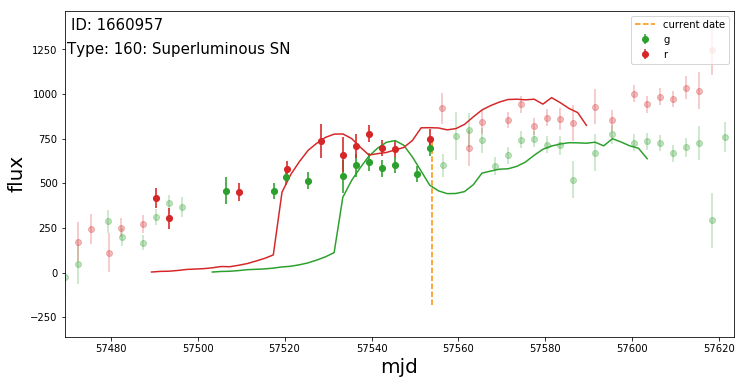

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1185   r 739                 0 ...   69.58  28.52    98.2963 1664233
57434.1351   g 739                 0 ...   67.25  28.66    98.2963 1664233
57437.1947   g 739                 0 ...  115.29  28.96    98.2963 1664233
 57440.121   g 739                 0 ...  131.93   29.0    98.2963 1664233
57443.1958   g 739                 0 ...   96.31  28.85    98.2963 1664233
57452.1388   g 739                 0 ...   33.84  28.37    98.2963 1664233
57455.1387   g 739                 0 ...   36.56  28.38    98.2963 1664233
57460.1397   g 739                 0 ...   58.44  28.67    98.2963 1664233
57463.1408   g 739                 0 ...   68.41  28.74    98.2963 1664233
57463.1608   r 739                 0 ...   73.71  28.52    98.2963 1664233
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.2989   r 739       

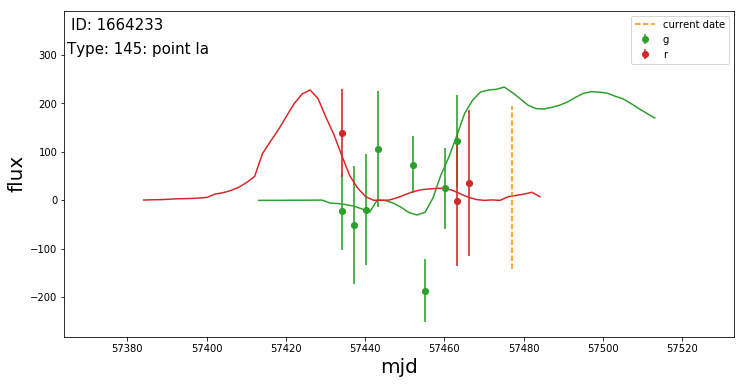

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57444.5272   r 726                 0 ...   67.85  28.49       99.0 1669616
57444.5554   g 726                 0 ...   98.49   28.8       99.0 1669616
57453.5277   g 726                 0 ...   30.85  28.26       99.0 1669616
57456.5187   g 726                 0 ...   29.03  28.23       99.0 1669616
57456.5282   r 726                 0 ...   38.26  28.52       99.0 1669616
57459.5126   r 726                 0 ...   39.05  28.54       99.0 1669616
57459.5355   g 726                 0 ...   25.29  28.11       99.0 1669616
57462.5172   g 726                 0 ...    25.1  28.12       99.0 1669616
57462.5337   r 726                 0 ...   40.64  28.62       99.0 1669616
57467.4891   g 726                 0 ...   50.66  28.49       99.0 1669616
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.1223   g 726       

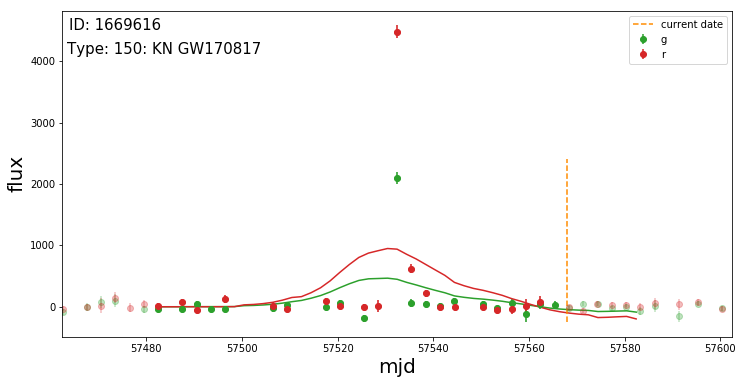

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.2618   r 859                 0 ...   63.59  28.56       99.0 1680687
57434.2965   g 859                 0 ...   52.65  28.55       99.0 1680687
57437.2573   r 859                 0 ...   84.43  28.55       99.0 1680687
57437.2747   g 859                 0 ...  104.51  28.88       99.0 1680687
57443.3035   g 859                 0 ...  136.92  29.02       99.0 1680687
57443.3222   r 859                 0 ...   83.82  28.57       99.0 1680687
57452.2641   g 859                 0 ...   31.43  28.31       99.0 1680687
57452.2807   r 859                 0 ...   46.64  28.57       99.0 1680687
57455.2635   r 859                 0 ...   46.71  28.57       99.0 1680687
 57455.287   g 859                 0 ...   31.49  28.32       99.0 1680687
       ... ...          ...      ... ...     ...    ...        ...     ...
 57687.472   g 859       

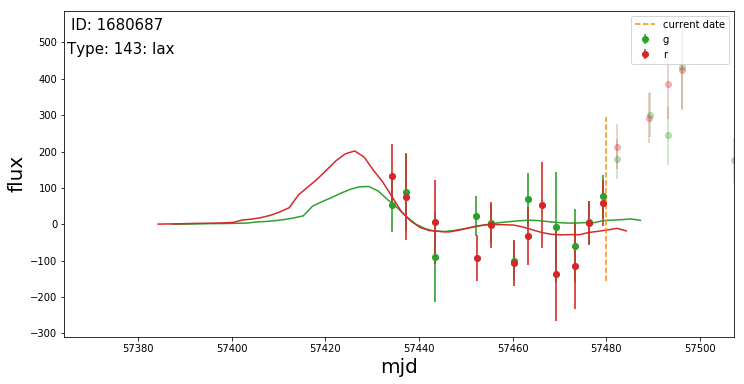

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.3581   g 570              4096 ...   26.62  28.17   20.71792 1689943
57436.2559   r 570                 0 ...    75.5   28.6  20.977478 1689943
57436.2948   g 570              6144 ...   77.23  28.66  20.623997 1689943
57444.2389   g 570              4096 ...   66.36  28.63  20.465586 1689943
57444.2992   r 570              4096 ...    76.8  28.52  20.805986 1689943
57451.2537   g 570              4096 ...   24.37  28.12  20.405602 1689943
 57451.273   r 570              4096 ...   38.95  28.55   20.74034 1689943
57454.2718   g 570              4096 ...   26.11  28.14  20.403206 1689943
57454.2942   r 570              4096 ...   43.02  28.55  20.736237 1689943
57460.2695   r 570              4096 ...   38.62  28.55   20.77075 1689943
       ... ...          ...      ... ...     ...    ...        ...     ...
57681.5252   r 570       

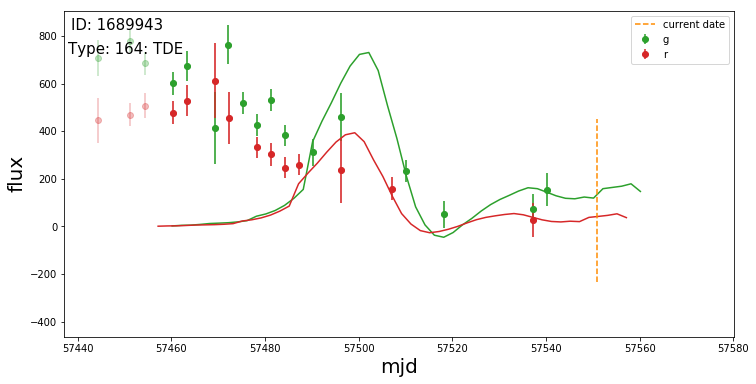

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1297   g 505                 0 ...   76.47  28.72  19.755558 1700700
57438.1458   g 505                 0 ...  127.22  28.99  19.752724 1700700
57443.1943   g 505                 0 ...  100.78   28.9   19.73548 1700700
57452.1425   g 505                 0 ...   36.04  28.42  19.744623 1700700
57456.1296   r 505                 0 ...    47.9  28.43  19.729889 1700700
57456.1513   g 505                 0 ...    45.2  28.49  19.740599 1700700
57462.1283   r 505                 0 ...   74.49  28.37  19.732016 1700700
57462.1495   g 505                 0 ...   99.17  28.86    19.7423 1700700
57467.1291   r 505                 0 ...  100.08  28.35  19.739359 1700700
57579.4832   r 505                 0 ...  120.48  28.54   19.82741 1700700
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.3722   g 505       

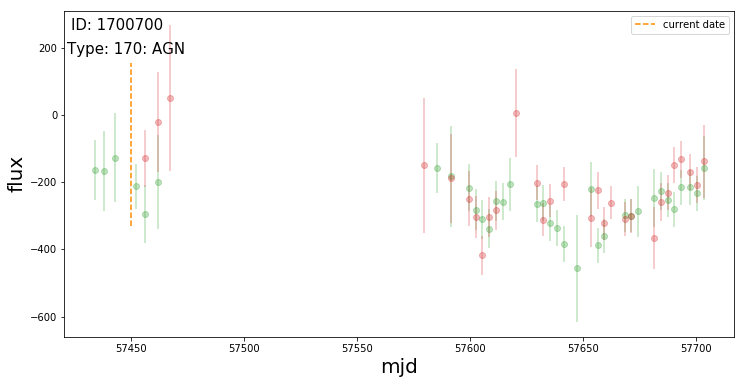

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57437.5233   g 586                 0 ...   31.31  28.32       99.0 1704073
57444.5229   r 586                 0 ...    70.7  28.53  22.005972 1704073
57444.5446   g 586                 0 ...   99.48  28.85  22.031168 1704073
57453.5248   g 586              4096 ...   30.09  28.27  19.984238 1704073
57456.5047   g 586              6144 ...   27.42  28.25  19.839125 1704073
57459.5202   r 586              4096 ...   38.34   28.6   19.99936 1704073
57459.5251   g 586              4096 ...   25.17  28.16  19.846987 1704073
57462.5236   r 586              4096 ...   39.69  28.58  20.033394 1704073
 57465.525   r 586              4096 ...   40.86  28.56   20.14322 1704073
57470.4398   r 586              4096 ...   95.29  28.57  20.440765 1704073
       ... ...          ...      ... ...     ...    ...        ...     ...
57630.1702   g 586       

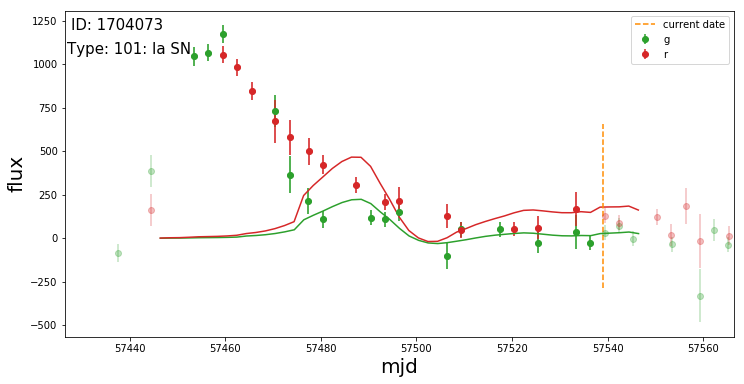

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.1781   r 704                 0 ...   53.21  28.51       99.0 1718715
57433.2656   g 704                 0 ...   48.45  28.51       99.0 1718715
57436.1914   r 704                 0 ...   89.45   28.5       99.0 1718715
57440.1132   g 704                 0 ...  112.25  28.83       99.0 1718715
  57443.14   g 704                 0 ...   29.78  28.18       99.0 1718715
57443.1551   r 704                 0 ...   43.98  28.51       99.0 1718715
57451.2054   g 704                 0 ...   25.28  28.19       99.0 1718715
57454.1821   r 704                 0 ...   38.83  28.59       99.0 1718715
57454.1967   g 704                 0 ...   25.89   28.2       99.0 1718715
57459.1827   g 704                 0 ...   30.67  28.27       99.0 1718715
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4331   r 704       

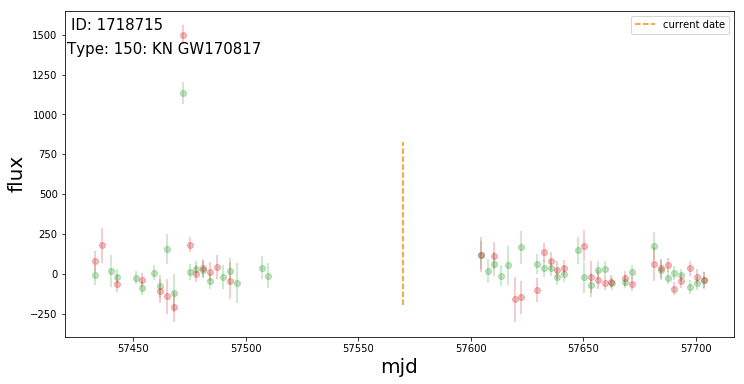

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5525   g 798                 0 ...   30.68  28.28  22.333452 1726608
57444.5368   r 798                 0 ...    68.7  28.48  21.222473 1726608
57444.5539   g 798                 0 ...  101.95  28.86  22.358679 1726608
57452.5406   g 798                 0 ...   32.15  28.29  21.472977 1726608
57455.5088   g 798                 0 ...    28.8  28.21  22.357191 1726608
57455.5385   r 798                 0 ...    39.9  28.55  21.221474 1726608
57459.5106   r 798                 0 ...   41.09   28.6   21.22104 1726608
 57459.534   g 798                 0 ...    27.1  28.19  22.355936 1726608
57467.4453   r 798                 0 ...   78.84  28.59  21.222473 1726608
 57467.493   g 798                 0 ...   52.02  28.53  22.358986 1726608
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.1156   g 798       

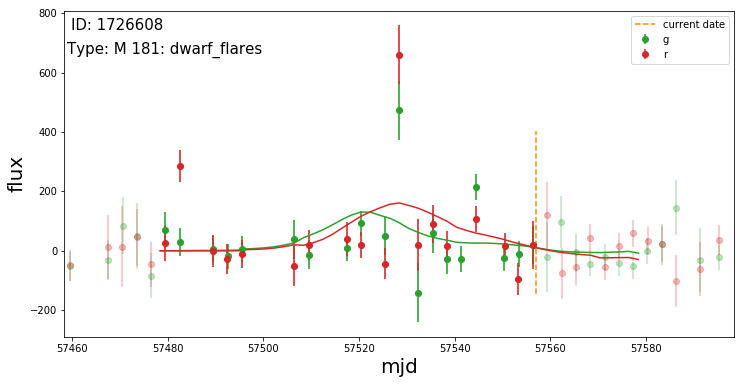

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5508   g 636                 0 ...   30.55  28.31  99.401215 1763311
57439.5469   g 636                 0 ...   65.44  28.64  99.401215 1763311
 57443.527   r 636                 0 ...   76.85   28.6  99.401215 1763311
57451.5319   g 636                 0 ...   37.67  28.32  99.401215 1763311
57454.5059   r 636                 0 ...   41.48  28.58  99.401215 1763311
  57454.54   g 636                 0 ...   26.79  28.12  99.401215 1763311
57458.5414   g 636                 0 ...   25.96  28.17  99.401215 1763311
57461.5042   g 636                 0 ...   24.47  28.12  99.401215 1763311
57465.5184   g 636                 0 ...   25.49  28.17  99.401215 1763311
57465.5279   r 636                 0 ...   40.73  28.58  99.401215 1763311
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.1022   r 636       

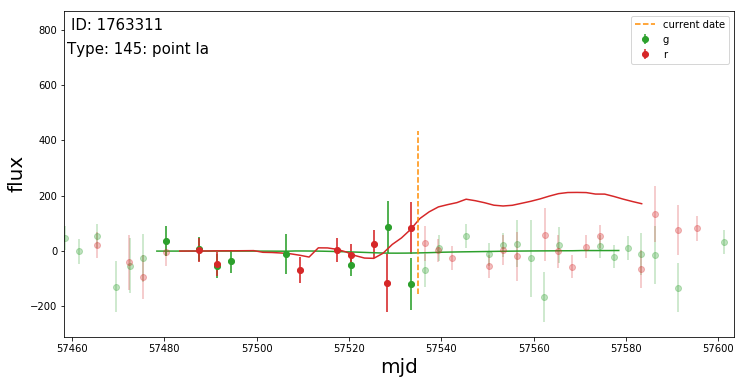

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
  57433.44   g 628                 0 ...    24.5  28.16       99.0 1763514
57433.4637   r 628                 0 ...   37.45  28.56       99.0 1763514
57436.4564   r 628                 0 ...   48.58  28.54   23.85429 1763514
 57436.482   g 628                 0 ...    24.2  28.09  23.543217 1763514
57439.4222   r 628                 0 ...   91.93  28.58  23.114864 1763514
57439.4812   g 628                 0 ...  100.36  28.76    22.8428 1763514
57443.3979   g 628                 0 ...  137.78  29.01  22.283125 1763514
57451.4366   r 628                 0 ...   36.53  28.53  21.799845 1763514
57454.3777   g 628                 0 ...   25.45  28.18  21.534452 1763514
57454.4377   r 628                 0 ...   36.51  28.52   21.63141 1763514
       ... ...          ...      ... ...     ...    ...        ...     ...
57560.1929   r 628       

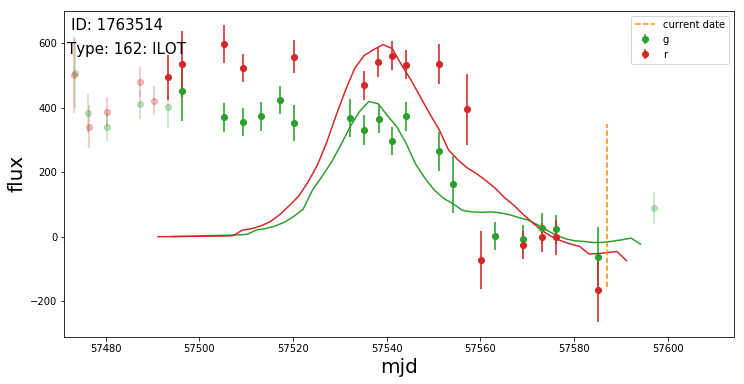

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5578   g 795              4096 ...   25.92  28.19   16.99931 1885241
57437.5368   g 795              6144 ...   28.21  28.24   17.11056 1885241
57443.5352   r 795              4096 ...   75.12   28.6  16.747972 1885241
57443.5552   g 795              4096 ...  115.66  28.89  17.027079 1885241
57451.5108   r 795              4096 ...   42.57  28.62  16.836094 1885241
57451.5408   g 795              4096 ...   32.67  28.28  17.093145 1885241
57454.4952   r 795              4096 ...    38.8  28.63  16.279333 1885241
57454.5269   g 795              4096 ...   25.13  28.17  16.404081 1885241
57458.4956   r 795              4096 ...   37.91  28.62  16.457724 1885241
57458.5085   g 795              4096 ...   24.53  28.16  16.618567 1885241
       ... ...          ...      ... ...     ...    ...        ...     ...
57658.1401   g 795       

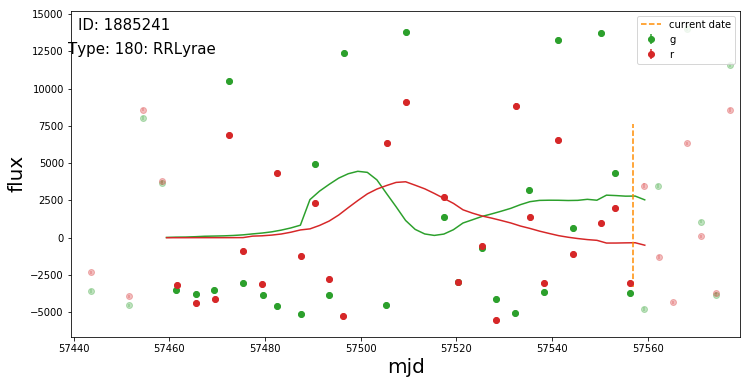

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.3985   r 671                 0 ...   37.98  28.52  21.535873 1906935
57433.4376   g 671                 0 ...   22.28  28.05  22.277409 1906935
57436.3745   r 671                 0 ...   63.74  28.52  21.527111 1906935
57439.2914   g 671                 0 ...  169.13  29.09  22.292692 1906935
57439.3584   r 671                 0 ...  111.38  28.52  21.519466 1906935
57444.3387   g 671                 0 ...   96.45  28.77  22.308878 1906935
57444.3901   r 671                 0 ...   84.65  28.48  21.508999 1906935
57451.3009   g 671                 0 ...   25.01  28.16   22.33517 1906935
57451.3387   r 671              4096 ...   38.08  28.53  21.498985 1906935
57454.2885   g 671                 0 ...   26.08  28.19   22.34776 1906935
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.5128   r 671       

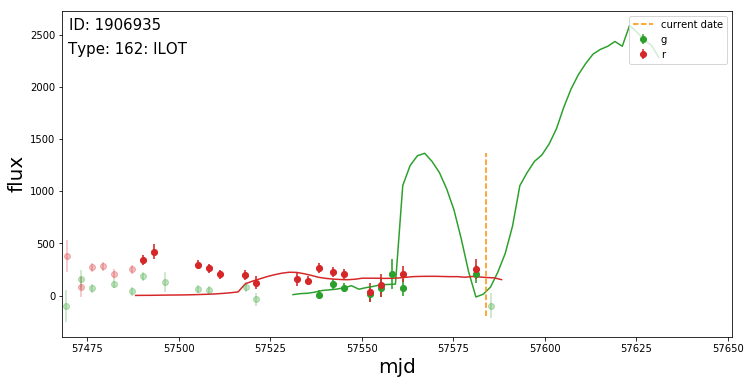

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.3758   r 421              4096 ...   48.91  28.62  21.303247 1913781
57437.3387   g 421                 0 ...  102.75  28.87  20.900127 1913781
57437.3758   r 421                 0 ...   76.33   28.6   21.23796 1913781
57452.2974   g 421              6144 ...   31.93  28.31   20.88314 1913781
57455.2987   r 421                 0 ...   44.73  28.53  21.249552 1913781
57455.3166   g 421              4096 ...    31.3  28.33  20.928152 1913781
57460.3361   r 421              4096 ...   43.53  28.59  21.353758 1913781
57463.3334   r 421                 0 ...   52.24  28.58  21.433725 1913781
57467.2949   r 421                 0 ...  115.67  28.59  21.558796 1913781
57473.2542   g 421                 0 ...  121.55  28.92  21.449347 1913781
       ... ...          ...      ... ...     ...    ...        ...     ...
57495.2328   r 421       

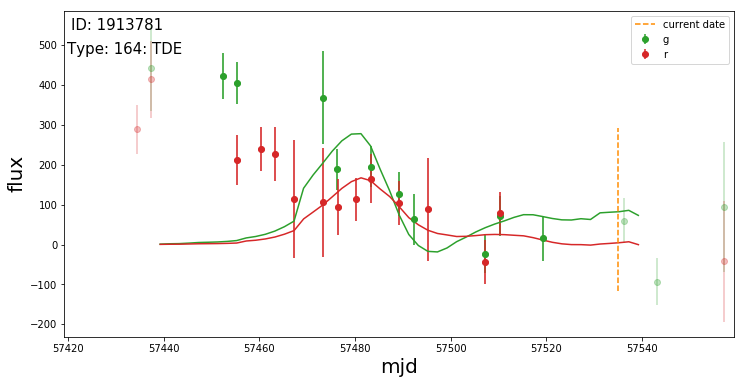

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5489   g 635              4096 ...   27.67   28.2  21.107687 1927153
57437.5238   g 635              6144 ...   31.08  28.31  20.788073 1927153
 57444.547   g 635              4096 ...   95.74  28.82  20.633259 1927153
57451.5261   g 635              4096 ...   37.94  28.38  20.897333 1927153
57451.5453   r 635              4096 ...   58.53  28.57  20.663363 1927153
57454.5036   r 635              4096 ...   38.24  28.51  20.773142 1927153
57454.5414   g 635              4096 ...   26.27  28.16  21.089401 1927153
57458.4851   r 635              4096 ...   37.93  28.54  20.963694 1927153
57461.5038   g 635              4096 ...   24.01  28.16  21.724682 1927153
57465.5189   g 635                 0 ...   24.49  28.12  22.147573 1927153
       ... ...          ...      ... ...     ...    ...        ...     ...
57664.1234   r 635       

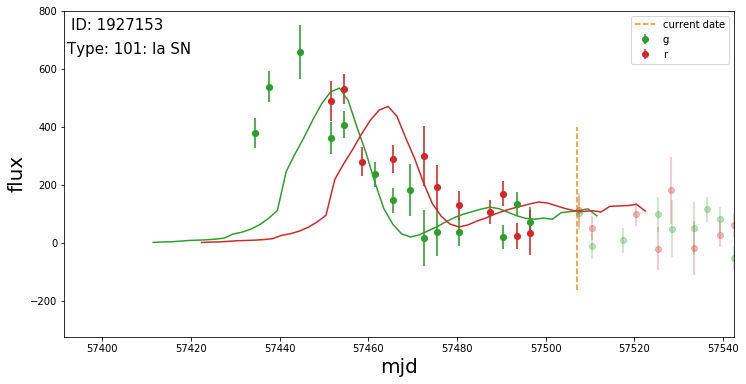

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57436.1528   g 508                 0 ...   94.58  28.75  17.815424 1935931
57439.1262   r 508              4096 ...   88.87   28.6  17.852661 1935931
57439.1862   g 508              6144 ...  138.61  29.05  17.241234 1935931
57444.1441   g 508                 0 ...   28.46  28.21   17.76958 1935931
57452.1449   g 508              4096 ...   28.57  28.27  18.146223 1935931
57456.1442   r 508              4096 ...   44.28  28.66  17.644506 1935931
57456.1616   g 508              4096 ...   32.82  28.36  18.020111 1935931
57463.1318   g 508              4096 ...   71.59  28.69   17.52701 1935931
57463.1519   r 508              4096 ...    82.9  28.52  17.386703 1935931
57466.1268   r 508              4096 ...   76.65  28.42   17.37999 1935931
       ... ...          ...      ... ...     ...    ...        ...     ...
 57684.416   g 508       

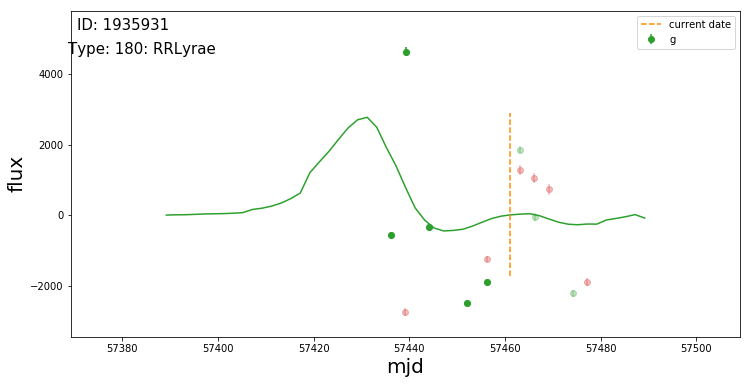

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57454.508   r 827                 0 ...   43.72   28.6  20.373587 1971885
57454.5332   g 827                 0 ...   30.31  28.26  21.506496 1971885
57462.5152   g 827                 0 ...   28.38  28.22  21.508678 1971885
57462.5362   r 827                 0 ...    43.6   28.6  20.360569 1971885
57467.4316   g 827                 0 ...   97.95  28.86  21.508482 1971885
57467.5319   r 827                 0 ...   51.25  28.58  20.374254 1971885
57470.4725   r 827                 0 ...   98.15  28.55  20.373707 1971885
57470.5137   g 827                 0 ...  120.85  28.95   21.50814 1971885
57473.5146   r 827                 0 ...   75.24  28.57   20.37363 1971885
57473.5281   g 827                 0 ...  139.96  28.99  21.507504 1971885
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.1161   g 827       

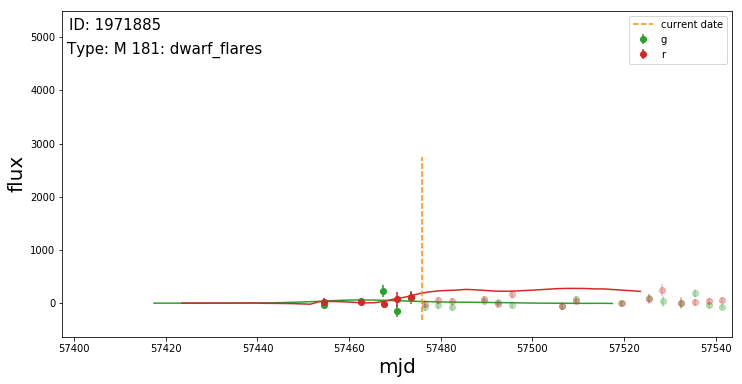

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1292   g 452                 0 ...   81.55  28.76       99.0 1984895
57438.1293   g 452                 0 ...  135.22  28.98       99.0 1984895
57444.1296   g 452                 0 ...    38.9  28.39       99.0 1984895
57453.1327   g 452                 0 ...    41.8  28.43       99.0 1984895
57461.1303   g 452                 0 ...   79.29  28.76       99.0 1984895
57589.4409   r 452                 0 ...  125.83  28.56  20.859188 1984895
57592.4834   g 452                 0 ...  126.97  28.99  22.085388 1984895
57599.4645   g 452                 0 ...   40.68  28.44  22.236929 1984895
57599.4823   r 452              4096 ...    57.2  28.57  21.047318 1984895
57602.4631   g 452                 0 ...    32.5  28.31  22.309278 1984895
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.3727   g 452       

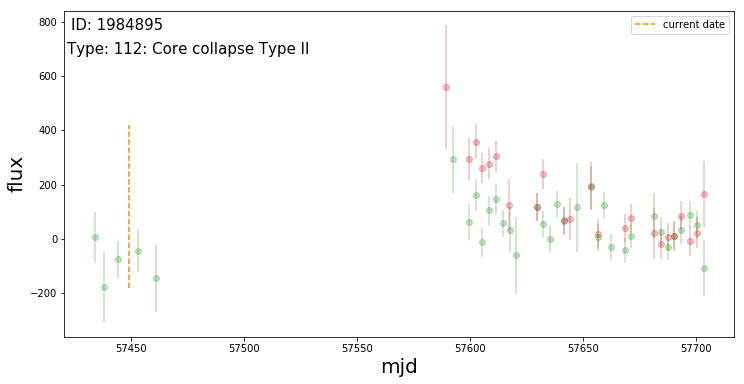

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.1242   g 400                 0 ...   99.95  28.95       99.0 1996364
57438.1303   g 400                 0 ...  152.86  29.08       99.0 1996364
57577.4385   r 400                 0 ...   55.82  28.55  25.927366 1996364
57577.4609   g 400                 0 ...   44.91  28.58  25.176949 1996364
57585.4641   g 400                 0 ...   36.53  28.41  21.785763 1996364
57589.4386   r 400                 0 ...   116.2  28.54  21.405552 1996364
57592.4386   r 400                 0 ...  105.43  28.56  21.160013 1996364
57592.4815   g 400                 0 ...  129.23  28.98  21.144424 1996364
57597.4607   r 400                 0 ...   61.68  28.54  20.991627 1996364
57597.4839   g 400                 0 ...   65.23  28.66   21.17491 1996364
       ... ...          ...      ... ...     ...    ...        ...     ...
57685.3148   r 400       

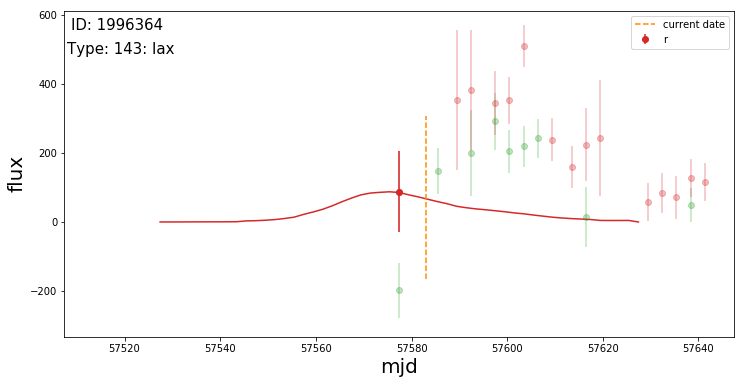

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57453.3981   g 325                 0 ...   39.37   28.5  18.734602 2014741
 57453.419   r 325              4096 ...   45.91  28.49   17.76206 2014741
57456.3758   g 325              6144 ...   40.37  28.53  18.736128 2014741
57456.4182   r 325              4096 ...   48.57  28.57  17.763597 2014741
57477.3899   r 325              4096 ...   68.77  28.49  17.770947 2014741
57477.3983   g 325              4096 ...    61.6  28.62  18.742498 2014741
57481.3151   g 325                 0 ...   39.84  28.48  18.743193 2014741
 57481.356   r 325              4096 ...   47.01  28.55  17.771648 2014741
57491.3133   r 325              4096 ...    50.3   28.5  17.773048 2014741
 57495.272   g 325                 0 ...   93.64  28.92  18.745035 2014741
57495.3131   r 325              4096 ...   77.78  28.55  17.773417 2014741
57511.3124   g 325       

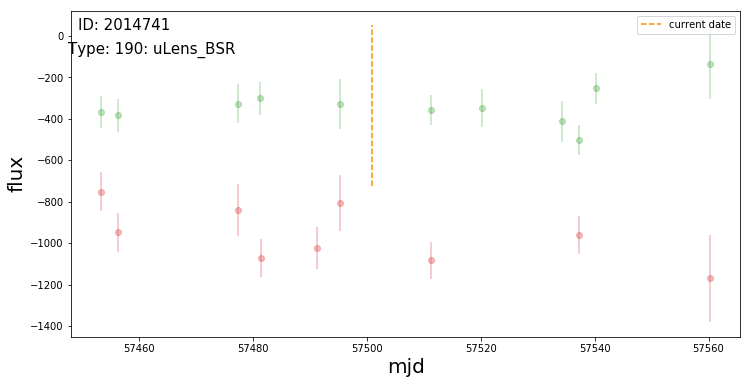

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5258   r 722                 0 ...   38.65   28.6       99.0 2039937
57434.5545   g 722                 0 ...   24.28  28.11       99.0 2039937
57437.5305   g 722                 0 ...   27.82  28.19       99.0 2039937
57437.5512   r 722                 0 ...    41.7  28.54       99.0 2039937
57443.4444   g 722                 0 ...  117.71  28.94       99.0 2039937
57443.5088   r 722                 0 ...   76.22  28.56       99.0 2039937
57451.5123   r 722                 0 ...   40.34  28.54       99.0 2039937
57451.5364   g 722                 0 ...   30.69   28.2       99.0 2039937
57454.4909   r 722                 0 ...   36.06  28.56       99.0 2039937
57454.5297   g 722                 0 ...   23.85  28.08       99.0 2039937
       ... ...          ...      ... ...     ...    ...        ...     ...
57637.1305   r 722       

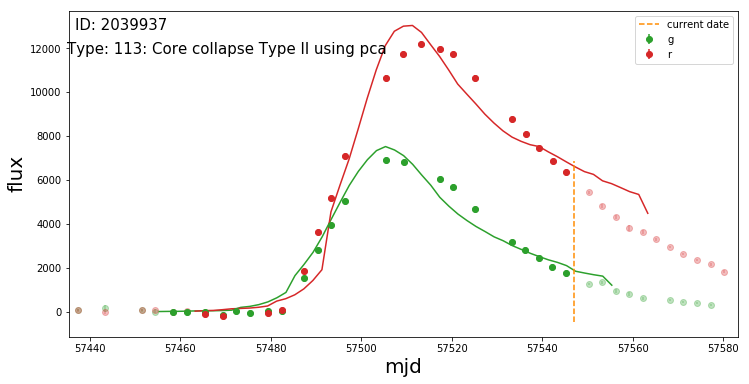

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.5485   g 676                 0 ...   23.04  28.06   99.58165 2057221
57436.4756   r 676                 0 ...   40.01  28.55   99.58165 2057221
57436.4845   g 676                 0 ...    24.0   28.1   99.58165 2057221
57439.4414   r 676                 0 ...    86.2  28.58   99.58165 2057221
57439.5616   g 676                 0 ...   47.56  28.42   99.58165 2057221
57443.4198   g 676                 0 ...  127.89  28.96   99.58165 2057221
57443.4784   r 676                 0 ...   86.54  28.49   99.58165 2057221
57451.4164   g 676                 0 ...   24.07  28.13   99.58165 2057221
57451.4435   r 676                 0 ...   35.73  28.54   99.58165 2057221
57454.4209   r 676                 0 ...   36.79  28.56   99.58165 2057221
       ... ...          ...      ... ...     ...    ...        ...     ...
57569.2059   r 676       

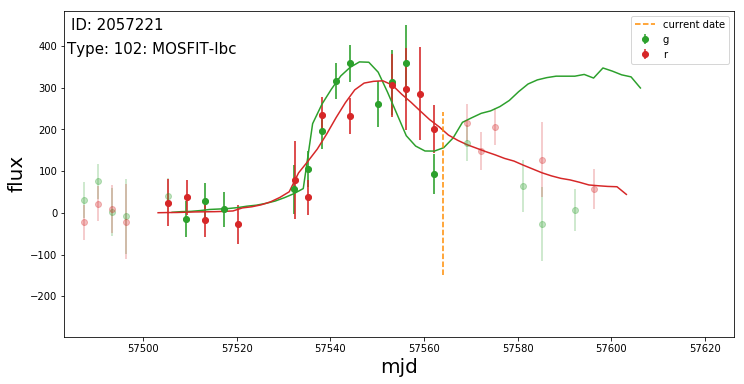

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.5435   g 480              4096 ...   28.83  28.19  16.665499 2109625
57438.5023   r 480                 0 ...   60.17  28.55  16.988398 2109625
 57444.459   g 480              6144 ...  125.42  29.01  17.840107 2109625
57444.5005   r 480              4096 ...   91.07  28.51  17.379889 2109625
57452.4609   g 480              4096 ...   27.07  28.22   17.82474 2109625
57452.5018   r 480              4096 ...    40.5   28.5    17.4121 2109625
57455.4395   g 480              4096 ...   28.37  28.27  17.104307 2109625
57455.4797   r 480              4096 ...   38.22  28.52  16.484713 2109625
57458.4395   r 480              4096 ...    41.5  28.59  16.929117 2109625
 57458.502   g 480              4096 ...    25.9  28.14  17.464544 2109625
       ... ...          ...      ... ...     ...    ...        ...     ...
57555.2498   r 480       

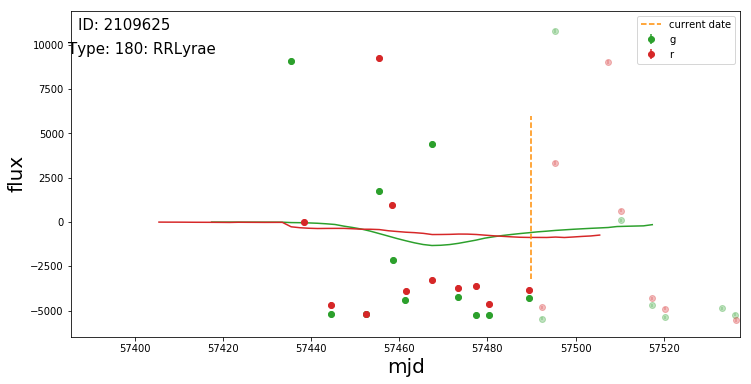

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5377   r 824                 0 ...   40.14  28.54       99.0 2136012
57434.5597   g 824                 0 ...   27.05  28.17       99.0 2136012
57437.4928   g 824                 0 ...   46.18  28.49       99.0 2136012
57443.4506   g 824                 0 ...  119.76  28.92       99.0 2136012
57443.4962   r 824                 0 ...   76.17  28.55       99.0 2136012
57452.4728   g 824                 0 ...   27.01  28.21       99.0 2136012
57452.5142   r 824                 0 ...   39.37  28.51       99.0 2136012
57455.4507   g 824                 0 ...   28.07  28.25       99.0 2136012
57455.5342   r 824                 0 ...   37.45   28.5       99.0 2136012
57459.4745   g 824                 0 ...   26.05  28.17       99.0 2136012
       ... ...          ...      ... ...     ...    ...        ...     ...
 57661.197   g 824       

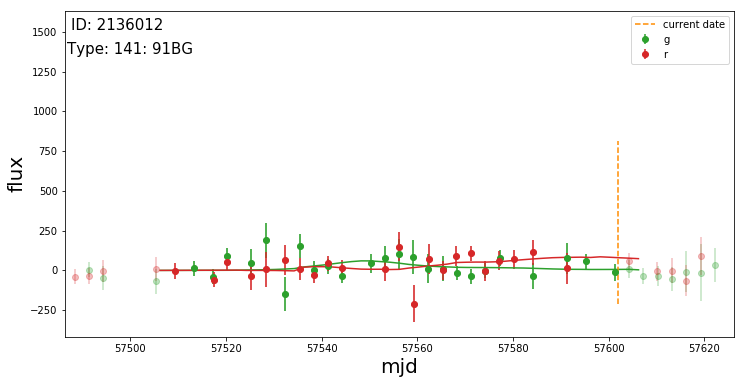

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.3051   g 467                 0 ...   46.51  28.41   98.64062 2143210
57437.2779   g 467                 0 ...  111.55  28.85   98.64062 2143210
57437.3058   r 467                 0 ...   96.77  28.47   98.64062 2143210
57444.2404   g 467                 0 ...   68.25  28.64   98.64062 2143210
57444.2983   r 467                 0 ...   79.87  28.48   98.64062 2143210
57452.2577   g 467                 0 ...    26.1  28.14  22.077871 2143210
57452.2885   r 467                 0 ...   41.14   28.5  22.360996 2143210
57455.2693   r 467              4096 ...   41.39   28.5  21.319563 2143210
57455.2896   g 467                 0 ...   27.01  28.17  21.505043 2143210
 57459.272   r 467              6144 ...   39.98   28.5  20.925608 2143210
       ... ...          ...      ... ...     ...    ...        ...     ...
57681.5238   r 467       

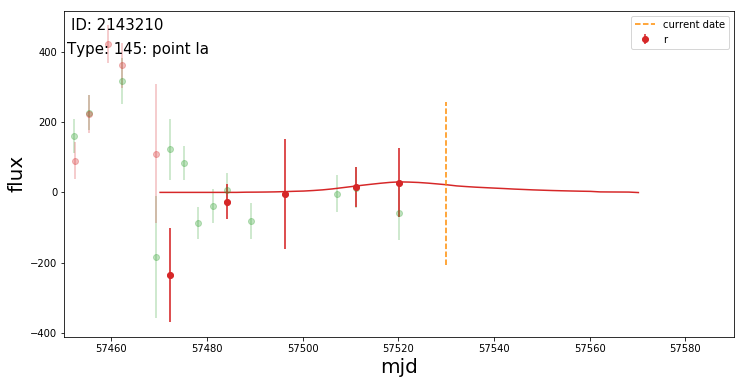

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57434.323   r 862                 0 ...   59.41  28.47       99.0 2163410
57434.4303   g 862                 0 ...   30.89  28.31       99.0 2163410
57437.2972   r 862                 0 ...   81.57  28.51       99.0 2163410
57437.3443   g 862                 0 ...  105.87   28.9       99.0 2163410
 57443.348   r 862                 0 ...   85.59   28.5       99.0 2163410
57443.4061   g 862                 0 ...  128.45   29.0       99.0 2163410
57452.3039   g 862                 0 ...   33.51  28.35       99.0 2163410
57455.3047   r 862                 0 ...   46.16  28.53       99.0 2163410
57455.3246   g 862                 0 ...   31.92  28.29       99.0 2163410
57460.3208   g 862                 0 ...   30.46  28.26       99.0 2163410
       ... ...          ...      ... ...     ...    ...        ...     ...
 57585.199   r 862       

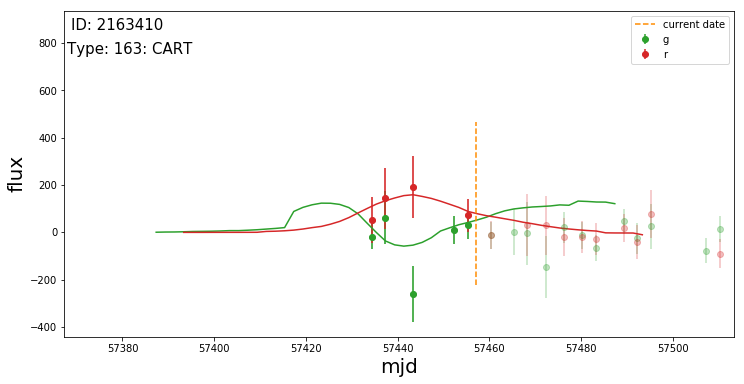

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.3353   r 521                 0 ...   44.44   28.6  28.585272 2233161
57436.3335   g 521                 0 ...   73.59  28.67  23.987251 2233161
57436.3354   r 521                 0 ...   73.72  28.58  25.485931 2233161
57439.2723   g 521                 0 ...  173.62  29.08  22.939678 2233161
57439.3132   r 521                 0 ...  147.37  28.58  23.498243 2233161
57444.2838   g 521                 0 ...    91.0   28.8   22.10063 2233161
57444.3007   r 521                 0 ...   91.21  28.59  22.178082 2233161
 57451.275   r 521                 0 ...   41.49  28.62  21.535007 2233161
57451.2941   g 521                 0 ...   25.82  28.18  21.560152 2233161
 57454.313   r 521              4096 ...   43.38  28.59  21.392357 2233161
       ... ...          ...      ... ...     ...    ...        ...     ...
57553.1866   g 521       

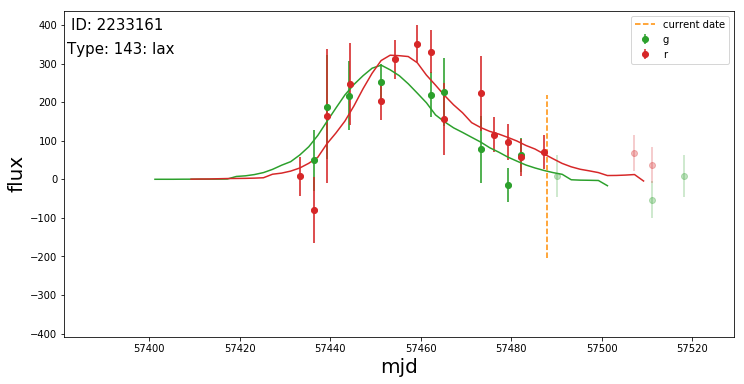

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.5026   r 630                 0 ...   36.97  28.56       99.0 2252908
 57433.546   g 630                 0 ...   23.81  28.08       99.0 2252908
57436.5031   g 630                 0 ...   24.37  28.11       99.0 2252908
57436.5235   r 630                 0 ...   36.43  28.53       99.0 2252908
57443.4392   g 630                 0 ...   129.1  28.98       99.0 2252908
57451.4402   r 630                 0 ...   37.46  28.59       99.0 2252908
57451.4623   g 630                 0 ...   25.74  28.14       99.0 2252908
57454.4204   r 630                 0 ...   38.38  28.61       99.0 2252908
57454.4417   g 630                 0 ...   24.26  28.12       99.0 2252908
 57458.441   r 630                 0 ...   36.85  28.55       99.0 2252908
       ... ...          ...      ... ...     ...    ...        ...     ...
57568.1902   g 630       

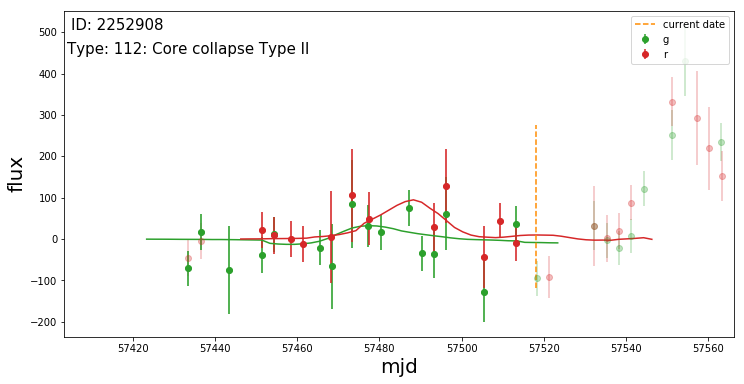

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57533.4629   r 441                 0 ...  101.49  28.56       99.0 2262887
57537.4422   r 441                 0 ...   74.44  28.61       99.0 2262887
57537.4612   g 441                 0 ...   68.56  28.67       99.0 2262887
57540.4393   r 441                 0 ...   48.51  28.59       99.0 2262887
57540.4639   g 441                 0 ...   36.62  28.34       99.0 2262887
57543.4626   r 441                 0 ...   43.48   28.5       99.0 2262887
57546.4277   g 441                 0 ...   30.91  28.31       99.0 2262887
57546.4628   r 441                 0 ...   45.65  28.62       99.0 2262887
57551.4395   g 441                 0 ...   28.21  28.21       99.0 2262887
57551.4603   r 441                 0 ...   46.93   28.6       99.0 2262887
       ... ...          ...      ... ...     ...    ...        ...     ...
57671.1478   r 441       

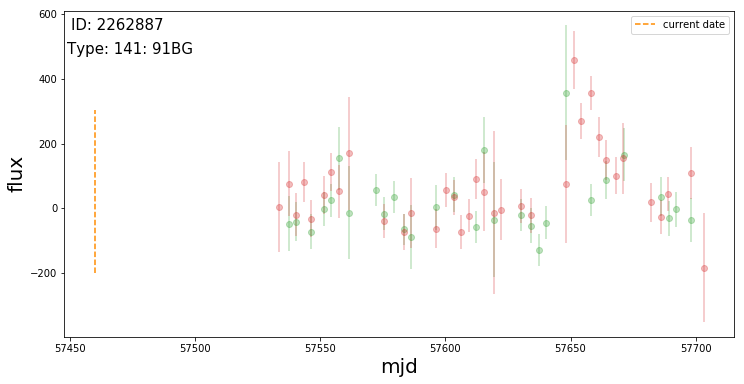

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4874   g 719                 0 ...   22.96  28.08       99.0 2289833
57433.5142   r 719                 0 ...   35.84  28.52       99.0 2289833
57436.4941   g 719                 0 ...   23.72  28.09       99.0 2289833
 57436.527   r 719                 0 ...   35.86  28.52       99.0 2289833
57439.4419   r 719                 0 ...   86.24  28.57       99.0 2289833
 57439.561   g 719                 0 ...   47.71  28.43       99.0 2289833
57443.4203   g 719                 0 ...  124.08  28.94       99.0 2289833
57443.4924   r 719                 0 ...   79.75  28.49       99.0 2289833
57451.3996   g 719                 0 ...   24.43  28.16       99.0 2289833
57451.4488   r 719                 0 ...   35.73  28.53       99.0 2289833
       ... ...          ...      ... ...     ...    ...        ...     ...
57575.2285   r 719       

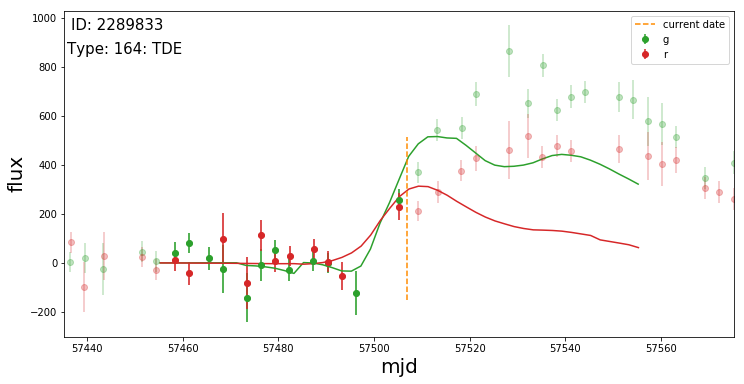

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57558.4604   g 290              4096 ...  112.74  28.99  20.119312 2303451
57565.4813   g 290                 0 ...  265.92  29.37  19.980476 2303451
57568.4809   r 290              6144 ...  124.27  28.46  19.439304 2303451
57573.4181   r 290              4096 ...   51.78  28.54  19.440159 2303451
 57573.439   g 290              4096 ...   38.96  28.44  20.116703 2303451
57585.3771   g 290                 0 ...   74.26  28.76  20.676943 2303451
57596.3976   g 290                 0 ...   60.51  28.64  21.371689 2303451
 57596.418   r 290              4096 ...   62.09  28.48     20.108 2303451
57601.3755   r 290              4096 ...   49.64  28.48  20.309795 2303451
57601.4183   g 290                 0 ...   40.41  28.43  21.702686 2303451
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.1686   g 290       

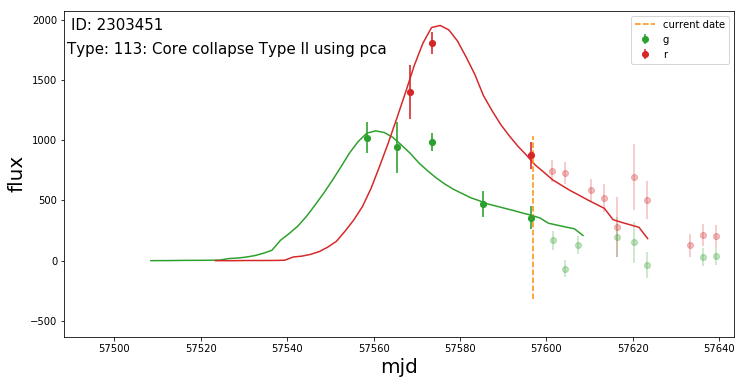

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2502   g 361                 0 ...   47.26   28.5       99.0 2417381
57433.2721   r 361                 0 ...   54.85  28.57       99.0 2417381
57436.2299   g 361                 0 ...  104.41  28.89       99.0 2417381
57436.2512   r 361                 0 ...   91.37  28.55       99.0 2417381
57439.2934   r 361                 0 ...  152.93  28.51       99.0 2417381
57443.2713   r 361                 0 ...   91.59  28.48       99.0 2417381
57452.1702   g 361                 0 ...   33.23  28.35       99.0 2417381
57452.2098   r 361                 0 ...   47.37  28.57       99.0 2417381
57455.1884   r 361                 0 ...   44.07  28.57       99.0 2417381
 57455.228   g 361                 0 ...   32.28  28.35       99.0 2417381
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.5005   g 361       

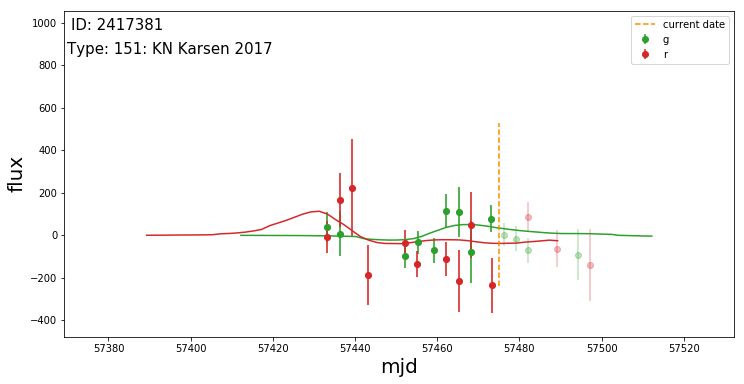

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57532.464   r 692                 0 ...    79.3  28.56       99.0 2421809
57536.4486   g 692                 0 ...   59.53  28.56       99.0 2421809
57536.4768   r 692                 0 ...   63.25  28.43       99.0 2421809
 57539.469   g 692                 0 ...   44.55  28.46       99.0 2421809
57542.4462   g 692                 0 ...   31.56  28.28       99.0 2421809
57542.4672   r 692                 0 ...   44.21  28.56       99.0 2421809
57545.4542   g 692                 0 ...   29.71  28.27       99.0 2421809
57551.4434   g 692              4096 ...   26.65   28.2  21.163322 2421809
57551.4778   r 692                 0 ...   42.66  28.61  21.555946 2421809
57554.4476   g 692              6144 ...   26.08  28.16  20.440722 2421809
       ... ...          ...      ... ...     ...    ...        ...     ...
57683.2274   g 692       

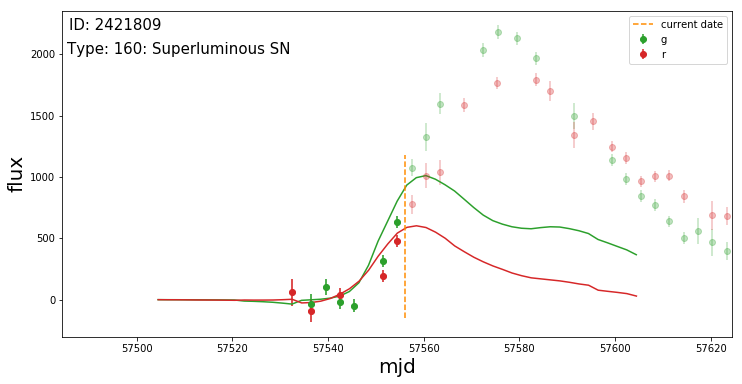

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57435.557   g 825                 0 ...   29.73  28.25   98.16476 2449518
57439.4089   g 825                 0 ...  233.68  29.32   98.16476 2449518
57443.5142   r 825                 0 ...    76.5  28.59   98.16476 2449518
57443.5547   g 825                 0 ...  122.67  28.91   98.16476 2449518
57451.5152   r 825                 0 ...   42.79  28.56   98.16476 2449518
57451.5354   g 825                 0 ...    34.1  28.29   98.16476 2449518
57454.5099   r 825                 0 ...   39.81  28.56   98.16476 2449518
57454.5254   g 825                 0 ...   26.87  28.18   98.16476 2449518
57460.4941   r 825                 0 ...   38.83  28.56   98.16476 2449518
57460.5151   g 825                 0 ...   25.24  28.15   98.16476 2449518
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.0932   r 825       

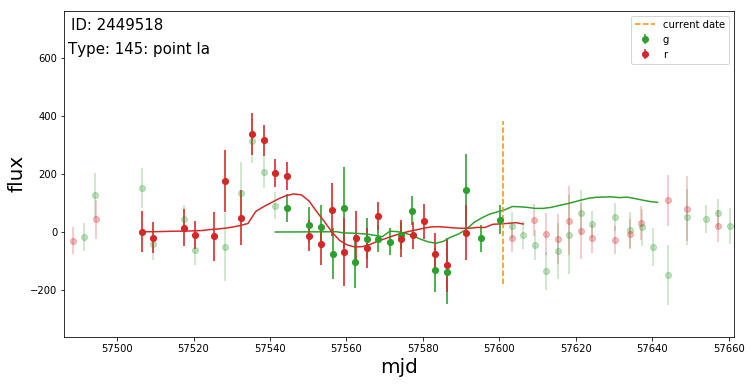

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57455.5225   r 434                 0 ...   43.71  28.53  19.270655 2469582
57455.5432   g 434                 0 ...  148.26  29.06    19.2428 2469582
57471.4813   r 434                 0 ...   89.07   28.5   19.28673 2469582
57471.5019   g 434                 0 ...  154.08  29.07   19.26158 2469582
57474.5018   r 434                 0 ...   92.33  28.51  19.290497 2469582
57474.5229   g 434                 0 ...  131.85  29.01   19.26476 2469582
57481.5024   g 434                 0 ...   40.06  28.44  19.258581 2469582
57488.4593   r 434                 0 ...   40.99  28.55  19.266497 2469582
57488.4804   g 434                 0 ...    28.5  28.28  19.238327 2469582
  57491.48   g 434              4096 ...   29.94   28.3  19.237253 2469582
       ... ...          ...      ... ...     ...    ...        ...     ...
57607.1881   g 434       

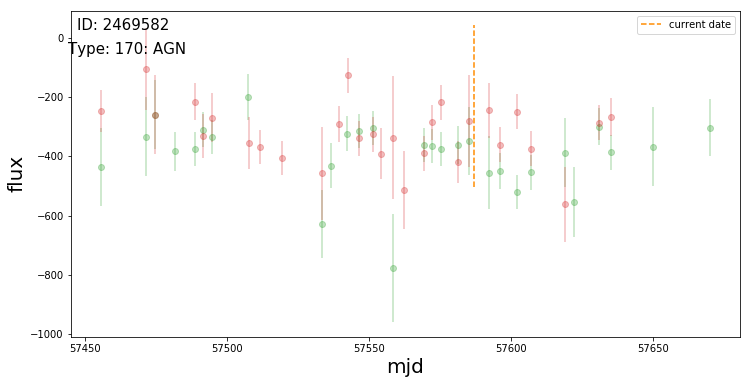

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2828   r 750              4096 ...   47.52  28.55  16.980984 2474628
 57433.364   g 750              6144 ...    26.8  28.19  17.409258 2474628
57436.2608   r 750              4096 ...   71.49  28.55  16.929089 2474628
57436.3022   g 750              4096 ...   76.42  28.65  17.432093 2474628
57439.2584   g 750              4096 ...  157.25  29.01  17.112669 2474628
57439.3071   r 750                 0 ...  126.11  28.52   16.80207 2474628
57443.2939   g 750              4096 ...  114.86  28.85  17.438673 2474628
57451.2399   r 750              4096 ...   38.25  28.55  16.670448 2474628
57451.2593   g 750              4096 ...   23.58   28.1  17.040127 2474628
57454.2617   g 750              4096 ...   24.04  28.11   17.41783 2474628
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.5296   r 750       

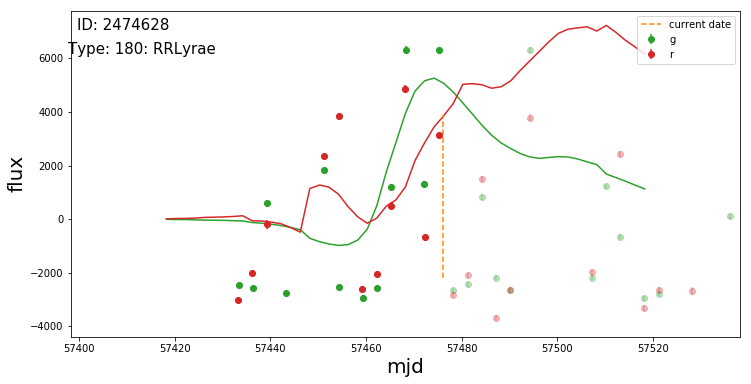

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5519   g 866                 0 ...   38.51  28.45   99.27243 2484891
57471.5114   g 866                 0 ...  179.41  29.17   99.27243 2484891
57474.4124   g 866                 0 ...  108.43  28.94   99.27243 2484891
57474.4659   r 866                 0 ...   75.62   28.5   99.27243 2484891
57477.4082   g 866                 0 ...    58.4  28.64   99.27243 2484891
57477.5123   r 866                 0 ...   61.37  28.52   99.27243 2484891
57480.5143   r 866                 0 ...   47.84  28.51   99.27243 2484891
57480.5265   g 866                 0 ...  156.74  29.06   99.27243 2484891
57489.4285   g 866                 0 ...   32.95  28.33   99.27243 2484891
57489.5134   r 866                 0 ...   49.37  28.48   99.27243 2484891
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.2592   r 866       

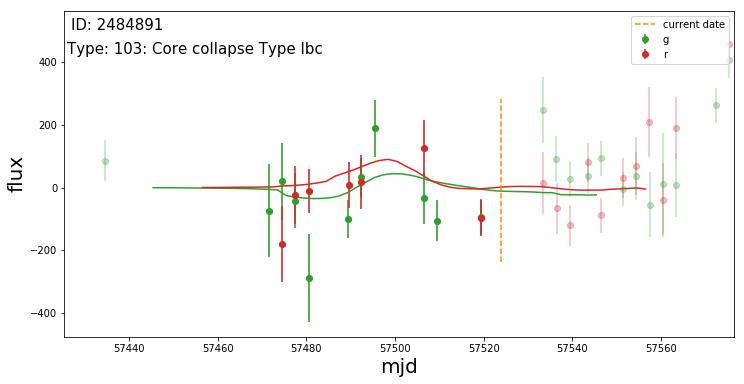

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.3975   r 423              4096 ...   43.29  28.53  20.777708 2488938
57437.4175   r 423              6144 ...   73.68  28.59  20.581886 2488938
57437.4401   g 423              4096 ...   72.52  28.69  21.023571 2488938
57452.3764   g 423              4096 ...   28.66  28.27  21.124393 2488938
57455.3317   g 423                 0 ...   31.94   28.3  21.248152 2488938
57460.3989   r 423              4096 ...   42.48   28.6   20.53375 2488938
 57463.377   g 423                 0 ...   31.22  28.29  21.691227 2488938
 57466.334   r 423              4096 ...   79.29   28.6  20.740704 2488938
57469.2912   g 423                 0 ...  295.26  29.39  22.079836 2488938
 57469.335   r 423                 0 ...  164.47  28.58  20.860136 2488938
       ... ...          ...      ... ...     ...    ...        ...     ...
57533.2102   r 423       

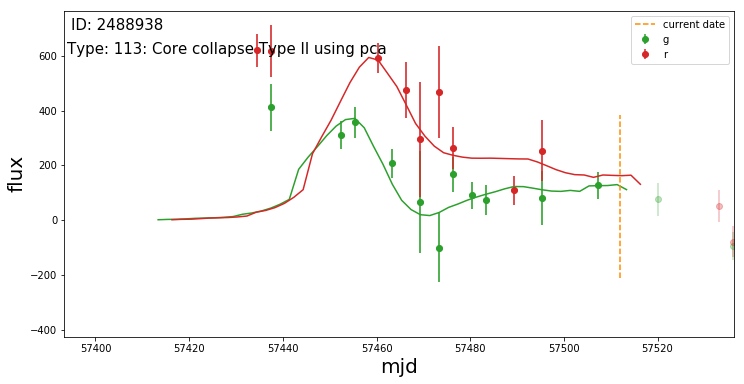

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.5485   g 676                 0 ...   23.04  28.06  15.092792 2492002
57436.4756   r 676                 0 ...   40.01  28.55  14.480902 2492002
57436.4845   g 676                 0 ...    24.0   28.1  15.092795 2492002
57439.4414   r 676                 0 ...    86.2  28.58  14.480906 2492002
57439.5616   g 676                 0 ...   47.56  28.42  15.092798 2492002
57443.4198   g 676                 0 ...  127.89  28.96  15.092803 2492002
57443.4784   r 676                 0 ...   86.54  28.49   14.48091 2492002
57451.4164   g 676                 0 ...   24.07  28.13  15.092813 2492002
57451.4435   r 676                 0 ...   35.73  28.54  14.480919 2492002
57454.4209   r 676                 0 ...   36.79  28.56  14.480923 2492002
       ... ...          ...      ... ...     ...    ...        ...     ...
57569.2059   r 676       

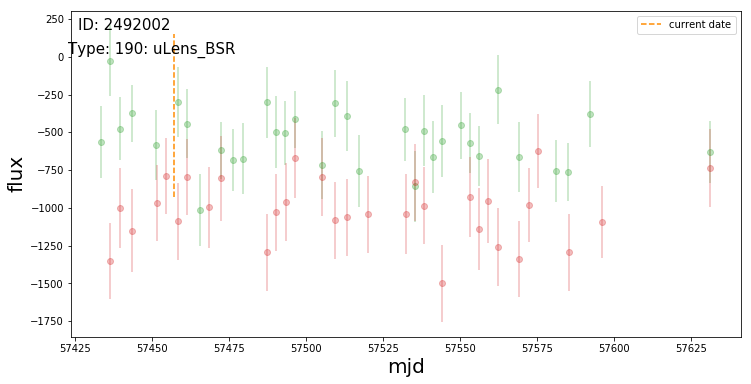

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1122   r 695                 0 ...   71.13  28.47       99.0 2520717
 57434.139   g 695                 0 ...   71.72  28.73       99.0 2520717
57438.1401   g 695                 0 ...  147.81   29.1       99.0 2520717
 57533.476   r 695                 0 ...   87.41  28.38       99.0 2520717
57536.4667   r 695                 0 ...   76.86  28.49       99.0 2520717
57551.4557   g 695              4096 ...   33.23  28.31  18.511028 2520717
57551.4656   r 695              4096 ...   48.89  28.53  18.434265 2520717
57554.4514   g 695              6144 ...   35.44  28.33  18.599041 2520717
57554.4661   r 695              4096 ...   48.79  28.61  18.416094 2520717
 57558.471   g 695              4096 ...   93.91   28.8  18.945946 2520717
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.2632   r 695       

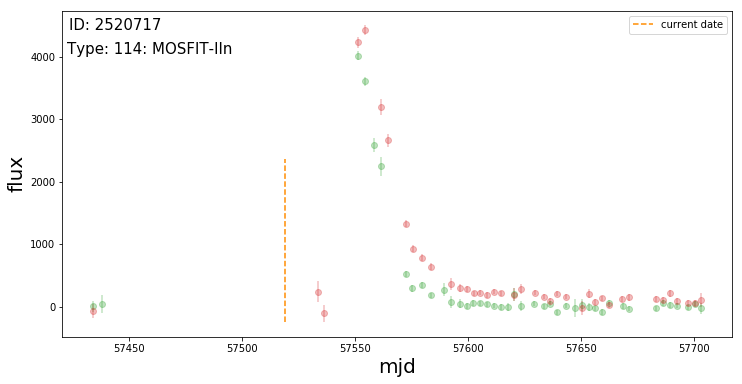

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57436.1528   g 508                 0 ...   94.58  28.75  21.239212 2531111
57439.1262   r 508                 0 ...   88.87   28.6  20.724644 2531111
57439.1862   g 508                 0 ...  138.61  29.05  21.254456 2531111
57444.1441   g 508                 0 ...   28.46  28.21  21.266321 2531111
57452.1449   g 508                 0 ...   28.57  28.27  21.275097 2531111
57456.1442   r 508              4096 ...   44.28  28.66  20.747627 2531111
57456.1616   g 508                 0 ...   32.82  28.36  21.277313 2531111
57463.1318   g 508                 0 ...   71.59  28.69  21.279541 2531111
57463.1519   r 508                 0 ...    82.9  28.52  20.749926 2531111
57466.1268   r 508                 0 ...   76.65  28.42  20.750729 2531111
       ... ...          ...      ... ...     ...    ...        ...     ...
 57684.416   g 508       

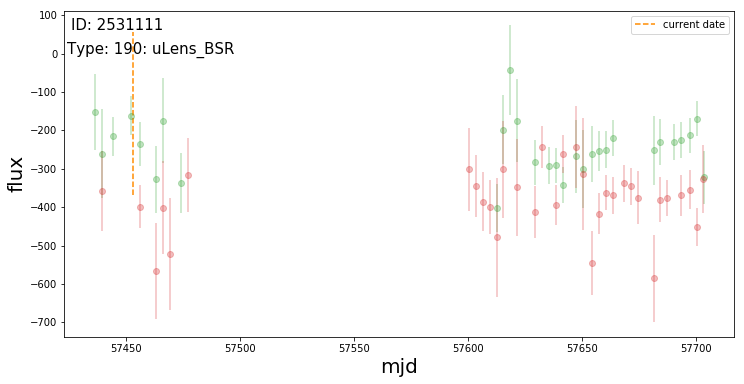

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2549   g 465                 0 ...   42.25  28.38  20.567783 2541821
57433.2764   r 465              4096 ...   48.45  28.49   19.37455 2541821
57436.2531   r 465                 0 ...   80.13  28.49   19.37437 2541821
57436.2934   g 465                 0 ...   89.04  28.72  20.567158 2541821
57443.2478   g 465                 0 ...  102.53  28.79   20.56759 2541821
57443.3142   r 465                 0 ...  100.43  28.54   19.37455 2541821
57451.2304   r 465                 0 ...   40.41   28.5   19.37455 2541821
57451.2518   g 465                 0 ...   26.01  28.14  20.568077 2541821
57454.2688   g 465              6144 ...   27.78   28.2  20.569353 2541821
57454.2932   r 465              4096 ...   47.62  28.58  19.375458 2541821
       ... ...          ...      ... ...     ...    ...        ...     ...
57669.5347   r 465       

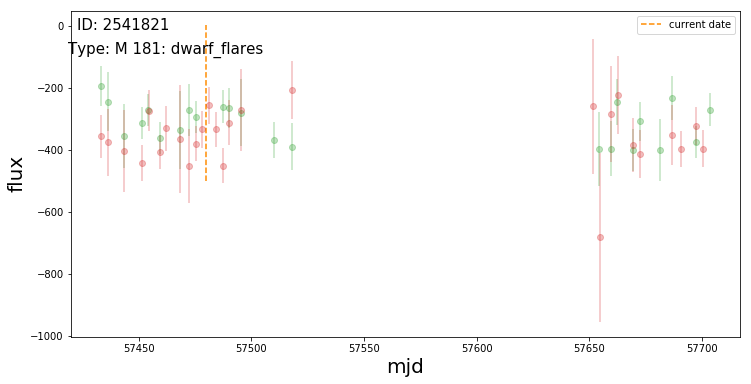

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2133   r 663                 0 ...   51.65  28.52   97.39288 2549440
57433.2671   g 663                 0 ...   37.55  28.28   97.39288 2549440
57436.2041   r 663                 0 ...   88.84  28.51   97.39288 2549440
57436.2152   g 663                 0 ...   85.27  28.68   97.39288 2549440
57439.2972   r 663                 0 ...  141.32  28.54   97.39288 2549440
57443.2332   g 663                 0 ...   81.99  28.65   97.39288 2549440
57443.2748   r 663                 0 ...   81.96  28.53   97.39288 2549440
57451.2195   r 663                 0 ...   38.52  28.51   97.39288 2549440
57451.2675   g 663                 0 ...   24.93  28.15   97.39288 2549440
57454.2399   r 663                 0 ...   41.32  28.54   97.39288 2549440
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4677   g 663       

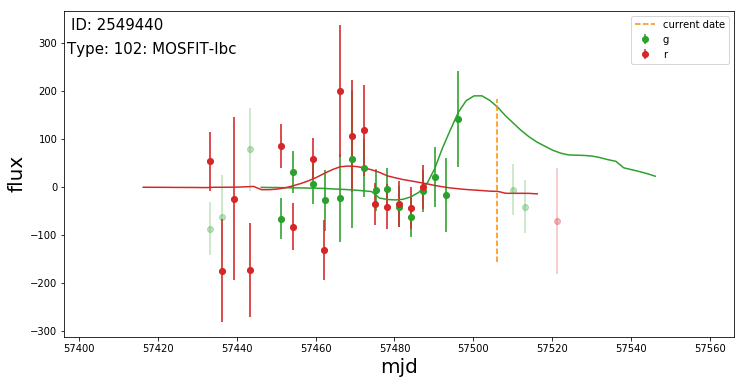

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1292   g 452                 0 ...   81.55  28.76       99.0 2563270
57438.1293   g 452                 0 ...  135.22  28.98       99.0 2563270
57444.1296   g 452                 0 ...    38.9  28.39       99.0 2563270
57453.1327   g 452                 0 ...    41.8  28.43       99.0 2563270
57461.1303   g 452                 0 ...   79.29  28.76       99.0 2563270
57589.4409   r 452                 0 ...  125.83  28.56       99.0 2563270
57592.4834   g 452                 0 ...  126.97  28.99       99.0 2563270
57599.4645   g 452                 0 ...   40.68  28.44       99.0 2563270
57599.4823   r 452                 0 ...    57.2  28.57       99.0 2563270
57602.4631   g 452                 0 ...    32.5  28.31       99.0 2563270
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.3727   g 452       

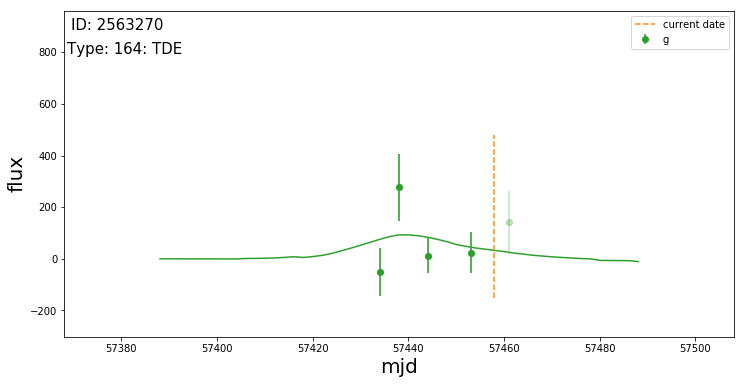

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57532.4626   r 646                 0 ...    79.7   28.5       99.0 2573229
57536.4773   r 646                 0 ...   68.48  28.48       99.0 2573229
57542.4458   g 646                 0 ...   33.28  28.34   23.80774 2573229
57542.4667   r 646                 0 ...   47.29  28.61   24.20153 2573229
57546.4467   g 646                 0 ...   28.48  28.22  22.487839 2573229
57546.4662   r 646                 0 ...   42.73  28.56  22.872698 2573229
 57550.466   r 646                 0 ...   42.78  28.52   22.50711 2573229
57553.4568   g 646                 0 ...   27.55  28.18  21.977964 2573229
57553.4769   r 646                 0 ...   40.68  28.46  22.331781 2573229
57556.4764   g 646                 0 ...   35.48  28.33  21.858456 2573229
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.1911   r 646       

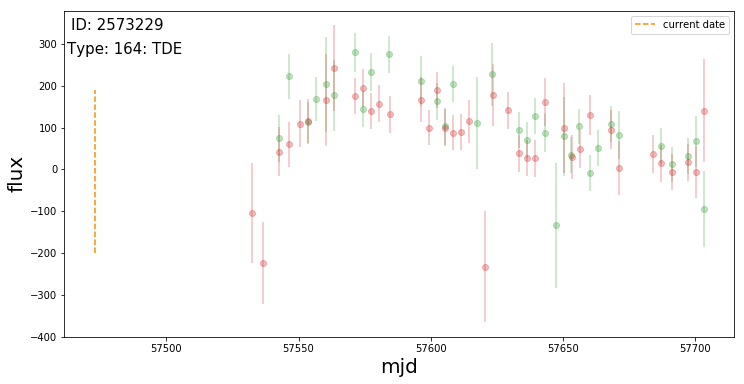

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4391   g 579                 0 ...   24.89  28.18       99.0 2579490
57433.4623   r 579                 0 ...   38.43  28.58       99.0 2579490
57436.4573   r 579                 0 ...   49.51  28.56       99.0 2579490
 57436.481   g 579                 0 ...    24.8  28.12       99.0 2579490
57439.3987   g 579                 0 ...   175.9  29.08       99.0 2579490
57439.4212   r 579                 0 ...   93.75  28.61       99.0 2579490
57443.3548   r 579                 0 ...   120.2  28.51       99.0 2579490
57443.3974   g 579                 0 ...  140.88  29.04       99.0 2579490
57451.4386   r 579                 0 ...   36.81  28.55  22.290646 2579490
57456.3769   g 579              4096 ...    25.3  28.19  20.596249 2579490
       ... ...          ...      ... ...     ...    ...        ...     ...
57555.2482   r 579       

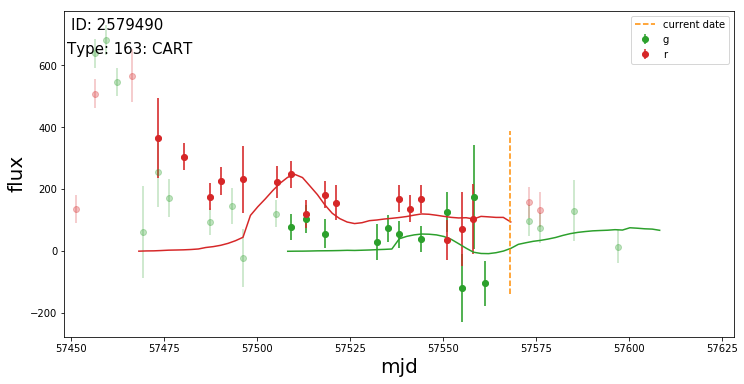

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57481.4388   r 329              4096 ...   46.04  28.54   20.27969 2584779
57507.4397   g 329                 0 ...   55.38  28.58  21.067303 2584779
57511.4172   r 329                 0 ...   44.52  28.49  20.244244 2584779
57520.2756   g 329                 0 ...    43.1  28.52   21.10172 2584779
 57537.335   g 329              6144 ...   40.36  28.41  21.164806 2584779
57537.3766   r 329              4096 ...    51.9  28.44   20.25757 2584779
57540.2742   g 329                 0 ...   34.79  28.39  21.177696 2584779
57540.3349   r 329              4096 ...   44.25  28.49  20.261648 2584779
57543.3138   g 329              4096 ...    35.6  28.35  21.191612 2584779
57543.3351   r 329              4096 ...   45.95  28.49  20.266254 2584779
57546.2944   g 329                 0 ...   34.92  28.34  21.205631 2584779
57552.2915   g 329       

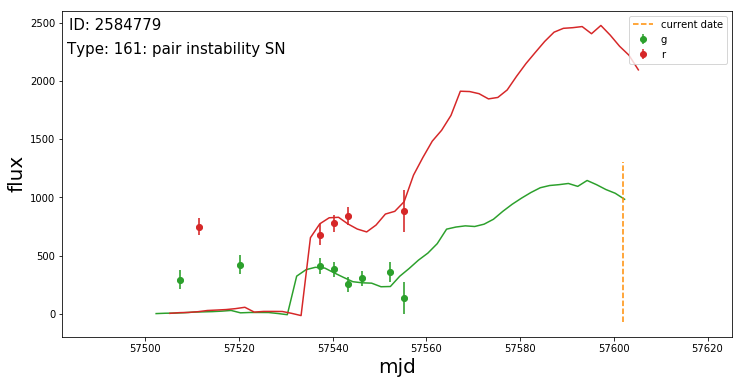

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57437.5223   g 482                 0 ...   31.52  28.33       99.0 2586650
57445.5022   r 482                 0 ...   87.68   28.6       99.0 2586650
57453.5023   r 482                 0 ...   40.52  28.56       99.0 2586650
57453.5232   g 482                 0 ...   29.61  28.21       99.0 2586650
57459.4601   g 482                 0 ...   28.51  28.29       99.0 2586650
57459.5004   r 482                 0 ...    38.6  28.53       99.0 2586650
57462.4798   r 482                 0 ...   40.52  28.55       99.0 2586650
57462.5027   g 482                 0 ...   25.47  28.14       99.0 2586650
  57467.44   r 482                 0 ...   75.64  28.61       99.0 2586650
57467.4609   g 482                 0 ...   72.47  28.67       99.0 2586650
       ... ...          ...      ... ...     ...    ...        ...     ...
57568.2518   g 482       

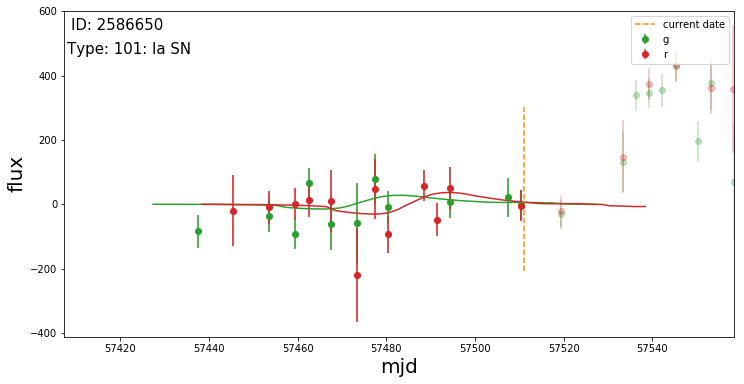

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.1246   g 348                 0 ...  106.96  29.02   98.23448 2587381
57435.1457   r 348                 0 ...  107.79  28.58   98.23448 2587381
57585.4637   g 348                 0 ...   39.16  28.46   98.23448 2587381
57590.4813   r 348                 0 ...  110.68   28.5   98.23448 2587381
57596.4848   g 348                 0 ...   96.83  28.86   98.23448 2587381
57599.4601   g 348                 0 ...    39.5  28.42   98.23448 2587381
57599.4957   r 348                 0 ...   53.56  28.48   98.23448 2587381
57602.4607   g 348                 0 ...   33.72  28.38   98.23448 2587381
  57605.46   g 348                 0 ...   34.49  28.37   98.23448 2587381
57605.4815   r 348                 0 ...   46.35  28.61   98.23448 2587381
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.2715   r 348       

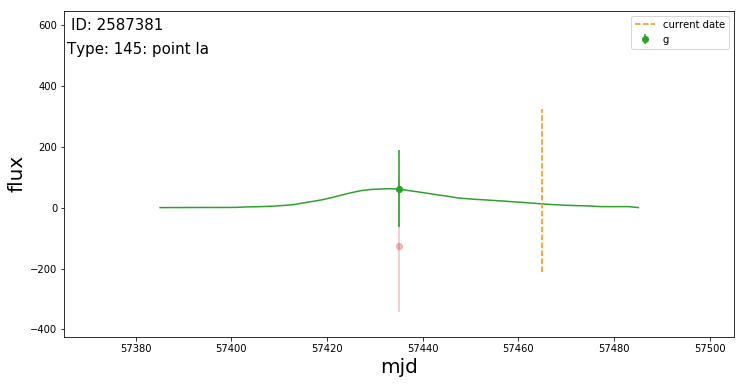

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.5234   r 631                 0 ...    37.1  28.56       99.0 2595835
 57433.544   g 631                 0 ...   24.32   28.1       99.0 2595835
57436.5036   g 631                 0 ...   25.38  28.16       99.0 2595835
 57436.545   r 631                 0 ...   38.14  28.52       99.0 2595835
  57444.46   g 631                 0 ...  102.86  28.86       99.0 2595835
57444.5011   r 631                 0 ...   79.71  28.52       99.0 2595835
 57452.482   r 631                 0 ...   36.55  28.54       99.0 2595835
57455.4359   r 631                 0 ...   39.56  28.62       99.0 2595835
57458.4189   g 631                 0 ...   26.49  28.22       99.0 2595835
57458.4415   r 631                 0 ...   37.53  28.59       99.0 2595835
       ... ...          ...      ... ...     ...    ...        ...     ...
57571.1901   g 631       

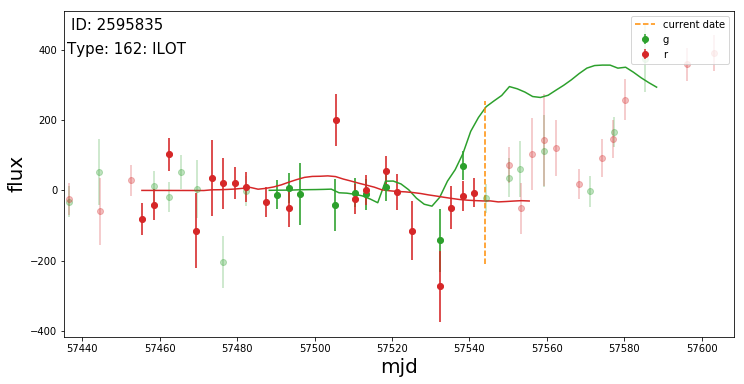

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1524   g 854                 0 ...   71.82  28.69   99.96641 2627036
57434.1745   r 854                 0 ...   73.55  28.49   99.96641 2627036
57438.1377   g 854                 0 ...  144.03  29.08   99.96641 2627036
57444.1367   g 854                 0 ...   35.56  28.37   99.96641 2627036
57532.4548   r 854                 0 ...   85.55  28.42   99.96641 2627036
57535.4754   r 854                 0 ...   70.11  28.45   99.96641 2627036
57538.4478   r 854                 0 ...   54.49   28.5   99.96641 2627036
57538.4713   g 854                 0 ...   56.53  28.63   99.96641 2627036
57541.4773   g 854                 0 ...   45.85   28.5   99.96641 2627036
 57546.453   g 854                 0 ...   37.09  28.42   99.96641 2627036
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.2645   g 854       

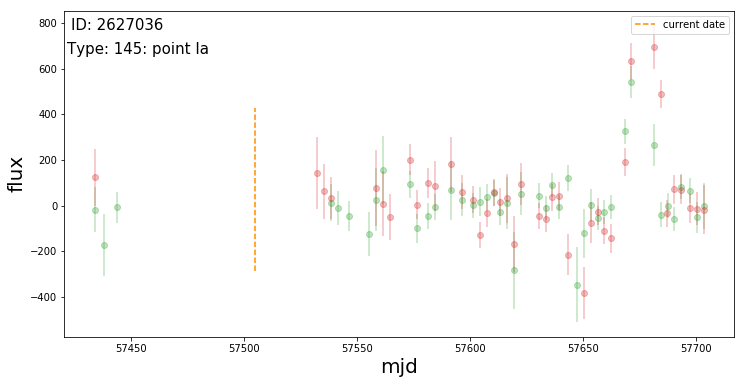

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57471.4808   r 382              4096 ...   99.74  28.59  19.005312 2658017
57471.5014   g 382              4096 ...  168.69  29.12  19.055552 2658017
  57474.46   r 382              6144 ...  103.56  28.54  19.010458 2658017
57474.5225   g 382              4096 ...  152.99  29.09  19.081636 2658017
57481.4398   r 382              4096 ...   46.85  28.56   19.02796 2658017
57481.5019   g 382              4096 ...   40.16  28.44  19.147516 2658017
57489.4808   g 382              4096 ...   32.22  28.34  19.230417 2658017
57489.5014   r 382              4096 ...   50.21  28.56  19.056078 2658017
 57492.459   r 382              4096 ...   45.22  28.61   19.06811 2658017
57492.4807   g 382              4096 ...   31.07  28.31  19.263292 2658017
       ... ...          ...      ... ...     ...    ...        ...     ...
57540.3977   g 382       

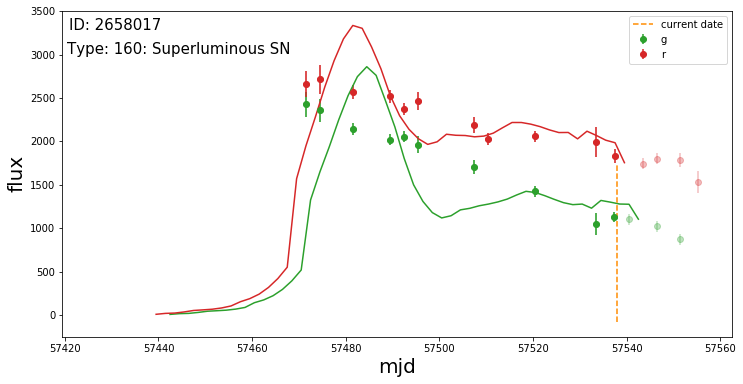

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57453.4589   g 378              4096 ...   35.33   28.4   16.62634 2663470
57453.5009   r 378                 0 ...   43.99  28.59   16.62241 2663470
  57456.48   r 378              6144 ...   44.14  28.61  16.764462 2663470
57467.3979   r 378              4096 ...   85.08  28.56  16.761545 2663470
 57467.418   g 378              4096 ...  103.69  28.93  16.971674 2663470
57477.4002   g 378              4096 ...   71.37  28.71  16.576885 2663470
57481.4189   r 378              4096 ...   44.18   28.6  16.443523 2663470
57481.4603   g 378              4096 ...   33.47  28.34  16.573366 2663470
57491.3556   g 378                 0 ...   33.66  28.37  16.739923 2663470
57491.3966   r 378              4096 ...   44.32  28.59  16.712603 2663470
       ... ...          ...      ... ...     ...    ...        ...     ...
57540.2937   r 378       

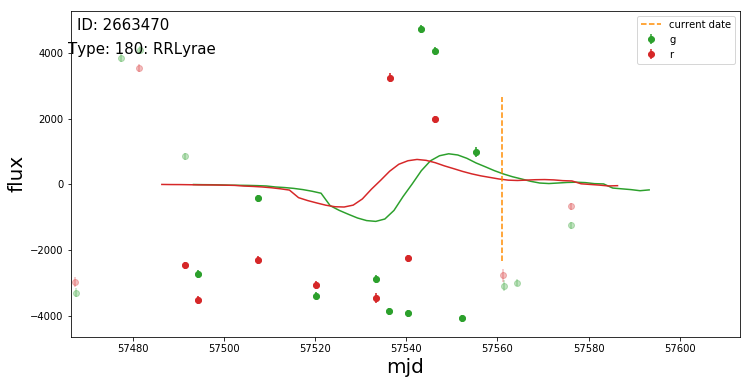

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57437.5228   g 535                 0 ...   32.57  28.36       99.0 2669891
57444.5224   r 535                 0 ...   75.79  28.56       99.0 2669891
57444.5436   g 535                 0 ...   97.48  28.78       99.0 2669891
57453.5238   g 535                 0 ...   31.39  28.32       99.0 2669891
57456.5238   r 535                 0 ...   39.97  28.65       99.0 2669891
 57459.526   g 535                 0 ...   26.15   28.2       99.0 2669891
57462.5227   r 535                 0 ...   41.21  28.62       99.0 2669891
57467.4815   g 535                 0 ...   48.62  28.44       99.0 2669891
57467.5019   r 535                 0 ...   45.99  28.62       99.0 2669891
57471.5216   g 535                 0 ...  125.46  28.93  25.234882 2669891
       ... ...          ...      ... ...     ...    ...        ...     ...
57602.1696   g 535       

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


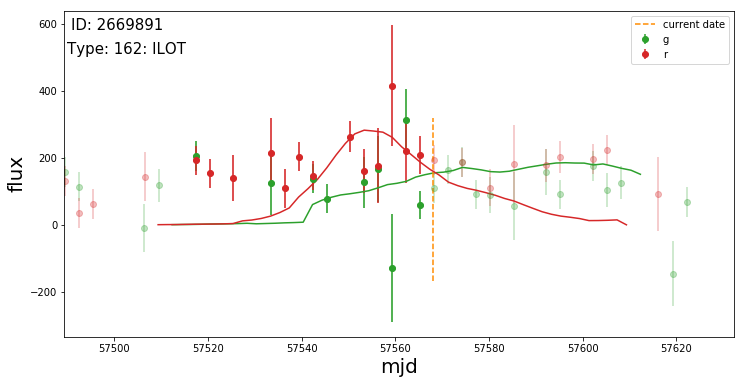

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57433.202   r 661                 0 ...   51.02   28.5  99.460785 2696854
57433.2458   g 661                 0 ...   43.49  28.37  99.460785 2696854
57438.2237   g 661                 0 ...  120.92  28.85  99.460785 2696854
57438.2308   r 661                 0 ...  121.79   28.5  99.460785 2696854
57443.1932   g 661                 0 ...   65.76  28.55  99.460785 2696854
57443.2688   r 661                 0 ...   82.59  28.62  99.460785 2696854
57451.1955   g 661                 0 ...   24.58   28.1  99.460785 2696854
57451.2176   r 661                 0 ...   40.54  28.57  99.460785 2696854
57454.1952   g 661                 0 ...   23.87   28.1  99.460785 2696854
57454.2167   r 661                 0 ...   41.17  28.58  99.460785 2696854
       ... ...          ...      ... ...     ...    ...        ...     ...
 57687.477   g 661       

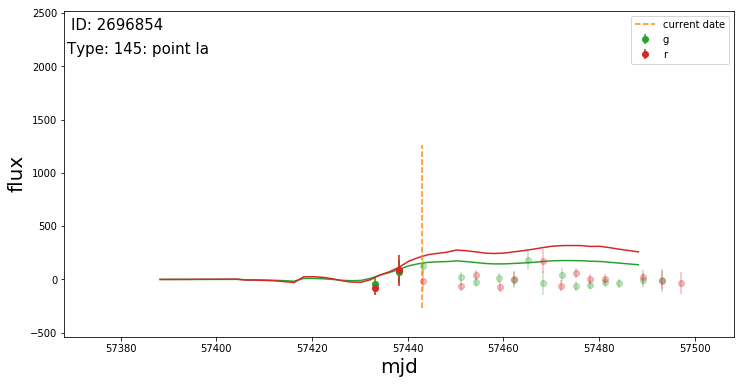

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.1938   r 811                 0 ...   55.57  28.53   98.78257 2705138
57433.2395   g 811                 0 ...   48.89  28.45   98.78257 2705138
57436.1631   g 811                 0 ...   80.54  28.69   98.78257 2705138
57436.1929   r 811                 0 ...   75.84  28.53   98.78257 2705138
57439.1794   g 811                 0 ...  128.99  28.94   98.78257 2705138
57443.1786   r 811                 0 ...   58.54  28.55   98.78257 2705138
57443.1996   g 811                 0 ...   77.52  28.73   98.78257 2705138
57451.2035   g 811                 0 ...   28.74  28.23   98.78257 2705138
57454.1778   r 811                 0 ...    42.9  28.62   98.78257 2705138
   57454.2   g 811                 0 ...   30.29  28.26   98.78257 2705138
       ... ...          ...      ... ...     ...    ...        ...     ...
  57674.41   g 811       

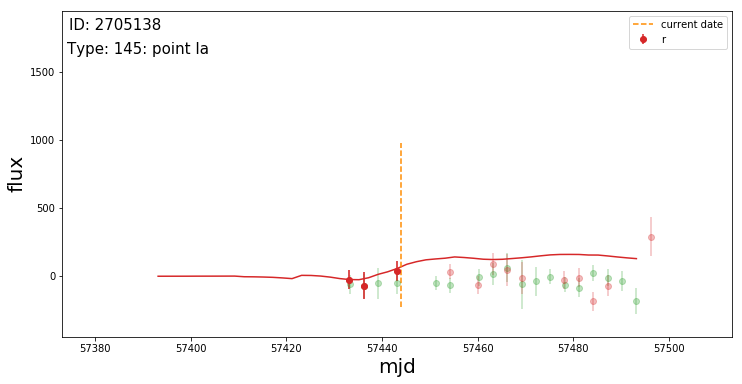

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57433.413   r 717              4096 ...   40.05  28.58  19.272348 2712794
57433.4511   g 717              6144 ...   22.57  28.07  19.271399 2712794
57436.4692   r 717              4096 ...   38.72  28.52  19.275656 2712794
57439.4472   r 717                 0 ...   87.68   28.5  19.267376 2712794
57439.4923   g 717                 0 ...   97.12  28.75  19.264849 2712794
57443.3731   r 717                 0 ...  101.49  28.59  19.293783 2712794
57451.3819   g 717                 0 ...    23.3   28.1  19.354872 2712794
57454.3395   g 717                 0 ...   26.85  28.22  19.358421 2712794
57454.3608   r 717                 0 ...   40.06  28.58  19.349792 2712794
57458.3949   g 717              4096 ...   23.66  28.08  19.370054 2712794
       ... ...          ...      ... ...     ...    ...        ...     ...
57573.1996   r 717       

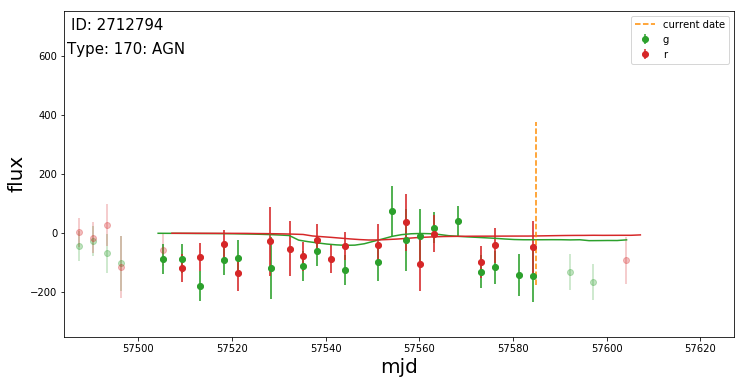

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57490.4861   g 868                 0 ...   35.97  28.39       99.0 2729940
57507.4672   g 868                 0 ...   56.61  28.61       99.0 2729940
57507.4913   r 868                 0 ...   61.55  28.54       99.0 2729940
57510.4917   g 868                 0 ...    50.0  28.55       99.0 2729940
57518.4474   r 868                 0 ...   45.33  28.48       99.0 2729940
57518.4668   g 868                 0 ...   34.03  28.37       99.0 2729940
57532.4262   g 868                 0 ...  138.55  29.06       99.0 2729940
57532.4693   r 868                 0 ...   86.03  28.56       99.0 2729940
57535.4749   r 868                 0 ...   65.63  28.54       99.0 2729940
57538.4502   r 868                 0 ...    50.1  28.46       99.0 2729940
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.2457   r 868       

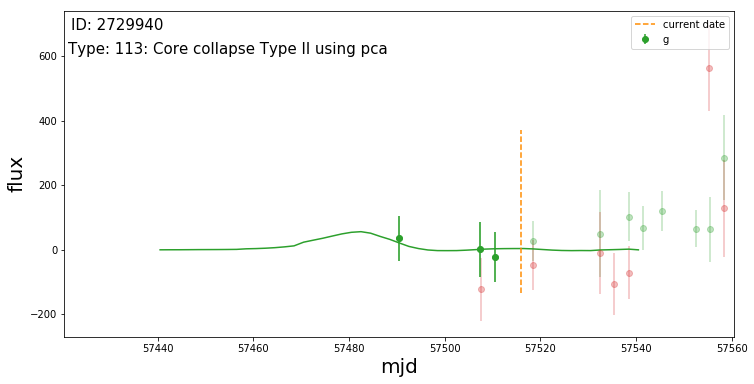

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.4806   g 426                 0 ...   29.58  28.29  20.490116 2864971
 57437.419   r 426                 0 ...   76.57  28.62  19.320955 2864971
57437.4594   g 426              4096 ...   60.51  28.65  20.490791 2864971
57452.3966   g 426              6144 ...    29.8  28.28  20.490139 2864971
57455.3777   g 426              4096 ...   31.09  28.33  20.486986 2864971
57460.3576   g 426                 0 ...   32.05  28.36  20.490858 2864971
57463.3572   r 426                 0 ...    49.7  28.59  19.320955 2864971
 57467.333   g 426                 0 ...  113.95  28.92  20.490805 2864971
57476.3545   r 426                 0 ...   69.28  28.62  19.320955 2864971
57476.3769   g 426                 0 ...   73.61  28.71  20.489838 2864971
       ... ...          ...      ... ...     ...    ...        ...     ...
57542.2098   r 426       

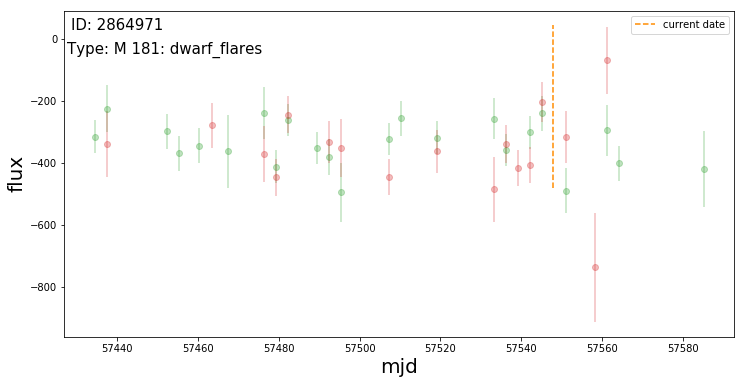

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57490.4845   g 643                 0 ...   34.43  28.39   99.03746 2899191
57490.5063   r 643                 0 ...   54.84  28.57   99.03746 2899191
57506.4999   g 643                 0 ...   67.45   28.6   99.03746 2899191
57511.4731   g 643                 0 ...   35.04  28.34   99.03746 2899191
 57511.492   r 643                 0 ...   52.87  28.59   99.03746 2899191
57518.4418   r 643                 0 ...   43.32  28.62   99.03746 2899191
57518.4656   g 643                 0 ...   28.48  28.28   99.03746 2899191
57525.4774   g 643                 0 ...   27.99  28.17   99.03746 2899191
57532.4752   r 643                 0 ...    80.8  28.59   99.03746 2899191
57535.4615   r 643                 0 ...    69.5  28.62   99.03746 2899191
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.1922   r 643       

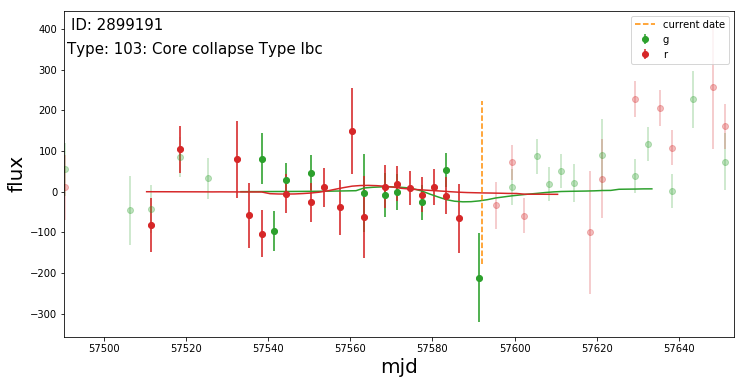

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.1223   g 448                 0 ...   103.5  28.98  22.495401 2937250
57559.4761   g 448                 0 ...  147.64  29.04  22.494799 2937250
57562.4573   g 448                 0 ...  118.35  28.89  22.495266 2937250
57562.4775   r 448                 0 ...   89.05  28.47   21.11649 2937250
57565.4829   g 448                 0 ...  247.41  29.31  22.494917 2937250
57573.4368   r 448                 0 ...   45.34  28.36    21.1242 2937250
 57573.441   g 448                 0 ...   35.82   28.4  22.495014 2937250
57576.4555   g 448                 0 ...   33.08  28.31  22.494818 2937250
57576.4627   r 448                 0 ...   44.51   28.6   21.12366 2937250
57579.4418   r 448                 0 ...   43.13  28.54  21.122572 2937250
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.2537   r 448       

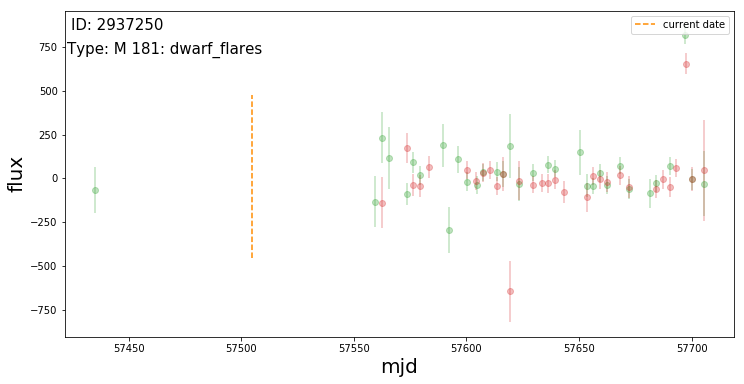

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4391   g 579              4096 ...   24.89  28.18  21.683464 2976046
57433.4623   r 579              6144 ...   38.43  28.58  20.800213 2976046
57436.4573   r 579              4096 ...   49.51  28.56  20.797327 2976046
 57436.481   g 579                 0 ...    24.8  28.12  21.689167 2976046
57439.3987   g 579                 0 ...   175.9  29.08  21.694868 2976046
57439.4212   r 579              4096 ...   93.75  28.61  20.794659 2976046
57443.3548   r 579                 0 ...   120.2  28.51  20.791954 2976046
57443.3974   g 579                 0 ...  140.88  29.04  21.703617 2976046
57451.4386   r 579              4096 ...   36.81  28.55  20.789656 2976046
57456.3769   g 579              4096 ...    25.3  28.19  21.740118 2976046
       ... ...          ...      ... ...     ...    ...        ...     ...
57555.2482   r 579       

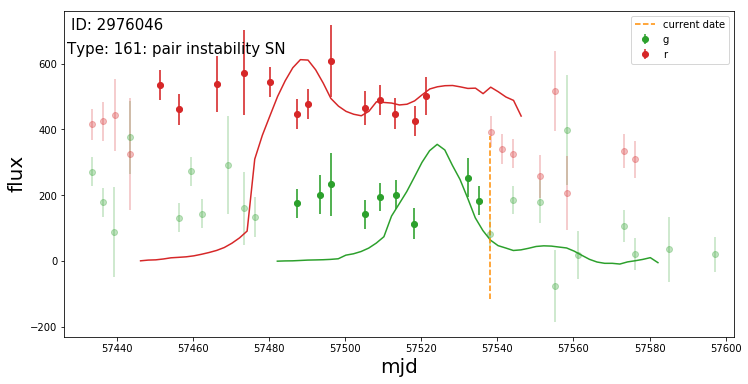

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57474.5104   r 731                 0 ...   78.55  28.47   99.16954 2989641
 57474.532   g 731                 0 ...  150.16  29.08   99.16954 2989641
57479.5076   g 731                 0 ...   54.17  28.57   99.16954 2989641
57505.4983   r 731                 0 ...   64.71  28.55   99.16954 2989641
57509.4858   g 731                 0 ...   42.01  28.42   99.16954 2989641
 57519.452   r 731                 0 ...   40.88   28.6   99.16954 2989641
57519.4724   g 731                 0 ...   25.65  28.15   99.16954 2989641
57525.4734   g 731                 0 ...   26.29  28.13   99.16954 2989641
57532.4227   g 731                 0 ...   115.8  28.91   99.16954 2989641
57532.4728   r 731                 0 ...   76.75  28.57   99.16954 2989641
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.1966   r 731       

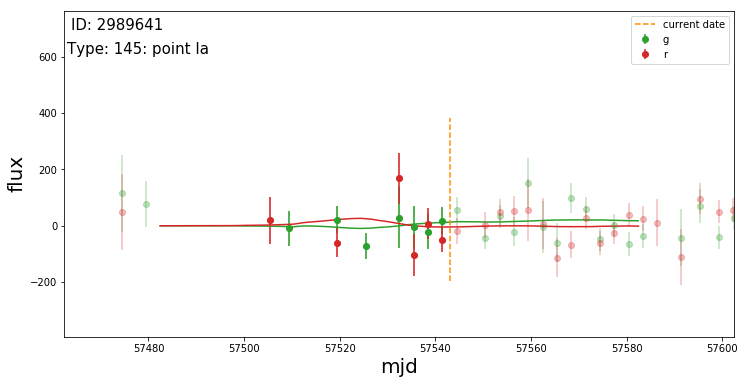

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57532.464   r 692              4096 ...    79.3  28.56  18.379154 2989892
57536.4486   g 692              6144 ...   59.53  28.56  19.380783 2989892
57536.4768   r 692              4096 ...   63.25  28.43  18.406574 2989892
 57539.469   g 692              4096 ...   44.55  28.46  19.416027 2989892
57542.4462   g 692              4096 ...   31.56  28.28  19.451569 2989892
57542.4672   r 692              4096 ...   44.21  28.56  18.449858 2989892
57545.4542   g 692              4096 ...   29.71  28.27  19.488438 2989892
57551.4434   g 692              4096 ...   26.65   28.2  19.564373 2989892
57551.4778   r 692              4096 ...   42.66  28.61   18.52024 2989892
57554.4476   g 692              4096 ...   26.08  28.16  19.603687 2989892
       ... ...          ...      ... ...     ...    ...        ...     ...
57683.2274   g 692       

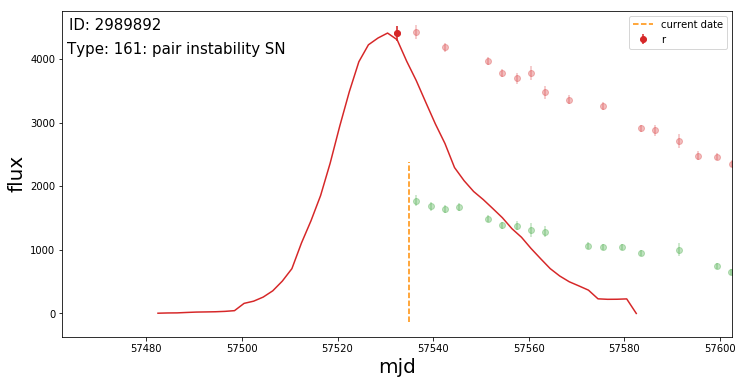

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2293   r 514                 0 ...   55.57  28.58       99.0 3027964
57433.2483   g 514                 0 ...   47.16  28.47       99.0 3027964
57443.2119   r 514                 0 ...   76.62  28.58       99.0 3027964
57451.1683   r 514                 0 ...   41.85  28.59       99.0 3027964
57451.1921   g 514                 0 ...   26.18  28.19       99.0 3027964
57454.1671   r 514                 0 ...   39.49  28.59       99.0 3027964
57454.1914   g 514                 0 ...   26.23  28.19       99.0 3027964
57459.1871   g 514                 0 ...   29.97  28.27       99.0 3027964
57462.1652   g 514                 0 ...   65.63  28.62       99.0 3027964
57462.1876   r 514                 0 ...    62.9  28.63       99.0 3027964
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.4977   r 514       

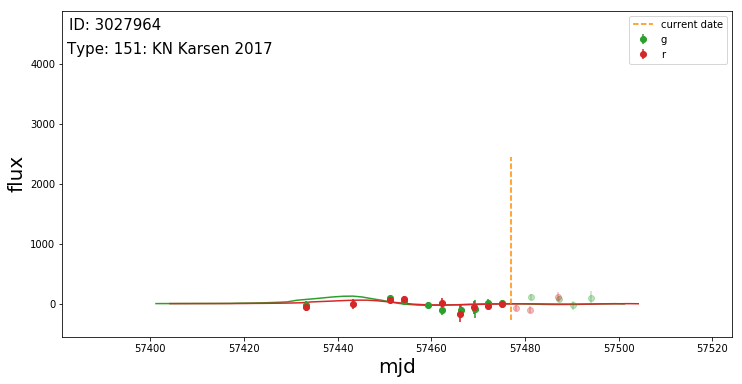

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57471.4808   r 382                 0 ...   99.74  28.59  20.528912 3141256
57471.5014   g 382              4096 ...  168.69  29.12  20.182531 3141256
  57474.46   r 382                 0 ...  103.56  28.54  20.594265 3141256
57474.5225   g 382                 0 ...  152.99  29.09  20.247995 3141256
57481.4398   r 382              6144 ...   46.85  28.56  20.804214 3141256
57481.5019   g 382              4096 ...   40.16  28.44  20.452686 3141256
57489.4808   g 382              4096 ...   32.22  28.34  20.760523 3141256
57489.5014   r 382              4096 ...   50.21  28.56  21.127228 3141256
 57492.459   r 382                 0 ...   45.22  28.61  21.259916 3141256
57492.4807   g 382              4096 ...   31.07  28.31  20.889658 3141256
       ... ...          ...      ... ...     ...    ...        ...     ...
57540.3977   g 382       

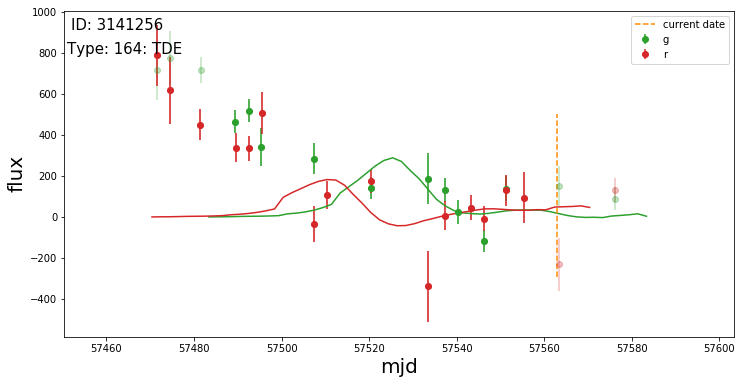

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57469.3982   g 380                 0 ...  245.74  29.39  20.474936 3159838
57469.4588   r 380                 0 ...   92.44  28.54  19.310898 3159838
57474.4387   r 380                 0 ...  122.94  28.57  19.311356 3159838
57481.4194   r 380                 0 ...   45.27  28.59  19.160437 3159838
57491.4398   r 380              4096 ...    44.6  28.58  19.312012 3159838
57491.4606   g 380              4096 ...    32.1  28.32  20.477903 3159838
57494.3367   g 380                 0 ...   76.18  28.82  20.476105 3159838
57494.3755   r 380                 0 ...   62.26  28.62  19.311682 3159838
57507.4195   r 380                 0 ...   58.53  28.56  19.312063 3159838
57507.4401   g 380                 0 ...   53.24  28.56  20.477688 3159838
       ... ...          ...      ... ...     ...    ...        ...     ...
57539.2927   r 380       

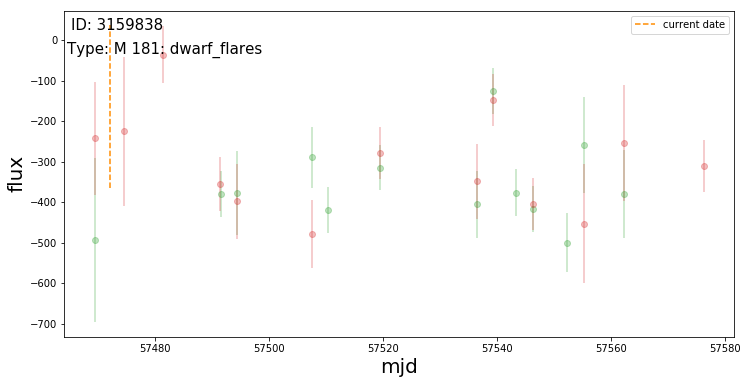

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.1986   r 782                 0 ...   53.12  28.58       99.0 3193533
57433.2414   g 782                 0 ...   44.84  28.44       99.0 3193533
57436.1987   r 782                 0 ...   77.14  28.57  36.374607 3193533
57436.2178   g 782                 0 ...   86.92  28.75  32.897503 3193533
57443.2243   r 782                 0 ...   73.31  28.59   23.63679 3193533
57443.2356   g 782                 0 ...   95.07  28.81  22.808445 3193533
57451.1984   g 782                 0 ...   25.07  28.17  21.656893 3193533
57451.2245   r 782                 0 ...   42.51  28.64  21.737473 3193533
 57454.222   r 782                 0 ...   42.46  28.65  21.484367 3193533
57454.2555   g 782              4096 ...   27.61  28.21  21.410297 3193533
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4745   g 782       

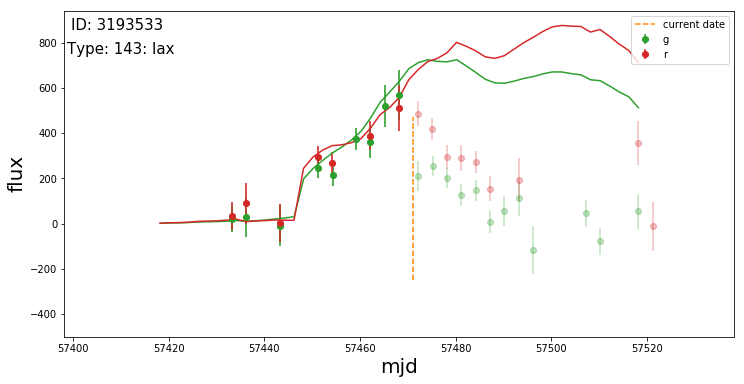

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.5435   g 480                 0 ...   28.83  28.19   98.19009 3202088
57438.5023   r 480                 0 ...   60.17  28.55   98.19009 3202088
 57444.459   g 480                 0 ...  125.42  29.01   98.19009 3202088
57444.5005   r 480                 0 ...   91.07  28.51   98.19009 3202088
57452.4609   g 480                 0 ...   27.07  28.22   98.19009 3202088
57452.5018   r 480                 0 ...    40.5   28.5   98.19009 3202088
57455.4395   g 480                 0 ...   28.37  28.27   98.19009 3202088
57455.4797   r 480                 0 ...   38.22  28.52   98.19009 3202088
57458.4395   r 480                 0 ...    41.5  28.59   98.19009 3202088
 57458.502   g 480                 0 ...    25.9  28.14   98.19009 3202088
       ... ...          ...      ... ...     ...    ...        ...     ...
57555.2498   r 480       

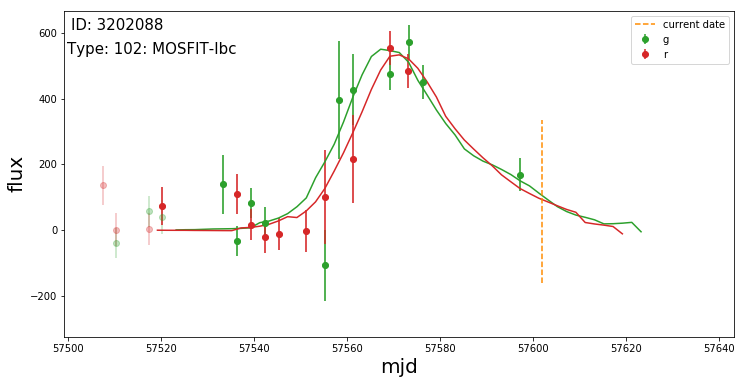

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57519.4607   g 439                 0 ...   30.84  28.31       99.0 3259009
57533.4394   g 439                 0 ...   125.9  28.95       99.0 3259009
57536.4614   r 439                 0 ...   90.22  28.59       99.0 3259009
57539.4407   r 439                 0 ...   48.56  28.62       99.0 3259009
57539.4604   g 439                 0 ...   39.78  28.41       99.0 3259009
57542.4396   g 439                 0 ...   29.08  28.28       99.0 3259009
57542.4605   r 439                 0 ...   44.49  28.59       99.0 3259009
57545.4395   g 439                 0 ...   29.02  28.27       99.0 3259009
57551.3784   g 439                 0 ...   29.76  28.28       99.0 3259009
57554.3768   g 439                 0 ...   43.39  28.44       99.0 3259009
       ... ...          ...      ... ...     ...    ...        ...     ...
57660.2093   g 439       

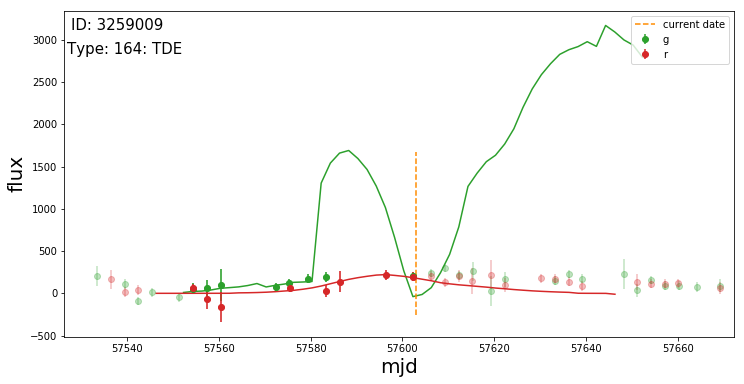

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57517.4605   g 545                 0 ...   34.37  28.41    32.7546 3305639
57517.4822   r 545                 0 ...   58.22  28.58  33.143578 3305639
57525.4779   g 545                 0 ...   32.64  28.27    23.3223 3305639
57532.4776   r 545                 0 ...   85.41  28.54  21.875368 3305639
57537.4563   r 545                 0 ...   67.14  28.43   21.37741 3305639
57537.4621   g 545                 0 ...   64.88  28.63  21.398733 3305639
57540.4422   r 545              4096 ...   46.83  28.62  21.184324 3305639
57540.4667   g 545                 0 ...    35.7  28.31  21.282997 3305639
57543.4567   g 545              6144 ...   28.06   28.2  21.278748 3305639
57543.4655   r 545                 0 ...   40.35  28.51  21.076889 3305639
       ... ...          ...      ... ...     ...    ...        ...     ...
57672.2106   g 545       

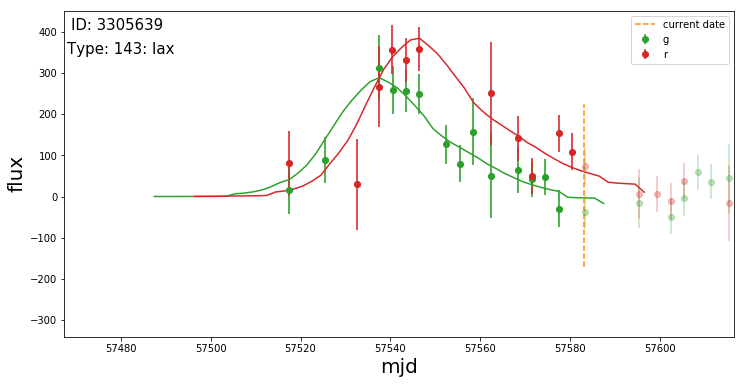

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4225   g 578              4096 ...   24.79  28.17  18.605299 3306232
57433.4613   r 578              6144 ...   37.85  28.56  18.463104 3306232
 57436.398   r 578                 0 ...   63.34  28.65  18.464708 3306232
57436.4197   g 578                 0 ...   50.37  28.49  18.607489 3306232
57439.3992   g 578                 0 ...  179.67  29.13  18.601534 3306232
57439.4203   r 578                 0 ...   97.01  28.56  18.460112 3306232
57444.4001   g 578                 0 ...  111.87  28.87  18.592562 3306232
57444.4367   r 578                 0 ...  109.02  28.52  18.451422 3306232
57451.3785   g 578              4096 ...   24.84  28.17   18.59634 3306232
57451.4191   r 578              4096 ...   37.34  28.55  18.455494 3306232
       ... ...          ...      ... ...     ...    ...        ...     ...
57555.2118   r 578       

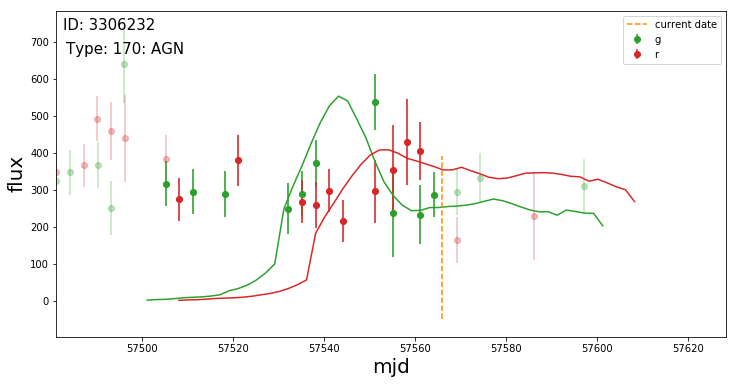

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.1986   r 782                 0 ...   53.12  28.58       99.0 3310896
57433.2414   g 782                 0 ...   44.84  28.44       99.0 3310896
57436.1987   r 782                 0 ...   77.14  28.57       99.0 3310896
57436.2178   g 782                 0 ...   86.92  28.75       99.0 3310896
57443.2243   r 782                 0 ...   73.31  28.59       99.0 3310896
57443.2356   g 782                 0 ...   95.07  28.81       99.0 3310896
57451.1984   g 782                 0 ...   25.07  28.17       99.0 3310896
57451.2245   r 782                 0 ...   42.51  28.64       99.0 3310896
 57454.222   r 782                 0 ...   42.46  28.65       99.0 3310896
57454.2555   g 782                 0 ...   27.61  28.21       99.0 3310896
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4745   g 782       

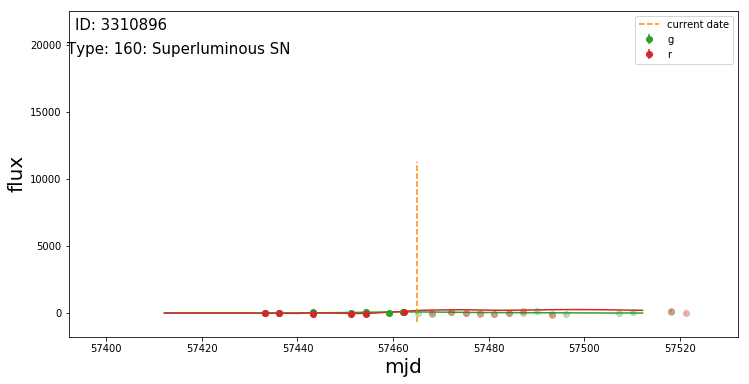

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57469.3977   g 379                 0 ...   222.5  29.33   98.94256 3365695
57469.4382   r 379                 0 ...   94.14  28.55   98.94256 3365695
57477.4181   g 379                 0 ...   74.12  28.74   98.94256 3365695
57477.4585   r 379                 0 ...   90.36  28.57   98.94256 3365695
57482.4382   r 379              4096 ...   43.41  28.59  20.452694 3365695
57491.4393   r 379              6144 ...   44.52  28.57   20.00451 3365695
57491.4601   g 379              4096 ...   32.63  28.33  20.608604 3365695
57494.3362   g 379                 0 ...   72.06  28.74  21.823118 3365695
57494.3567   r 379              4096 ...   61.81   28.5  20.203596 3365695
57507.3999   g 379                 0 ...    46.7   28.5   98.94256 3365695
       ... ...          ...      ... ...     ...    ...        ...     ...
57534.3771   r 379       

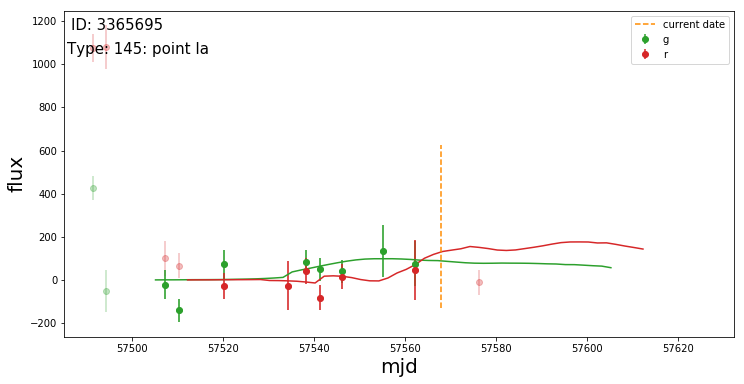

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.1711   r 561                 0 ...   62.05  28.54   18.53453 3371530
57433.2355   g 561                 0 ...   58.94  28.54  19.200237 3371530
57437.2044   g 561                 0 ...  113.23   28.9  19.200237 3371530
57437.2142   r 561                 0 ...  113.93  28.46   18.53453 3371530
57440.1092   g 561                 0 ...  109.74  28.83  19.200237 3371530
57443.1444   g 561                 0 ...    31.3  28.23  19.200237 3371530
57443.1678   r 561                 0 ...   59.65  28.57   18.53453 3371530
57451.2068   g 561                 0 ...   28.93  28.28  19.200237 3371530
57454.1261   r 561                 0 ...   37.49  28.57   18.53453 3371530
57460.1296   g 561                 0 ...   47.18  28.46  19.200237 3371530
       ... ...          ...      ... ...     ...    ...        ...     ...
57685.3644   g 561       

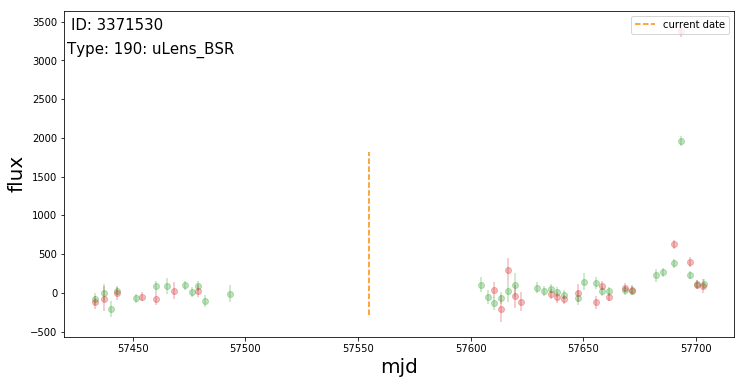

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2309   g 258                 0 ...   60.65  28.63  19.190964 3376175
57436.1474   g 258                 0 ...   113.5  28.99   19.19083 3376175
57436.1886   r 258                 0 ...   95.51  28.47  17.760006 3376175
57439.1681   g 258                 0 ...  183.03  29.19  19.190693 3376175
57444.2088   r 258                 0 ...   79.73  28.45  17.759518 3376175
57444.2306   g 258                 0 ...   83.83  28.78  19.190462 3376175
57452.1683   g 258                 0 ...   42.62  28.49    19.1901 3376175
57452.1891   r 258                 0 ...   56.03  28.46  17.759033 3376175
57455.2099   g 258                 0 ...   43.68  28.46   19.18996 3376175
57460.1681   g 258                 0 ...   48.17  28.54  19.189735 3376175
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.4814   g 258       

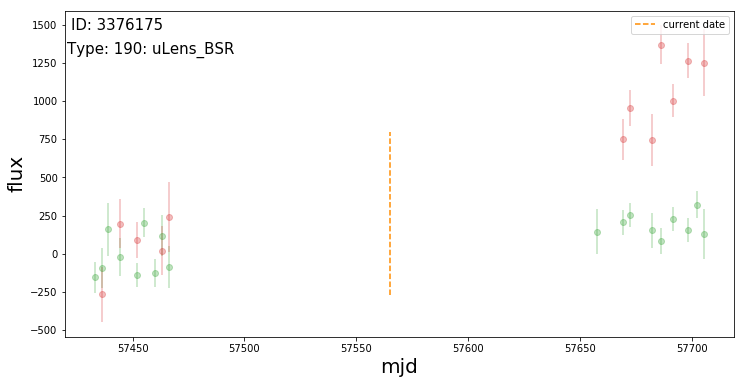

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1195   r 697                 0 ...   71.46  28.55       99.0 3381077
57434.1612   g 697                 0 ...   77.47  28.78       99.0 3381077
57438.1415   g 697                 0 ...  131.28   29.0       99.0 3381077
57444.1333   g 697                 0 ...   36.13  28.34       99.0 3381077
57452.1383   g 697                 0 ...   35.66   28.4       99.0 3381077
57455.1392   g 697                 0 ...   38.99  28.44       99.0 3381077
57460.1402   g 697                 0 ...   65.92  28.73       99.0 3381077
57463.1413   g 697                 0 ...   71.88  28.78       99.0 3381077
 57467.131   r 697                 0 ...  100.63  28.43       99.0 3381077
57559.4746   g 697                 0 ...  134.94  28.97  22.620285 3381077
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.2994   r 697       

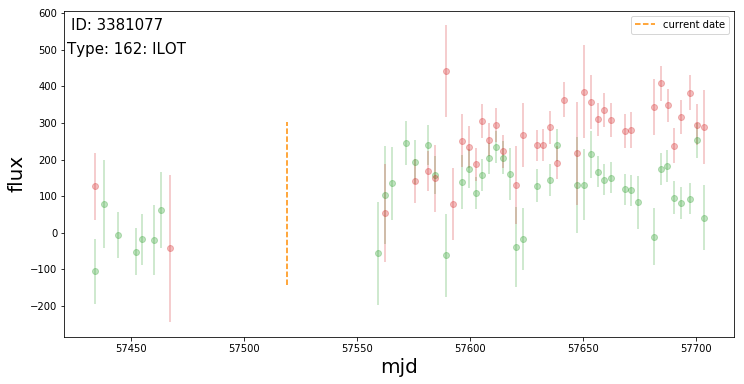

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2568   g 617                 0 ...   38.23   28.3  21.364983 3387505
 57433.275   r 617              4096 ...   47.79  28.51  20.771559 3387505
57436.2342   g 617                 0 ...   86.95  28.71  21.324007 3387505
57436.2549   r 617              6144 ...   82.06   28.5  20.671751 3387505
57443.2464   g 617                 0 ...   89.11   28.7  21.390863 3387505
57443.3172   r 617              4096 ...   90.41  28.57  20.588165 3387505
57451.2497   r 617              4096 ...   38.39  28.52   20.67784 3387505
57451.2704   g 617                 0 ...   24.44  28.11  21.670319 3387505
57454.2375   r 617              4096 ...   40.19  28.52  20.746649 3387505
57454.2668   g 617                 0 ...   25.09  28.13   21.81449 3387505
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.4637   g 617       

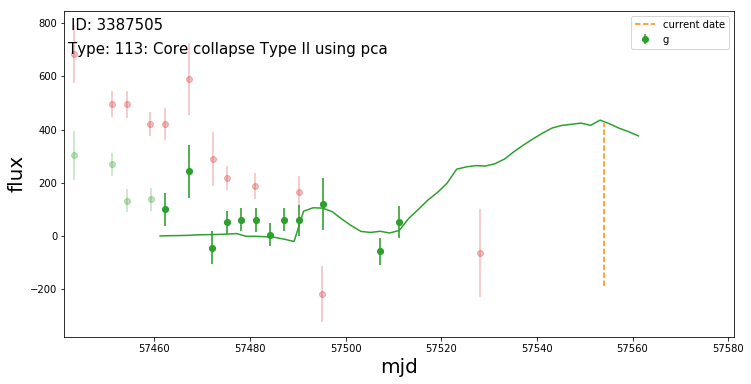

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5514   g 800                 0 ...   37.83  28.41  99.113396 3388572
57455.5395   r 800                 0 ...   43.03  28.48  99.113396 3388572
 57455.546   g 800                 0 ...  146.12  29.06  99.113396 3388572
57462.5163   g 800                 0 ...   31.17  28.28  99.113396 3388572
57462.5357   r 800                 0 ...   44.09  28.55  99.113396 3388572
 57470.473   r 800                 0 ...   105.7  28.47  99.113396 3388572
57470.5142   g 800                 0 ...  124.83  28.96  99.113396 3388572
57473.5165   r 800                 0 ...   74.26  28.49  99.113396 3388572
 57473.532   g 800                 0 ...   145.3  29.04  99.113396 3388572
57476.5131   r 800                 0 ...   57.19  28.48  99.113396 3388572
       ... ...          ...      ... ...     ...    ...        ...     ...
 57686.117   g 800       

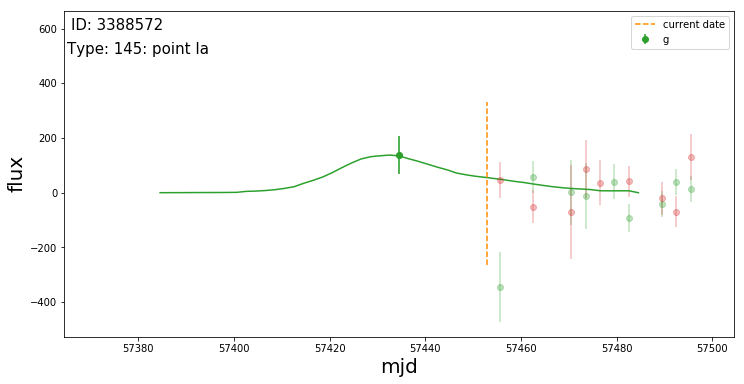

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57438.4805   g 430                 0 ...   99.43   28.9       99.0 3435631
57453.5014   r 430                 0 ...   42.51  28.63       99.0 3435631
57456.4606   r 430                 0 ...   42.94  28.57       99.0 3435631
57456.5023   g 430                 0 ...   28.79  28.27       99.0 3435631
 57461.481   r 430                 0 ...   41.87  28.62       99.0 3435631
57461.5017   g 430                 0 ...   27.77  28.24       99.0 3435631
57467.4391   r 430                 0 ...   73.05  28.53       99.0 3435631
57467.4604   g 430                 0 ...   77.68  28.76       99.0 3435631
57470.4594   r 430                 0 ...  119.95  28.59       99.0 3435631
57470.4808   g 430                 0 ...  158.87  29.08       99.0 3435631
       ... ...          ...      ... ...     ...    ...        ...     ...
57555.2693   g 430       

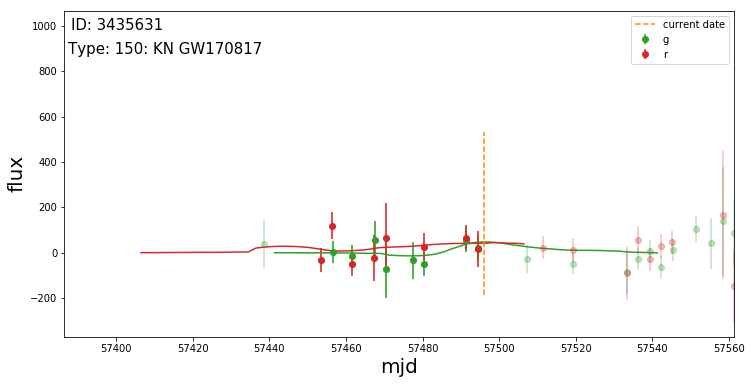

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57474.5104   r 731                 0 ...   78.55  28.47   98.54525 3461006
 57474.532   g 731                 0 ...  150.16  29.08   98.54525 3461006
57479.5076   g 731                 0 ...   54.17  28.57   98.54525 3461006
57505.4983   r 731                 0 ...   64.71  28.55   98.54525 3461006
57509.4858   g 731                 0 ...   42.01  28.42   98.54525 3461006
 57519.452   r 731              4096 ...   40.88   28.6   21.74053 3461006
57519.4724   g 731              4096 ...   25.65  28.15  21.389515 3461006
57525.4734   g 731              6144 ...   26.29  28.13  18.963345 3461006
57532.4227   g 731              4096 ...   115.8  28.91  20.145557 3461006
57532.4728   r 731              4096 ...   76.75  28.57  19.233585 3461006
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.1966   r 731       

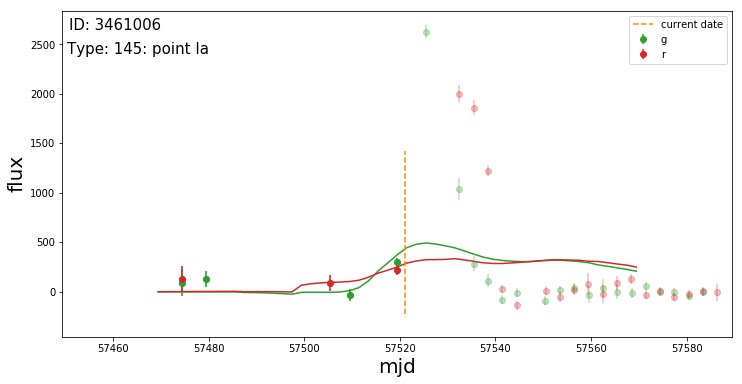

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.5331   r 793                 0 ...   37.82   28.6  99.139595 3478506
57433.5507   g 793                 0 ...   25.16  28.16  99.139595 3478506
57436.5194   g 793                 0 ...   25.35  28.17  99.139595 3478506
  57436.56   r 793                 0 ...   39.28   28.6  99.139595 3478506
57439.4698   r 793                 0 ...   86.66  28.61  99.139595 3478506
57439.4948   g 793                 0 ...  109.55  28.87  99.139595 3478506
57443.4114   g 793                 0 ...  117.45  28.91  99.139595 3478506
57443.4735   r 793                 0 ...   82.63   28.6  99.139595 3478506
57451.4498   r 793                 0 ...    38.4  28.62  99.139595 3478506
57451.4735   g 793                 0 ...   26.45  28.19  99.139595 3478506
       ... ...          ...      ... ...     ...    ...        ...     ...
57639.1417   r 793       

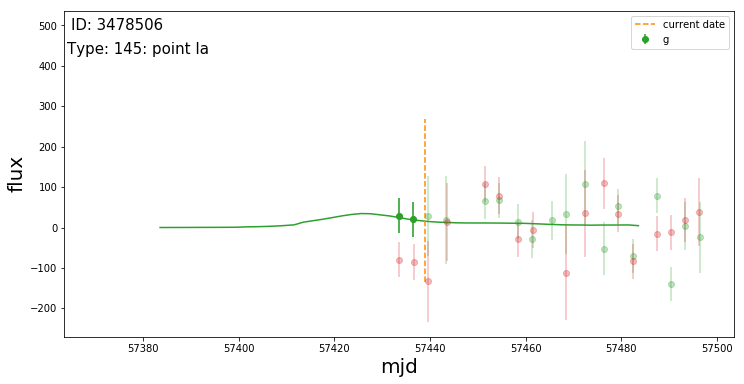

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.1893   g 608                 0 ...   93.86  28.78       99.0 3582102
  57435.21   r 608                 0 ...   91.33  28.46       99.0 3582102
57438.2122   g 608                 0 ...  133.82  28.98       99.0 3582102
57443.1283   g 608                 0 ...    32.7  28.27       99.0 3582102
57452.1301   g 608                 0 ...   25.37  28.12       99.0 3582102
57455.1434   g 608                 0 ...   28.15  28.24       99.0 3582102
57463.1455   g 608                 0 ...   70.53  28.68       99.0 3582102
 57463.166   r 608                 0 ...   72.81  28.54       99.0 3582102
57466.1282   r 608                 0 ...   74.16  28.48       99.0 3582102
57466.1647   g 608                 0 ...   94.63  28.89       99.0 3582102
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.3802   r 608       

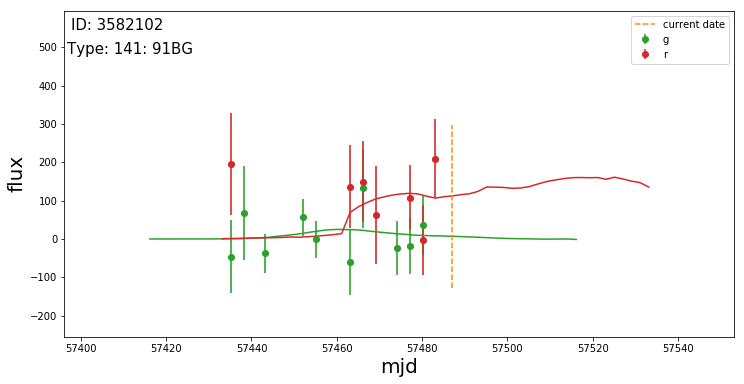

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.5502   g 682                 0 ...   28.71  28.22  99.052505 3582313
57439.5479   g 682                 0 ...   58.07  28.52  99.052505 3582313
57443.5275   r 682                 0 ...   72.83  28.52  99.052505 3582313
57443.5475   g 682                 0 ...   121.2  28.94  99.052505 3582313
57451.5295   g 682                 0 ...   37.52  28.37  99.052505 3582313
57451.5468   r 682                 0 ...   57.76  28.57  99.052505 3582313
57454.5069   r 682                 0 ...   38.21  28.51  99.052505 3582313
 57454.539   g 682                 0 ...    26.0  28.17  99.052505 3582313
57458.5347   g 682                 0 ...   24.95  28.14  99.052505 3582313
57461.5184   g 682                 0 ...   23.31  28.12  99.052505 3582313
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.1013   r 682       

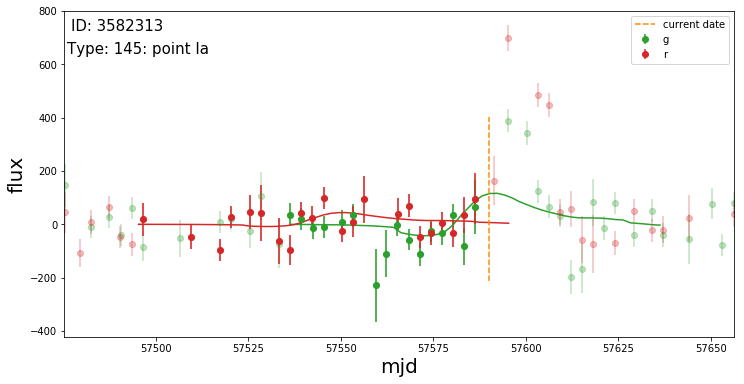

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57507.4643   g 596                 0 ...    63.6   28.7  24.987106 3593297
57511.4741   g 596                 0 ...   45.14  28.44   24.22472 3593297
 57511.491   r 596                 0 ...   62.04  28.51   24.28399 3593297
57517.4614   g 596                 0 ...   35.18  28.43  23.560705 3593297
57517.4831   r 596                 0 ...   58.45  28.59  23.556988 3593297
57532.4757   r 596                 0 ...    80.1  28.55  22.631533 3593297
57532.4836   g 596                 0 ...  188.98  29.13   22.76177 3593297
57536.4472   g 596                 0 ...   68.99  28.64  22.638346 3593297
57536.4639   r 596                 0 ...   76.18  28.56   22.47757 3593297
57539.4436   r 596                 0 ...   50.98  28.63  22.376549 3593297
       ... ...          ...      ... ...     ...    ...        ...     ...
57662.2537   g 596       

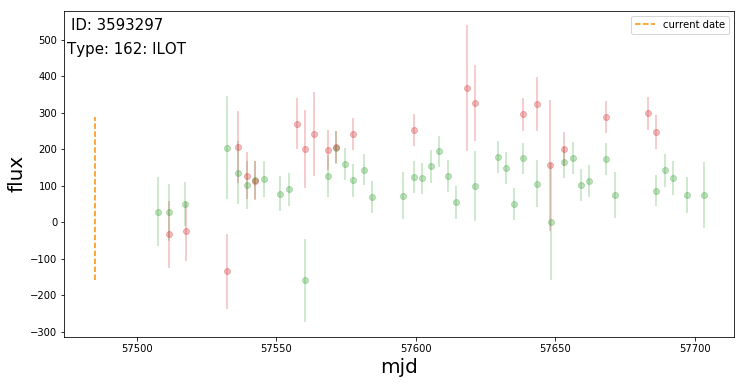

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.1878   r 357                 0 ...    59.7  28.56  14.481216 3601708
57433.2323   g 357                 0 ...   58.58   28.6  15.099848 3601708
57436.1484   g 357                 0 ...  111.28  28.92  15.099809 3601708
57436.1691   r 357                 0 ...   98.22  28.55  14.481175 3601708
  57443.21   r 357                 0 ...   83.59  28.42   14.48108 3601708
57443.2311   g 357                 0 ...  111.03  28.87  15.099712 3601708
57452.1901   r 357                 0 ...   47.83  28.45  14.480958 3601708
57455.2109   g 357                 0 ...   37.38   28.4  15.099549 3601708
57460.1476   r 357                 0 ...   52.87  28.49  14.480849 3601708
57460.1844   g 357                 0 ...   42.88  28.48  15.099482 3601708
       ... ...          ...      ... ...     ...    ...        ...     ...
57681.4591   r 357       

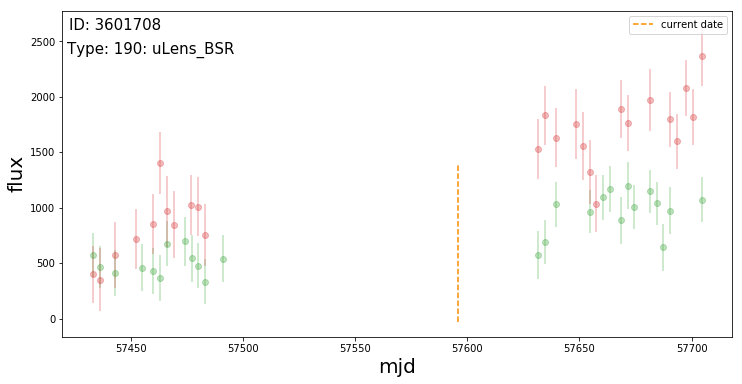

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57537.427   g 387                 0 ...   56.66  28.57   22.01229 3621793
57540.4383   r 387                 0 ...   46.65  28.59  21.485863 3621793
57540.4615   g 387                 0 ...    37.8  28.39  21.971249 3621793
 57543.421   r 387                 0 ...   43.92  28.61   21.43851 3621793
57543.4397   g 387                 0 ...   31.27  28.31  21.933332 3621793
57546.4206   g 387                 0 ...   32.99  28.35   21.89723 3621793
57552.4401   g 387                 0 ...    30.6   28.3  21.828077 3621793
57555.3151   r 387                 0 ...   81.19  28.58  21.266794 3621793
57555.3558   g 387                 0 ...   79.52  28.79   21.79622 3621793
57558.3764   r 387                 0 ...  125.31  28.59  21.226843 3621793
       ... ...          ...      ... ...     ...    ...        ...     ...
57669.1896   g 387       

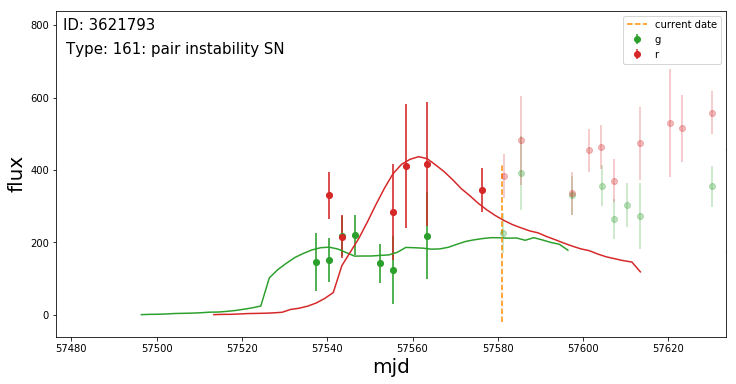

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4164   r 577                 0 ...   41.23  28.58   98.87589 3635316
57433.4215   g 577                 0 ...   24.21  28.13   98.87589 3635316
57436.3805   g 577                 0 ...   63.94  28.64   98.87589 3635316
57436.4147   r 577                 0 ...   60.79  28.56   98.87589 3635316
57439.4193   r 577                 0 ...  104.48  28.53   98.87589 3635316
57444.3996   g 577                 0 ...  110.04  28.84   98.87589 3635316
57451.3359   r 577                 0 ...   42.73  28.67   98.87589 3635316
 57451.378   g 577                 0 ...   24.29  28.13   98.87589 3635316
 57454.337   g 577                 0 ...   27.84  28.24   98.87589 3635316
57454.3578   r 577                 0 ...   41.48  28.59   98.87589 3635316
57459.3536   r 577              4096 ...   39.71  28.57   20.60269 3635316
57462.3344   r 577       

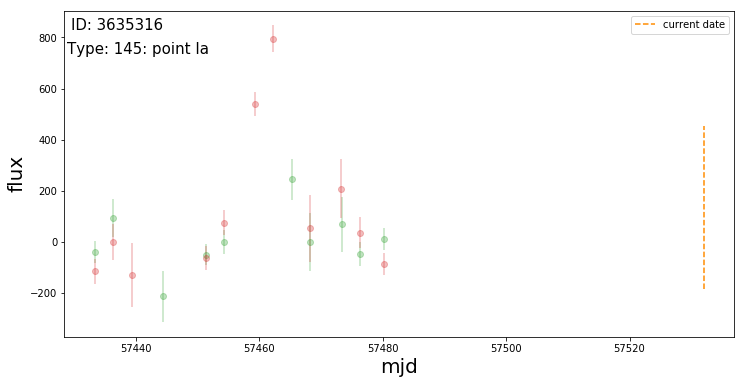

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57555.4426   g 446                 0 ...   36.37  28.45       99.0 3682501
57558.4196   g 446                 0 ...  152.21  29.15  24.054482 3682501
 57562.479   r 446                 0 ...   98.97  28.43  23.243029 3682501
57573.4573   g 446                 0 ...   30.71  28.28  21.794315 3682501
57576.4574   g 446                 0 ...   30.69  28.27  21.581644 3682501
57581.4622   r 446              4096 ...   43.92  28.63  21.392008 3682501
57585.4613   g 446              6144 ...   31.78  28.32   21.11737 3682501
57585.4826   r 446                 0 ...   72.99  28.57  21.198994 3682501
57597.3831   g 446              4096 ...   35.64  28.38  20.750618 3682501
 57597.467   r 446              4096 ...   51.94  28.58  20.792337 3682501
       ... ...          ...      ... ...     ...    ...        ...     ...
57683.2114   g 446       

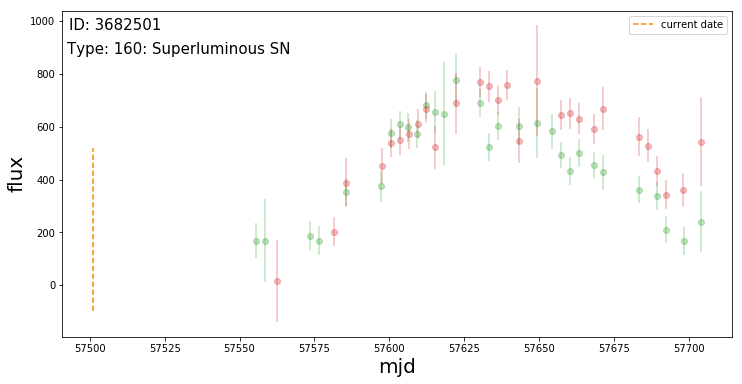

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.5449   g 533                 0 ...   28.99  28.26  99.233894 3689003
 57439.543   g 533                 0 ...    58.9  28.58  99.233894 3689003
57444.5219   r 533                 0 ...   85.78  28.62  99.233894 3689003
57444.5431   g 533                 0 ...  104.71  28.85  99.233894 3689003
57452.5235   g 533                 0 ...   31.83  28.28  99.233894 3689003
57452.5449   r 533                 0 ...   63.88  28.58  99.233894 3689003
57455.5019   g 533                 0 ...   25.78  28.19  99.233894 3689003
57455.5236   r 533                 0 ...   38.12   28.6  99.233894 3689003
57458.4804   r 533                 0 ...   39.23  28.65  99.233894 3689003
 57461.524   r 533                 0 ...   39.06  28.59  99.233894 3689003
       ... ...          ...      ... ...     ...    ...        ...     ...
57581.2335   r 533       

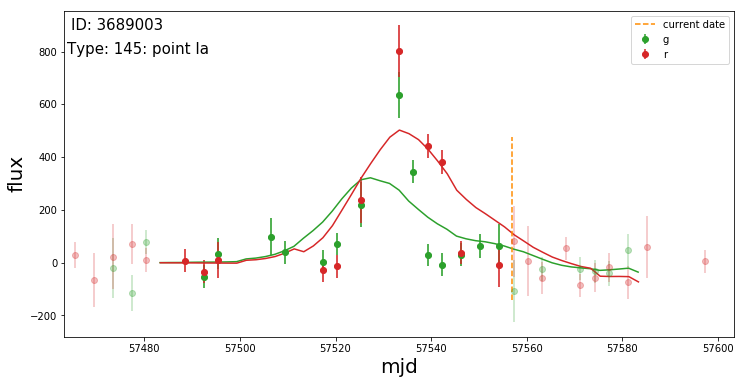

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57444.5384   r 851                 0 ...   84.04  28.45  17.222178 3712503
57444.5524   g 851              4096 ...  120.21  28.98   17.09763 3712503
57453.5392   g 851              6144 ...   41.17  28.43  17.716152 3712503
57453.5472   r 851              4096 ...   90.91  28.53  17.417805 3712503
57456.5433   g 851              4096 ...  212.57  29.26  17.181168 3712503
57461.5077   g 851                 0 ...    33.9  28.36  17.482119 3712503
57469.4694   r 851                 0 ...   98.05  28.45  17.213926 3712503
57469.4955   g 851              4096 ...  138.01  29.02   17.02398 3712503
57472.4669   r 851                 0 ...   98.26  28.53  17.107931 3712503
57475.4669   g 851              4096 ...   86.72  28.82  17.698433 3712503
       ... ...          ...      ... ...     ...    ...        ...     ...
57671.1751   g 851       

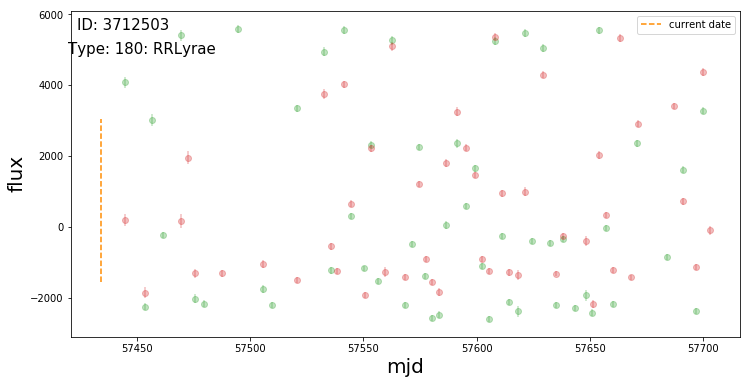

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57443.5409   r 683                 0 ...   75.05  28.55       99.0 3716243
57443.5489   g 683                 0 ...  124.36  28.92       99.0 3716243
57451.5309   g 683                 0 ...   36.89  28.32       99.0 3716243
57451.5482   r 683                 0 ...   63.19  28.62       99.0 3716243
57455.5068   g 683                 0 ...   28.95  28.25       99.0 3716243
 57455.541   r 683                 0 ...    37.1  28.46       99.0 3716243
57458.5367   g 683                 0 ...   26.36   28.2       99.0 3716243
57461.5052   g 683                 0 ...   24.34  28.13       99.0 3716243
57461.5385   r 683                 0 ...   39.06  28.59       99.0 3716243
57467.4667   g 683                 0 ...   74.16  28.72       99.0 3716243
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.0892   r 683       

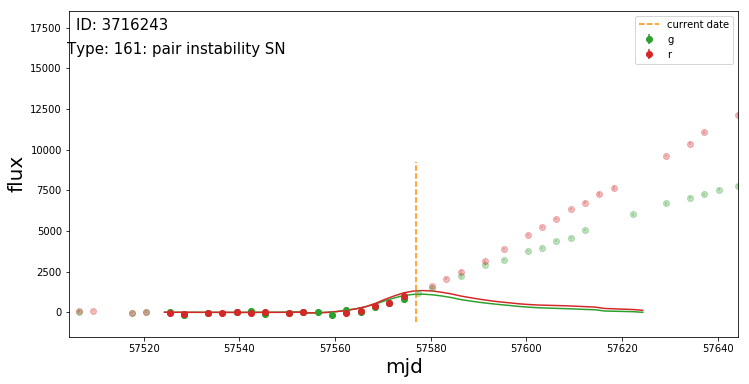

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5282   r 760                 0 ...   37.65  28.57       99.0 3718682
57434.5616   g 760                 0 ...    24.1  28.11       99.0 3718682
57437.4942   g 760                 0 ...   40.73  28.39       99.0 3718682
57437.5167   r 760                 0 ...   41.73  28.57       99.0 3718682
57443.4306   g 760                 0 ...  114.67  28.89       99.0 3718682
57443.5166   r 760                 0 ...   76.51  28.53       99.0 3718682
57451.4749   g 760                 0 ...   26.03  28.16       99.0 3718682
57451.4939   r 760                 0 ...   39.73  28.56       99.0 3718682
57454.4523   g 760                 0 ...   24.68  28.16       99.0 3718682
57454.4747   r 760                 0 ...   36.52  28.57       99.0 3718682
       ... ...          ...      ... ...     ...    ...        ...     ...
57613.1971   g 760       

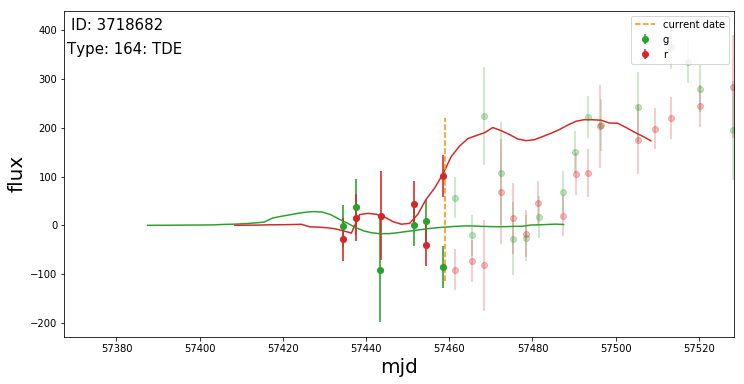

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1214   r 652                 0 ...    76.5  28.54       99.0 3735486
57434.1418   g 652                 0 ...   76.36  28.76       99.0 3735486
57437.1933   g 652                 0 ...  116.65  28.94       99.0 3735486
57440.1239   g 652                 0 ...  134.67  29.04       99.0 3735486
57443.1949   g 652                 0 ...   100.8   28.9       99.0 3735486
57452.1397   g 652                 0 ...   35.83  28.41       99.0 3735486
57455.1396   g 652                 0 ...   39.13  28.44       99.0 3735486
57461.1331   g 652                 0 ...   73.63  28.75       99.0 3735486
57461.1493   r 652                 0 ...   69.45  28.32       99.0 3735486
57467.1305   r 652                 0 ...   98.54  28.37       99.0 3735486
       ... ...          ...      ... ...     ...    ...        ...     ...
 57684.289   r 652       

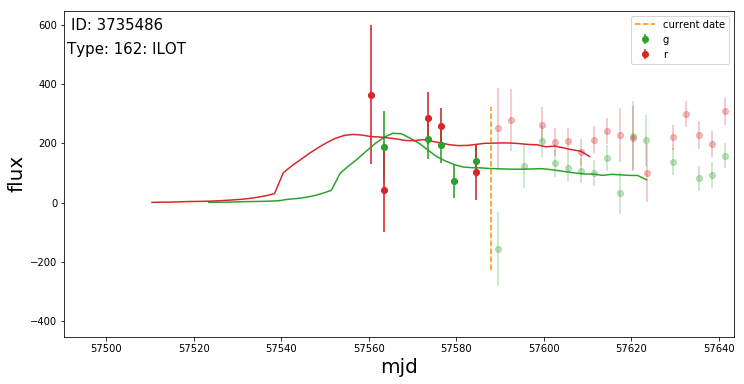

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4898   g 758              4096 ...   23.24   28.1   19.85404 3753105
57433.5179   r 758              6144 ...   36.29  28.55  20.129086 3753105
57436.4726   r 758              4096 ...   40.33  28.56  19.634441 3753105
57436.4981   g 758              4096 ...    24.3  28.11  19.267256 3753105
57439.4688   r 758              4096 ...   81.08  28.54   19.33533 3753105
57439.5087   g 758              4096 ...   90.81  28.73  19.069212 3753105
57443.4095   g 758              4096 ...  124.44  28.95  19.105627 3753105
57443.4721   r 758              4096 ...   82.19  28.53  19.255339 3753105
57451.4092   g 758              4096 ...   23.97  28.14  19.461979 3753105
57451.4503   r 758              4096 ...   36.15  28.55  19.353882 3753105
       ... ...          ...      ... ...     ...    ...        ...     ...
57584.1832   g 758       

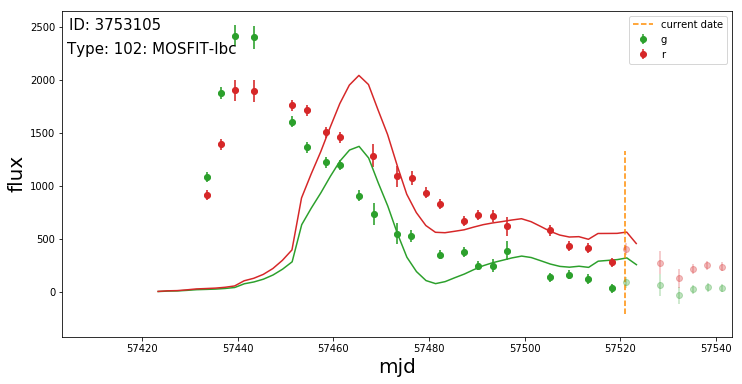

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57507.4392   g 279              4096 ...   68.42  28.72  17.771204 3761008
57533.3548   r 279                 0 ...  116.31  28.47  17.464508 3761008
57537.3355   g 279                 0 ...   45.78  28.51  17.992174 3761008
57537.3771   r 279                 0 ...   57.05  28.45  17.623423 3761008
57543.3133   g 279                 0 ...   40.07  28.45  18.002615 3761008
57543.3346   r 279                 0 ...   50.42  28.49  17.629032 3761008
57546.2939   g 279              6144 ...   39.56  28.45  17.808092 3761008
57555.2523   g 279              4096 ...   138.2  29.08  17.550083 3761008
57555.2722   r 279              4096 ...  115.32  28.47  17.322342 3761008
{'g': array([0., 0., 0.]), 'r': array([0., 0., 0.])}


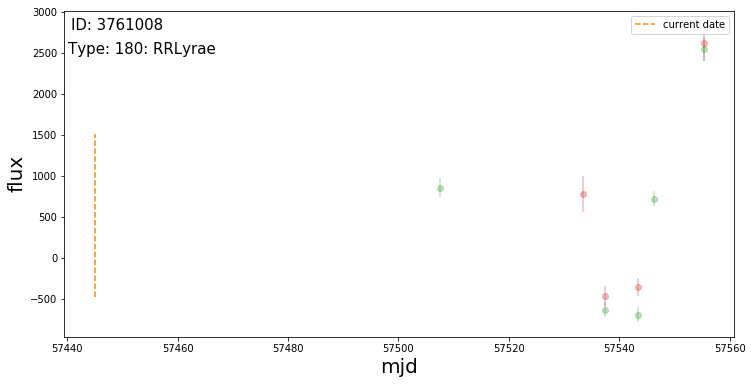

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
  57456.39   g 865                 0 ...   37.38  28.39    99.3059 3782723
57456.4272   r 865                 0 ...   46.93  28.55    99.3059 3782723
  57467.37   r 865                 0 ...    90.9   28.5    99.3059 3782723
57467.4311   g 865                 0 ...   98.42  28.84    99.3059 3782723
57473.3905   g 865                 0 ...  138.48  29.05    99.3059 3782723
57473.5141   r 865                 0 ...   79.11  28.58    99.3059 3782723
57477.4266   g 865                 0 ...   57.64  28.62    99.3059 3782723
57477.4667   r 865                 0 ...   58.09  28.49    99.3059 3782723
57481.3716   r 865                 0 ...   44.92  28.53    99.3059 3782723
57481.5166   g 865                 0 ...   36.85  28.39    99.3059 3782723
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.1388   g 865       

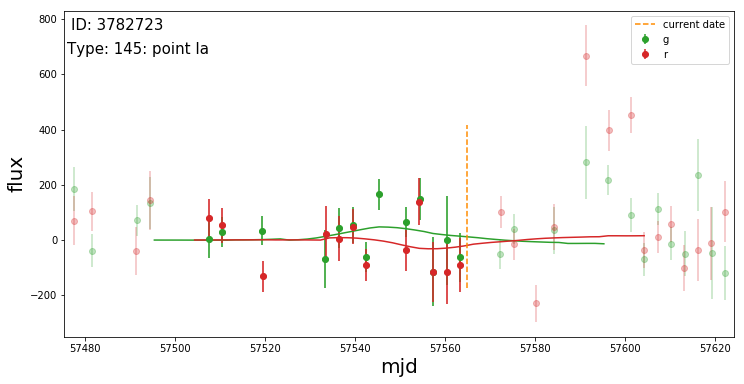

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1127   r 694                 0 ...   76.67   28.5       99.0 3795012
57434.1385   g 694                 0 ...   76.28  28.78       99.0 3795012
57438.1354   g 694                 0 ...  153.63  29.13       99.0 3795012
57533.4765   r 694                 0 ...   76.98  28.39       99.0 3795012
57537.4465   r 694                 0 ...   63.52  28.54       99.0 3795012
 57537.474   g 694                 0 ...   56.92  28.55       99.0 3795012
57541.4793   g 694                 0 ...   41.12  28.39       99.0 3795012
57551.4562   g 694                 0 ...   30.41  28.23       99.0 3795012
57551.4661   r 694                 0 ...   45.94  28.53       99.0 3795012
57554.4509   g 694                 0 ...   33.77  28.34       99.0 3795012
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.3232   r 694       

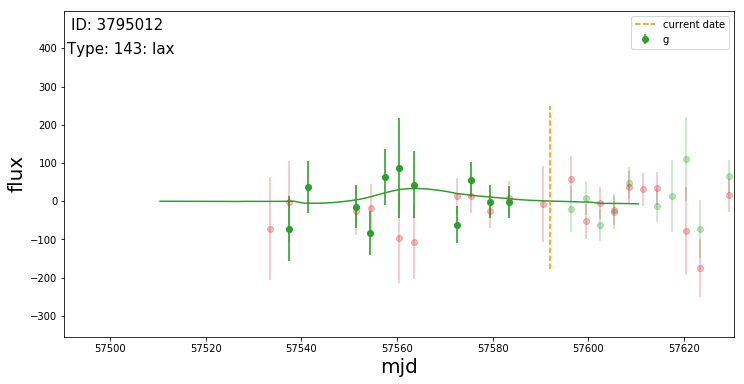

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57511.4755   g 493                 0 ...   44.73  28.44       99.0 3812379
57511.4861   r 493                 0 ...   62.72  28.57       99.0 3812379
57517.4596   g 493                 0 ...   34.42  28.38       99.0 3812379
57517.4813   r 493                 0 ...   60.26  28.63       99.0 3812379
57533.4446   g 493                 0 ...  122.82  28.99       99.0 3812379
57533.4638   r 493                 0 ...   89.39  28.49       99.0 3812379
57537.4568   r 493                 0 ...   69.58  28.47       99.0 3812379
57537.4616   g 493                 0 ...   68.44  28.69       99.0 3812379
57540.4648   g 493                 0 ...   36.89  28.37       99.0 3812379
57543.4636   r 493                 0 ...   42.85  28.56       99.0 3812379
       ... ...          ...      ... ...     ...    ...        ...     ...
57664.2337   r 493       

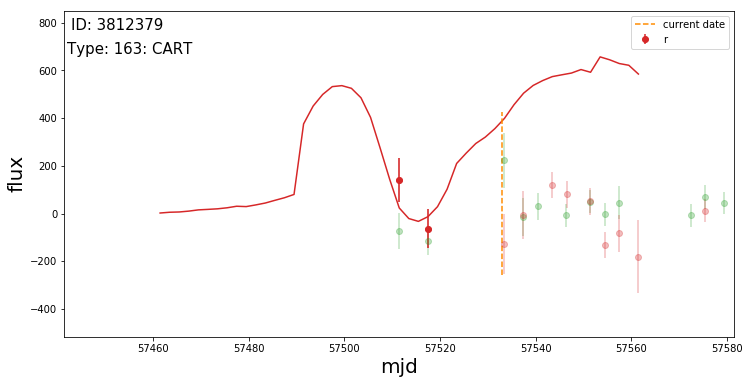

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4135   r 673                 0 ...   39.26  28.55       99.0 3812605
57433.4235   g 673                 0 ...   22.86  28.08       99.0 3812605
 57436.382   g 673                 0 ...   59.07  28.57       99.0 3812605
57436.4559   r 673                 0 ...   46.87   28.5       99.0 3812605
57439.3744   r 673                 0 ...  103.38  28.58       99.0 3812605
57439.4011   g 673                 0 ...  196.74  29.11       99.0 3812605
57443.3557   r 673                 0 ...  108.81   28.6       99.0 3812605
57451.3397   r 673                 0 ...    40.7  28.61       99.0 3812605
57451.3795   g 673                 0 ...   22.97  28.08       99.0 3812605
57454.3389   g 673                 0 ...   25.93  28.18       99.0 3812605
       ... ...          ...      ... ...     ...    ...        ...     ...
57558.1936   r 673       

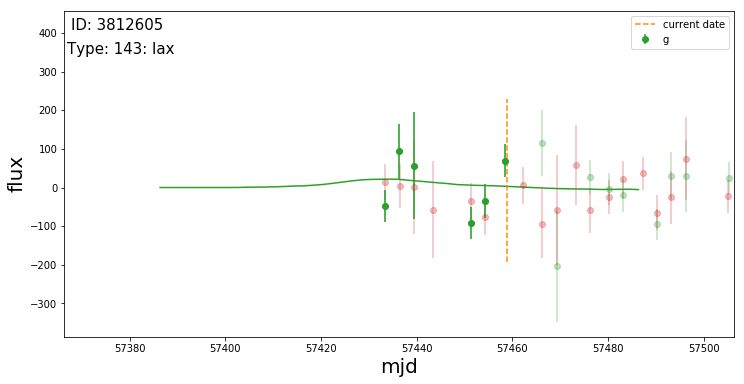

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57533.4601   r 339                 0 ...  117.59  28.53   98.84717 3818102
57537.4413   r 339                 0 ...   81.92  28.48   98.84717 3818102
57537.4766   g 339                 0 ...   75.97   28.7   98.84717 3818102
57555.3572   g 339                 0 ...   91.99  28.91   98.84717 3818102
57558.4172   g 339                 0 ...  147.91   29.1   98.84717 3818102
 57576.379   g 339                 0 ...   36.37  28.39   98.84717 3818102
57585.3384   g 339                 0 ...   97.51   28.9   98.84717 3818102
57585.3562   r 339                 0 ...   77.23  28.51   98.84717 3818102
57597.3779   g 339                 0 ...   39.26   28.4   98.84717 3818102
57597.3986   r 339                 0 ...   49.82  28.51   98.84717 3818102
       ... ...          ...      ... ...     ...    ...        ...     ...
57664.2522   g 339       

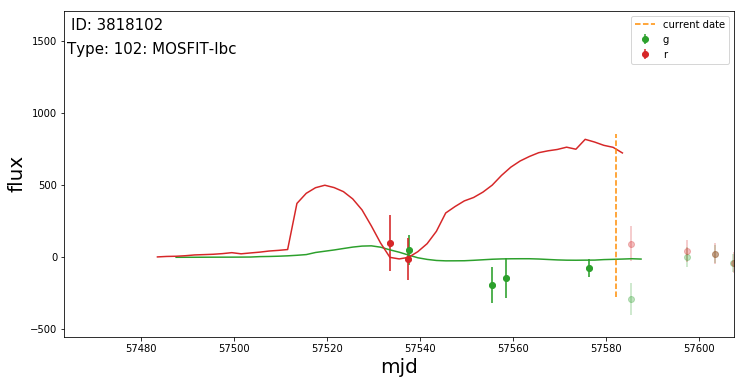

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2197   r 839                 0 ...   55.67  28.58       99.0 3836848
57433.2635   g 839                 0 ...   45.72  28.48       99.0 3836848
57436.2001   r 839                 0 ...   73.67  28.58       99.0 3836848
57436.2383   g 839                 0 ...   81.78  28.75       99.0 3836848
57439.2545   g 839                 0 ...  135.11   29.0       99.0 3836848
57439.2994   r 839                 0 ...  106.49  28.48       99.0 3836848
 57443.237   g 839                 0 ...  100.49  28.86       99.0 3836848
 57443.263   r 839                 0 ...    81.1   28.6       99.0 3836848
57451.1994   g 839                 0 ...   28.09  28.24       99.0 3836848
57451.2423   r 839                 0 ...   45.15  28.61       99.0 3836848
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4072   g 839       

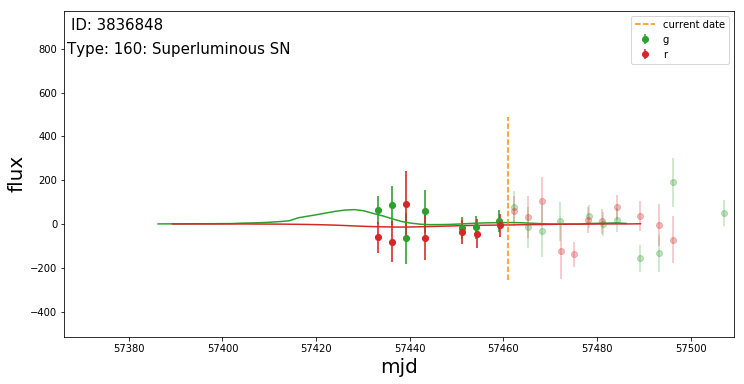

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57443.5603   g 589                 0 ...  135.92  28.97   98.18269 3865513
57456.5076   g 589                 0 ...   33.59  28.37   98.18269 3865513
57456.5262   r 589                 0 ...   40.51  28.51   98.18269 3865513
57459.5188   r 589                 0 ...    40.5   28.5   98.18269 3865513
57462.5191   g 589                 0 ...   27.45  28.16   98.18269 3865513
57462.5274   r 589                 0 ...   41.67  28.57   98.18269 3865513
57465.5179   g 589                 0 ...   31.19  28.28   98.18269 3865513
57465.5284   r 589                 0 ...   42.27  28.53   98.18269 3865513
57469.5045   g 589                 0 ...   101.3  28.85   98.18269 3865513
57472.4825   r 589                 0 ...   87.97  28.63   98.18269 3865513
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.1032   r 589       

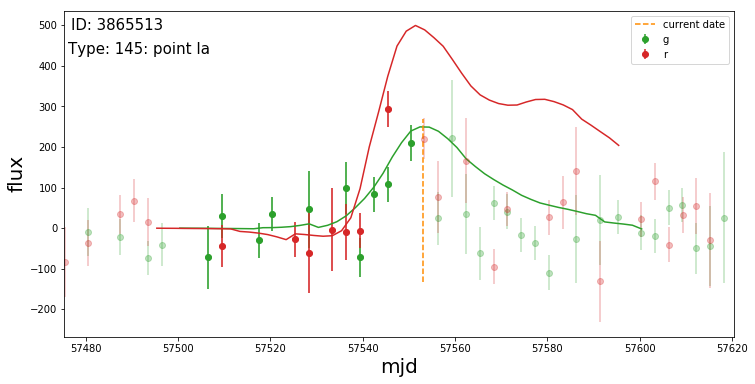

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57443.5217   r 538                 0 ...   86.48  28.63   19.57349 3878952
57456.5071   g 538                 0 ...    32.6   28.3  20.709723 3878952
57456.5253   r 538                 0 ...   41.23  28.53  19.572649 3878952
57459.5183   r 538                 0 ...   40.85  28.52  19.573412 3878952
57462.5201   g 538              4096 ...   28.37  28.19  20.144749 3878952
57462.5265   r 538              4096 ...    43.3  28.59  19.298538 3878952
57470.4773   r 538                 0 ...   97.32  28.43  19.572514 3878952
57473.4827   r 538                 0 ...   85.77  28.64  19.572649 3878952
57477.4826   g 538                 0 ...   71.52   28.7   20.69199 3878952
 57480.504   r 538                 0 ...   48.27   28.5  19.570478 3878952
       ... ...          ...      ... ...     ...    ...        ...     ...
57672.1057   r 538       

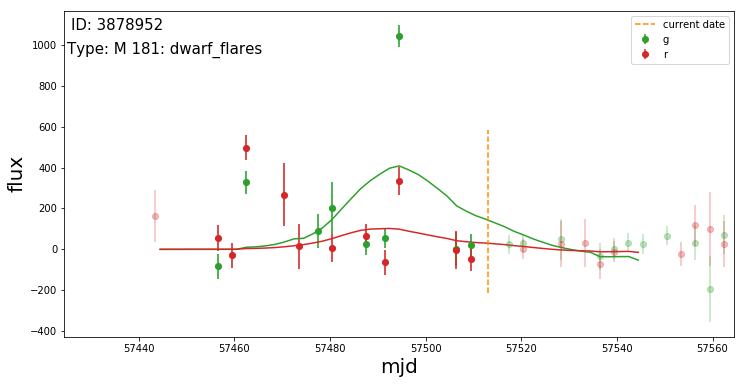

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2273   r 515                 0 ...   55.23  28.58  21.637508 3939447
57433.2526   g 515                 0 ...   42.45   28.4  22.230679 3939447
57439.2957   r 515                 0 ...  153.48  28.51  21.615368 3939447
57444.1883   r 515                 0 ...   49.81   28.6  21.601343 3939447
57444.2493   g 515                 0 ...   61.28   28.6  22.254284 3939447
57451.1911   g 515                 0 ...   25.71  28.17  22.276438 3939447
57451.2104   r 515                 0 ...    41.8   28.6  21.586348 3939447
57454.1909   g 515                 0 ...   25.89  28.18  22.287544 3939447
57454.2099   r 515              4096 ...   42.24  28.61  21.581684 3939447
57459.2079   r 515              6144 ...   41.75  28.62  21.575855 3939447
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4785   g 515       

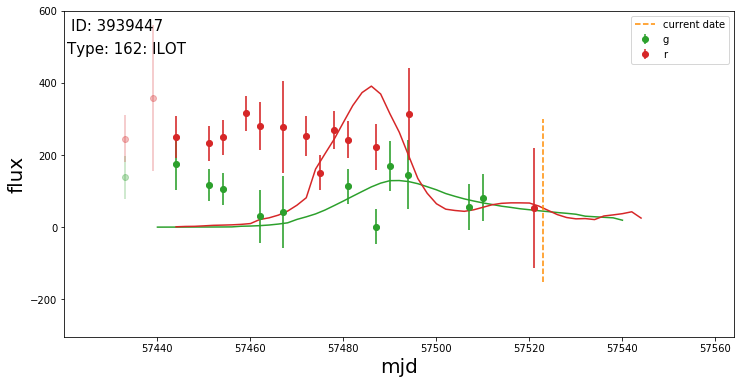

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5525   g 798                 0 ...   30.68  28.28   98.85941 3942386
57444.5368   r 798                 0 ...    68.7  28.48   98.85941 3942386
57444.5539   g 798                 0 ...  101.95  28.86   98.85941 3942386
57452.5406   g 798                 0 ...   32.15  28.29  26.201515 3942386
57455.5088   g 798                 0 ...    28.8  28.21  25.373804 3942386
57455.5385   r 798                 0 ...    39.9  28.55  25.057255 3942386
57459.5106   r 798                 0 ...   41.09   28.6  24.281586 3942386
 57459.534   g 798                 0 ...    27.1  28.19  24.470547 3942386
57467.4453   r 798                 0 ...   78.84  28.59  22.558205 3942386
 57467.493   g 798                 0 ...   52.02  28.53  22.303366 3942386
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.1156   g 798       

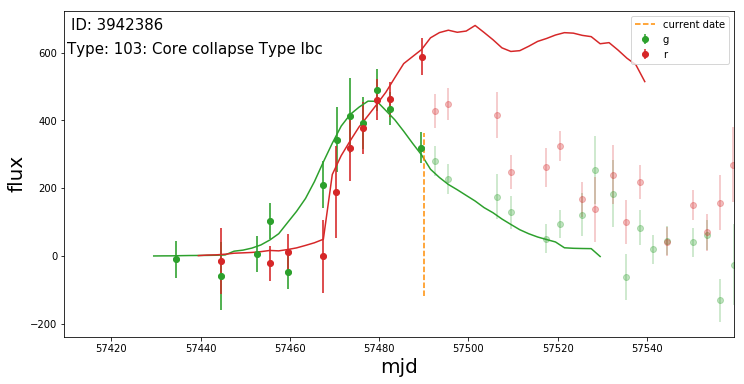

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1592   g 701              4096 ...   68.03  28.62   18.36153 3956131
57434.1835   r 701              6144 ...    82.7  28.61   18.15789 3956131
57437.1728   r 701              4096 ...   94.34   28.6  18.204945 3956131
57437.2019   g 701              4096 ...  105.11  28.85  18.415192 3956131
57440.1167   g 701              4096 ...   95.42  28.75  18.382084 3956131
57443.1357   g 701              4096 ...   31.75  28.26  18.363783 3956131
57452.1329   g 701              4096 ...    26.0   28.2  18.351915 3956131
 57455.132   g 701              4096 ...   26.07  28.13  18.352205 3956131
57455.1623   r 701              4096 ...    40.3  28.59  18.148798 3956131
57460.1529   r 701              4096 ...   58.26  28.59  18.171816 3956131
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4107   g 701       

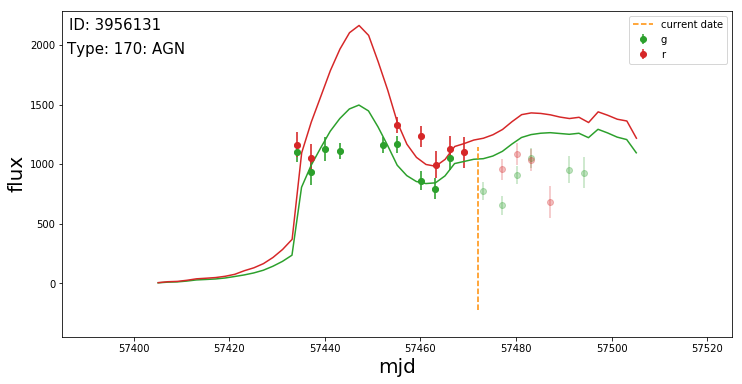

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2631   g 814              4096 ...   42.21  28.37  18.463314 3956303
57433.2877   r 814                 0 ...   50.97  28.51  18.153595 3956303
57436.2006   r 814              6144 ...   71.34  28.49  18.142263 3956303
57436.2378   g 814                 0 ...   78.27  28.66  18.451757 3956303
57439.2998   r 814                 0 ...  115.82  28.53  18.144619 3956303
57443.2375   g 814              4096 ...   92.01  28.74  18.484753 3956303
57443.2843   r 814              4096 ...   78.77  28.53  18.172384 3956303
57451.1702   r 814              4096 ...   39.58   28.5  18.183043 3956303
57451.2646   g 814              4096 ...   27.19   28.2  18.498327 3956303
57454.2429   r 814              4096 ...   43.37  28.53  18.220692 3956303
       ... ...          ...      ... ...     ...    ...        ...     ...
 57687.473   g 814       

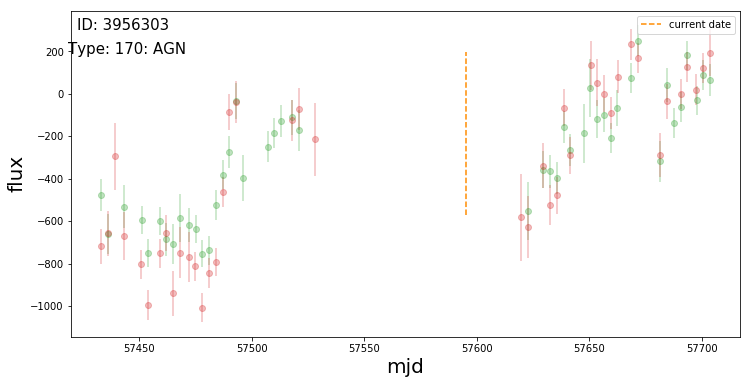

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5592   g 847                 0 ...    30.5   28.3       99.0 3975920
57437.4552   g 847                 0 ...   79.33  28.72       99.0 3975920
57443.5323   r 847                 0 ...   76.04   28.6       99.0 3975920
57452.5128   r 847                 0 ...   42.97  28.61       99.0 3975920
57452.5356   g 847                 0 ...   32.54  28.31       99.0 3975920
57455.3266   g 847                 0 ...    38.3  28.44       99.0 3975920
57455.4855   r 847                 0 ...   41.76  28.63       99.0 3975920
57460.3693   g 847                 0 ...   32.62  28.34       99.0 3975920
57460.4095   r 847                 0 ...   42.66  28.58       99.0 3975920
57463.4957   g 847                 0 ...   27.99  28.25       99.0 3975920
       ... ...          ...      ... ...     ...    ...        ...     ...
57664.1773   g 847       

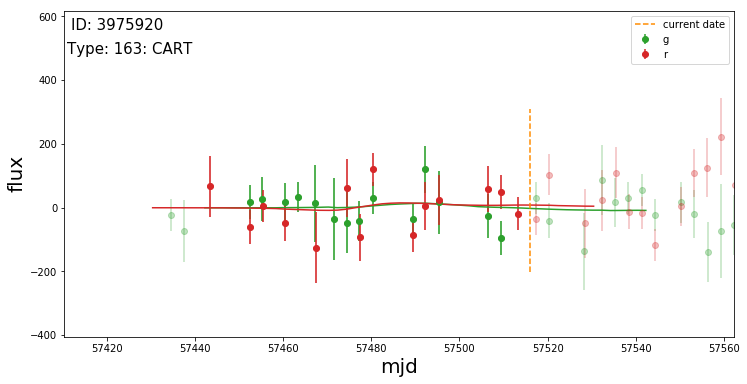

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5277   r 761                 0 ...   39.23  28.61       99.0 3991684
57434.5574   g 761                 0 ...    24.8  28.13       99.0 3991684
57437.5314   g 761                 0 ...   28.04  28.21       99.0 3991684
57437.5565   r 761                 0 ...   41.69  28.56       99.0 3991684
57443.4563   g 761                 0 ...  114.43  28.89       99.0 3991684
57443.5108   r 761                 0 ...   75.95  28.58       99.0 3991684
57451.5089   r 761                 0 ...   40.55  28.57       99.0 3991684
57451.5404   g 761                 0 ...   31.33  28.23       99.0 3991684
57454.4929   r 761                 0 ...   36.67  28.58       99.0 3991684
57454.5283   g 761                 0 ...   24.09  28.11       99.0 3991684
       ... ...          ...      ... ...     ...    ...        ...     ...
57658.1238   r 761       

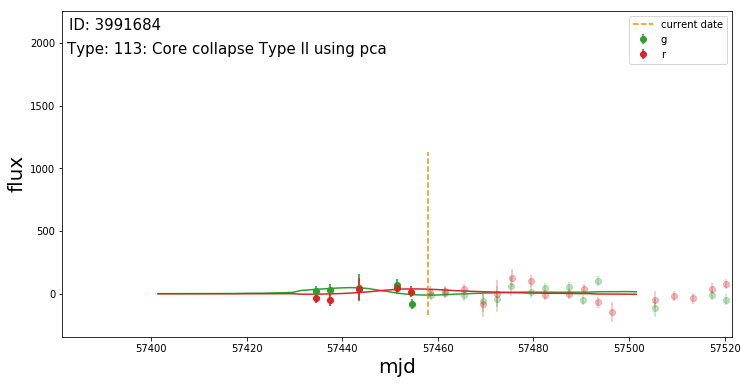

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5559   g 762                 0 ...    25.8  28.18   98.87425 4041753
  57437.53   g 762                 0 ...   28.22  28.25   98.87425 4041753
57443.5362   r 762                 0 ...   74.72  28.58   98.87425 4041753
57443.5528   g 762                 0 ...   111.9  28.85   98.87425 4041753
57451.5118   r 762                 0 ...   42.22   28.6   98.87425 4041753
57451.5359   g 762                 0 ...   32.03  28.25   98.87425 4041753
57454.5157   r 762                 0 ...   37.47  28.59   98.87425 4041753
57454.5302   g 762                 0 ...   24.59  28.13   98.87425 4041753
57458.4937   r 762                 0 ...   37.75   28.6   98.87425 4041753
57458.5099   g 762                 0 ...   24.06  28.13   98.87425 4041753
       ... ...          ...      ... ...     ...    ...        ...     ...
57544.3902   g 762       

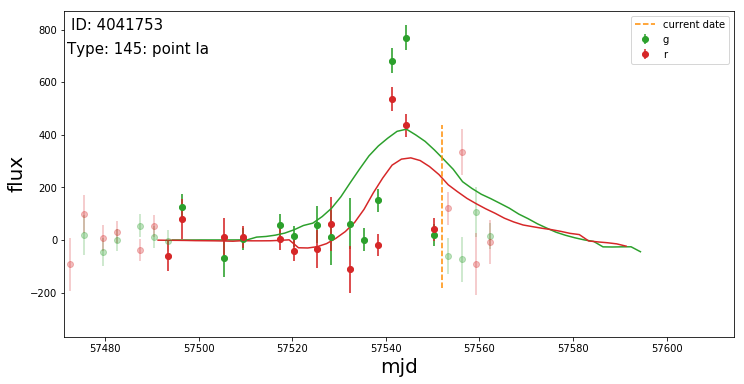

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57458.5333   g 728                 0 ...   31.72  28.28       99.0 4043270
57458.5471   r 728                 0 ...  109.92  28.58       99.0 4043270
57461.5062   g 728                 0 ...   30.08  28.33       99.0 4043270
57461.5376   r 728                 0 ...   40.42  28.47       99.0 4043270
57469.4966   g 728                 0 ...  134.88   29.0       99.0 4043270
57472.4986   r 728                 0 ...   83.23  28.48       99.0 4043270
 57472.532   g 728                 0 ...  143.85  28.97       99.0 4043270
57475.5193   r 728                 0 ...   60.76  28.52       99.0 4043270
57479.5143   g 728                 0 ...   45.16  28.41       99.0 4043270
 57479.525   r 728                 0 ...  101.61  28.62       99.0 4043270
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.1435   r 728       

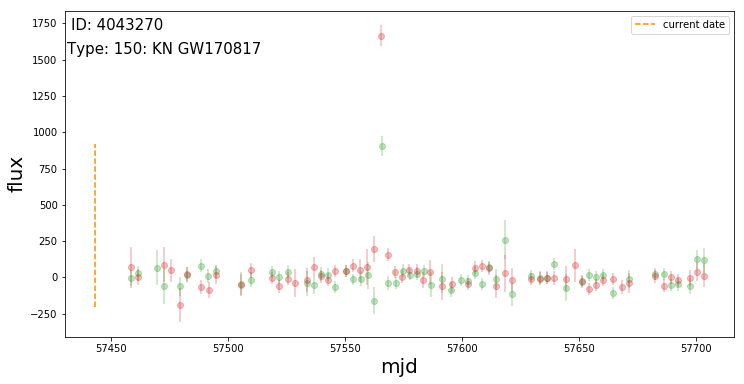

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.3985   r 424                 0 ...   45.41  28.59       99.0 4050523
57434.4383   g 424                 0 ...   28.96  28.28       99.0 4050523
57437.3974   r 424                 0 ...   72.27  28.55       99.0 4050523
57437.4396   g 424                 0 ...   73.77  28.71       99.0 4050523
57452.3961   g 424                 0 ...   28.69  28.27       99.0 4050523
57452.4193   r 424                 0 ...   42.42  28.59       99.0 4050523
57456.3372   r 424              4096 ...   47.64  28.59  20.696985 4050523
57456.3763   g 424              6144 ...   29.88   28.3  21.373867 4050523
57460.3984   r 424                 0 ...   42.38  28.59  22.078123 4050523
 57466.296   g 424                 0 ...  100.48  28.86  28.728539 4050523
       ... ...          ...      ... ...     ...    ...        ...     ...
57544.1894   g 424       

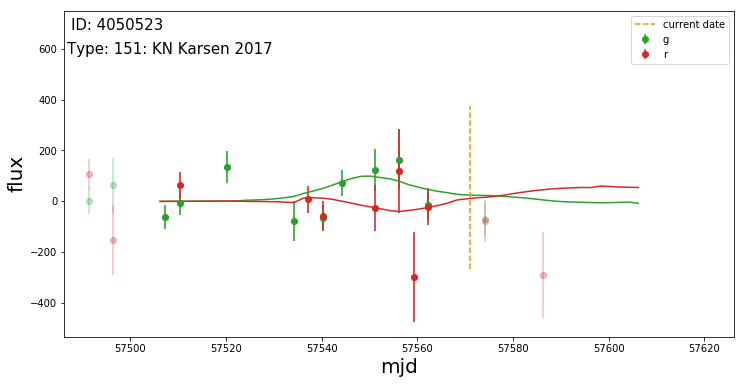

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57472.4996   r 641                 0 ...   95.01  28.43   98.47551 4071977
57475.5207   r 641                 0 ...   65.54  28.45   98.47551 4071977
57479.5067   g 641                 0 ...   54.49  28.61   98.47551 4071977
57482.4935   r 641                 0 ...   45.86  28.52   98.47551 4071977
57487.4866   g 641                 0 ...   32.56  28.36   98.47551 4071977
57487.5055   r 641                 0 ...   47.45  28.64   98.47551 4071977
 57490.484   g 641                 0 ...   28.83  28.28   98.47551 4071977
57490.5053   r 641                 0 ...   50.41   28.6   98.47551 4071977
 57494.487   g 641                 0 ...   29.86  28.23   98.47551 4071977
57494.5083   r 641                 0 ...   56.78  28.54   98.47551 4071977
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.1248   g 641       

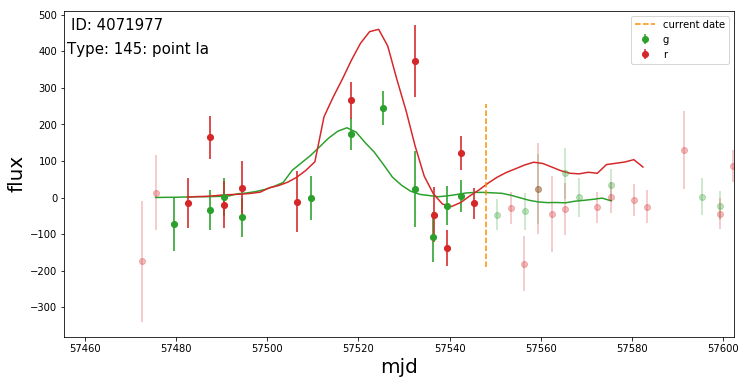

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57435.119   g 693                 0 ...  107.03  28.98       99.0 4150955
57533.4583   g 693                 0 ...  108.15  28.88       99.0 4150955
57533.4788   r 693                 0 ...   72.21  28.44       99.0 4150955
57536.4658   r 693                 0 ...   69.41  28.48       99.0 4150955
57543.4525   g 693                 0 ...   32.59  28.27       99.0 4150955
57543.4697   r 693                 0 ...   45.33  28.49       99.0 4150955
57546.4486   g 693                 0 ...   30.69  28.29       99.0 4150955
57546.4671   r 693                 0 ...   45.82  28.61       99.0 4150955
57551.4439   g 693                 0 ...   28.27  28.22       99.0 4150955
57551.4773   r 693                 0 ...    42.9  28.51       99.0 4150955
       ... ...          ...      ... ...     ...    ...        ...     ...
57683.2153   g 693       

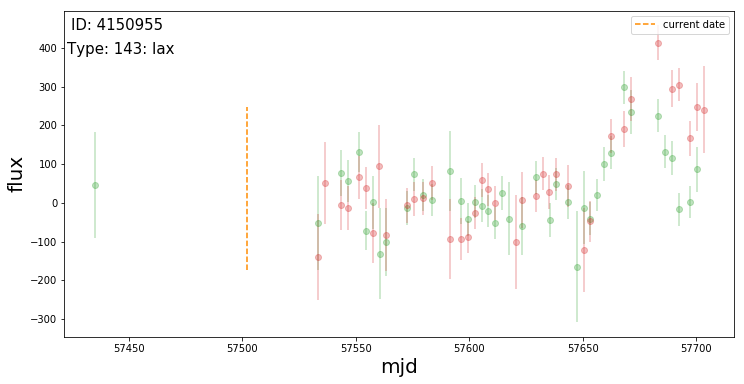

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57435.2937   g 265              4096 ...   82.53  28.83  16.610008 4223670
57435.3144   r 265              4096 ...   76.27  28.48   16.36916 4223670
57438.2717   g 265              6144 ...   158.6  29.14  16.319447 4223670
57444.2727   g 265              4096 ...  107.36  28.96  16.691837 4223670
57444.2932   r 265              4096 ...  101.04  28.47     16.454 4223670
 57452.254   g 265                 0 ...   40.87  28.48  16.536688 4223670
57455.2519   r 265              4096 ...   55.01   28.5   16.13888 4223670
57455.2737   g 265              4096 ...   39.33  28.44  16.294136 4223670
57460.2102   r 265              4096 ...   52.79  28.48  16.151957 4223670
57460.2736   g 265              4096 ...   40.83  28.46  16.205187 4223670
       ... ...          ...      ... ...     ...    ...        ...     ...
57473.2729   r 265       

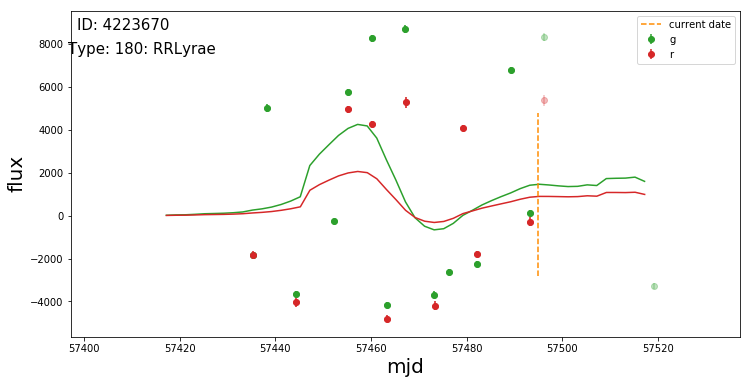

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57439.5013   g 485                 0 ...   137.1   29.1       99.0 4232266
57453.5441   r 485                 0 ...   75.48  28.58       99.0 4232266
57460.5019   g 485                 0 ...   27.93  28.24       99.0 4232266
57460.5225   r 485                 0 ...    42.2  28.61       99.0 4232266
57469.5006   g 485                 0 ...   103.4  28.87       99.0 4232266
57473.4817   r 485                 0 ...   92.22   28.6       99.0 4232266
57477.4788   r 485                 0 ...   80.84  28.43       99.0 4232266
57477.4807   g 485                 0 ...   71.34  28.69       99.0 4232266
57482.4814   r 485                 0 ...   40.27  28.55       99.0 4232266
57482.5024   g 485                 0 ...   28.58   28.2       99.0 4232266
       ... ...          ...      ... ...     ...    ...        ...     ...
 57634.168   r 485       

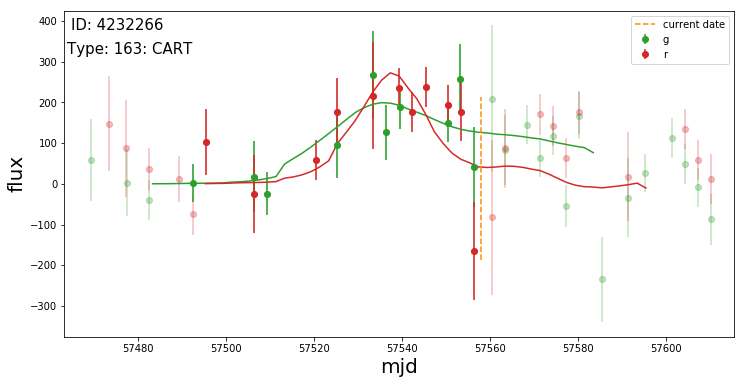

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1117   r 649                 0 ...   74.11  28.45       99.0 4239374
57434.1394   g 649                 0 ...   77.73  28.82       99.0 4239374
57438.1349   g 649                 0 ...  149.89  29.08       99.0 4239374
 57533.477   r 649                 0 ...   85.71  28.37       99.0 4239374
57537.4461   r 649                 0 ...   66.98  28.49       99.0 4239374
57537.4745   g 649                 0 ...   61.19  28.59       99.0 4239374
 57546.451   g 649                 0 ...   36.57  28.39       99.0 4239374
 57546.475   r 649                 0 ...   49.15  28.53       99.0 4239374
57551.4566   g 649                 0 ...   32.83  28.29       99.0 4239374
57551.4651   r 649                 0 ...   47.99  28.51       99.0 4239374
       ... ...          ...      ... ...     ...    ...        ...     ...
57683.2877   r 649       

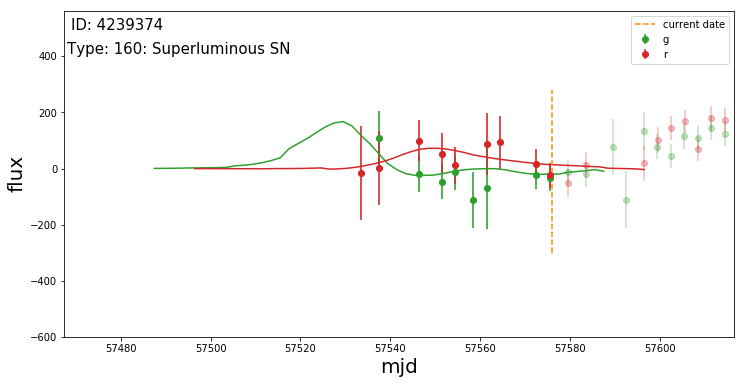

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1597   g 700                 0 ...   70.38  28.67  22.031696 4249823
57434.1705   r 700                 0 ...   80.37  28.48  21.952044 4249823
57438.2193   g 700                 0 ...  129.67  28.95  21.765001 4249823
57443.1352   g 700                 0 ...   32.68  28.31  21.535606 4249823
57452.1325   g 700              4096 ...   26.77  28.18  21.292677 4249823
57455.1315   g 700              6144 ...   28.81  28.23   21.25211 4249823
57455.1628   r 700              4096 ...   41.29  28.56  21.043797 4249823
57460.1421   g 700                 0 ...   51.43  28.51   21.21307 4249823
57463.1437   g 700                 0 ...   66.68  28.67  21.210228 4249823
57463.1646   r 700                 0 ...   67.08  28.55  20.942728 4249823
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4112   g 700       

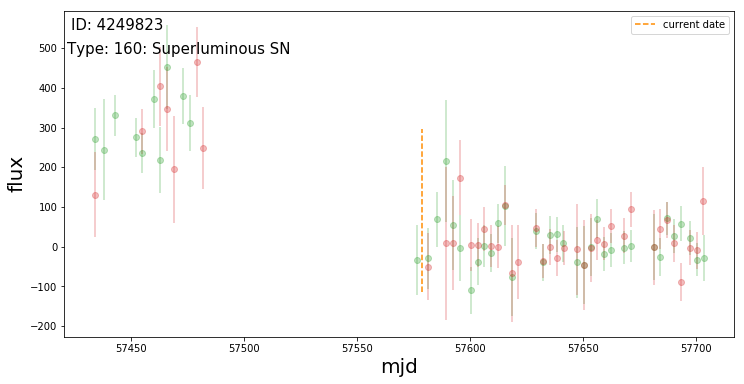

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1321   g 605                 0 ...   73.33  28.67   98.54209 4250863
57434.1715   r 605                 0 ...    79.0  28.45   98.54209 4250863
57438.1439   g 605                 0 ...  125.92  29.01   98.54209 4250863
57444.1314   g 605                 0 ...   35.66  28.34   98.54209 4250863
57452.1406   g 605                 0 ...   35.02  28.41   98.54209 4250863
57455.1415   g 605                 0 ...   37.72  28.44   98.54209 4250863
57461.1317   g 605                 0 ...   69.16   28.7   98.54209 4250863
57461.1488   r 605                 0 ...   74.04  28.37   98.54209 4250863
57467.1301   r 605                 0 ...   96.54  28.43   98.54209 4250863
57573.4424   g 605              4096 ...   43.19  28.54  20.259798 4250863
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.2595   g 605       

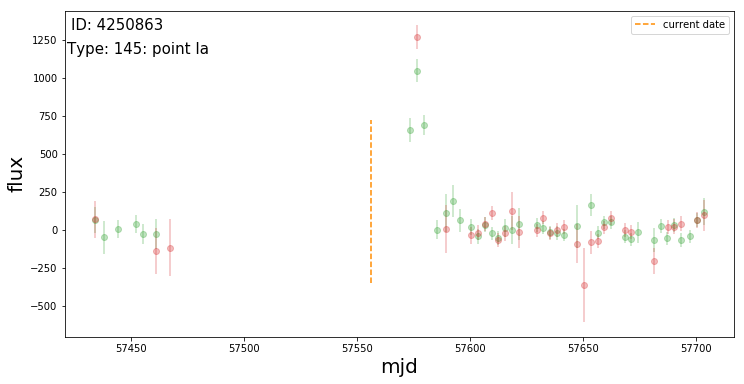

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1242   r 556                 0 ...   89.31  28.65  20.180943 4257003
57434.1302   g 556                 0 ...    71.3  28.63  20.329243 4257003
57438.1453   g 556                 0 ...   122.2  28.98  20.335548 4257003
57444.1305   g 556                 0 ...   33.99  28.28  20.313828 4257003
57452.1421   g 556                 0 ...   32.97  28.35   20.30816 4257003
57455.1424   g 556                 0 ...   37.22  28.46   20.29697 4257003
57462.1287   r 556                 0 ...   74.21  28.42  20.159462 4257003
  57462.15   g 556                 0 ...   89.71  28.78  20.305868 4257003
57466.1296   r 556                 0 ...   87.63  28.43  20.167473 4257003
57466.1633   g 556                 0 ...  120.68  29.11  20.314447 4257003
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.3718   g 556       

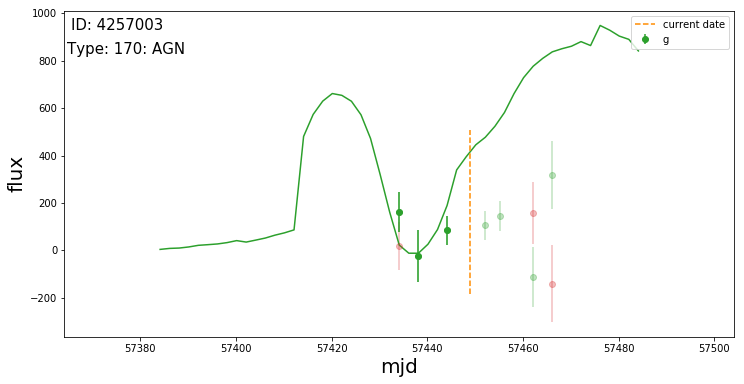

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1113   r 601                 0 ...   80.03   28.5       99.0 4263243
57434.1399   g 601                 0 ...    84.4  28.88       99.0 4263243
57438.1345   g 601                 0 ...  153.09  29.12       99.0 4263243
57533.4774   r 601                 0 ...    90.9  28.37       99.0 4263243
57537.4456   r 601                 0 ...   69.63  28.49       99.0 4263243
57537.4749   g 601                 0 ...    62.7  28.61       99.0 4263243
57551.4571   g 601                 0 ...   33.73  28.28       99.0 4263243
57551.4646   r 601                 0 ...   50.24  28.57       99.0 4263243
57555.4459   g 601                 0 ...   36.96   28.4       99.0 4263243
57558.4701   g 601                 0 ...   99.19  28.84       99.0 4263243
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.3266   r 601       

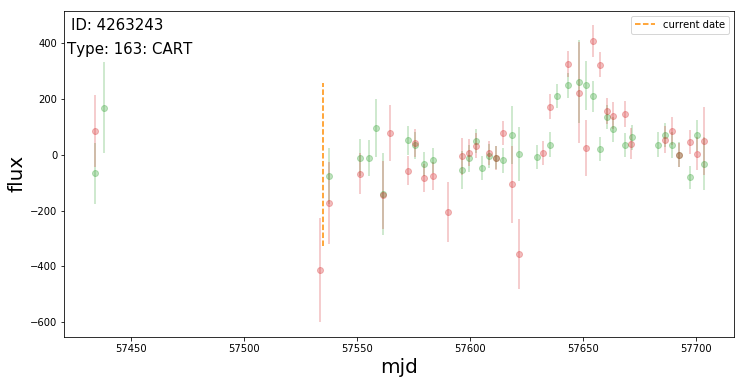

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2385   g 836                 0 ...   52.86  28.53       99.0 4270751
57436.1373   r 836                 0 ...   76.62   28.6       99.0 4270751
57436.1617   g 836                 0 ...   82.68  28.72       99.0 4270751
57439.1402   r 836                 0 ...   89.24  28.61       99.0 4270751
57439.1775   g 836                 0 ...  138.79   29.0       99.0 4270751
57443.1982   g 836                 0 ...    86.3  28.82       99.0 4270751
57443.2759   r 836                 0 ...   89.11  28.46       99.0 4270751
57451.2029   g 836                 0 ...   33.34  28.34       99.0 4270751
57454.1563   r 836                 0 ...   44.21  28.57       99.0 4270751
 57454.201   g 836                 0 ...   34.37  28.37       99.0 4270751
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.3658   g 836       

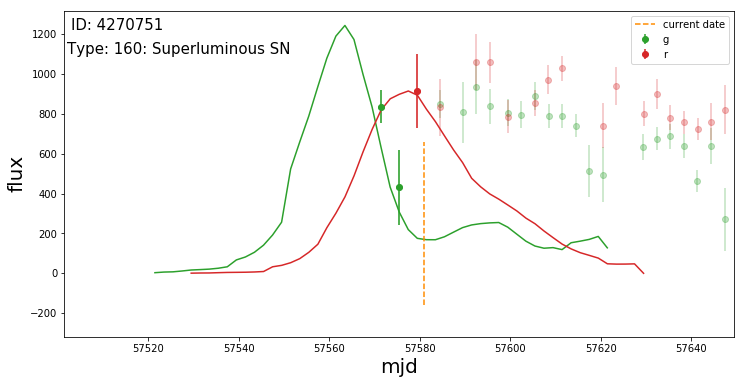

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57505.4992   r 645                 0 ...    72.0  28.39       99.0 4289576
57509.4864   g 645                 0 ...   57.79  28.62       99.0 4289576
57519.4665   g 645                 0 ...   33.25  28.38       99.0 4289576
57532.4631   r 645                 0 ...   77.09   28.5   28.80772 4289576
57536.4481   g 645                 0 ...   65.73  28.64  24.616608 4289576
57536.4777   r 645                 0 ...   67.39  28.53  25.095652 4289576
57539.4685   g 645                 0 ...   47.02  28.45  23.274734 4289576
57542.4453   g 645                 0 ...   30.42   28.3   22.57754 4289576
57542.4663   r 645                 0 ...   42.21  28.52   23.01881 4289576
57545.4559   g 645                 0 ...   27.05  28.18  22.192986 4289576
       ... ...          ...      ... ...     ...    ...        ...     ...
57683.2288   g 645       

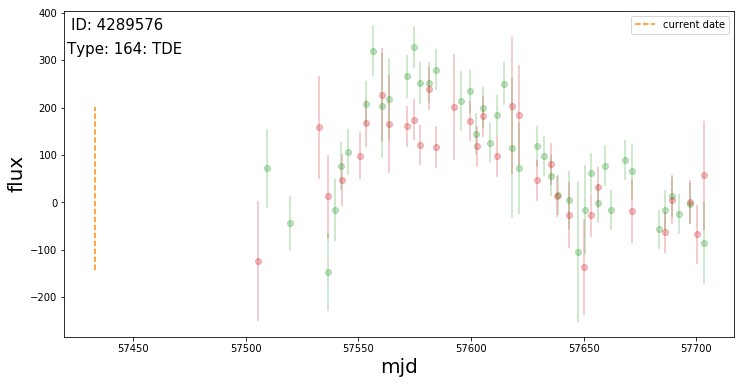

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57454.508   r 827                 0 ...   43.72   28.6       99.0 4293418
57454.5332   g 827                 0 ...   30.31  28.26       99.0 4293418
57462.5152   g 827                 0 ...   28.38  28.22       99.0 4293418
57462.5362   r 827                 0 ...    43.6   28.6       99.0 4293418
57467.4316   g 827                 0 ...   97.95  28.86       99.0 4293418
57467.5319   r 827                 0 ...   51.25  28.58       99.0 4293418
57470.4725   r 827                 0 ...   98.15  28.55       99.0 4293418
57470.5137   g 827                 0 ...  120.85  28.95       99.0 4293418
57473.5146   r 827                 0 ...   75.24  28.57       99.0 4293418
57473.5281   g 827                 0 ...  139.96  28.99       99.0 4293418
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.1161   g 827       

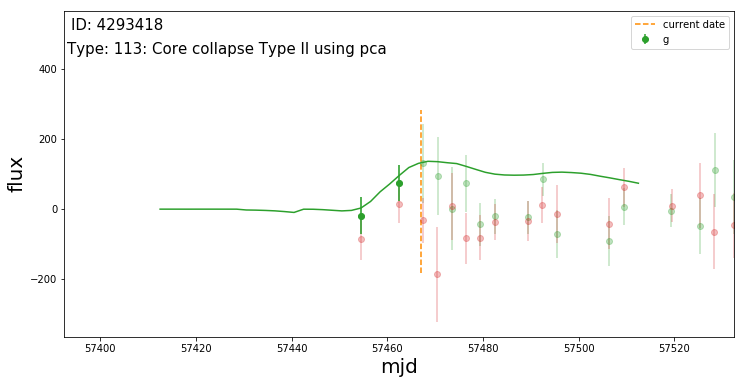

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57439.5038   g 725                 0 ...  120.81  28.96       99.0 4320683
57444.5268   r 725                 0 ...   68.17  28.54       99.0 4320683
57444.5559   g 725                 0 ...   97.76  28.83       99.0 4320683
57453.5135   r 725                 0 ...   38.68  28.52       99.0 4320683
57453.5282   g 725                 0 ...   29.65  28.27       99.0 4320683
57456.5091   g 725                 0 ...   26.17  28.15       99.0 4320683
57456.5383   r 725                 0 ...   38.72  28.59       99.0 4320683
57459.5112   r 725                 0 ...   39.02  28.64       99.0 4320683
57459.5359   g 725                 0 ...   25.08  28.15       99.0 4320683
57462.5085   g 725                 0 ...   24.63  28.18       99.0 4320683
       ... ...          ...      ... ...     ...    ...        ...     ...
57684.1008   r 725       

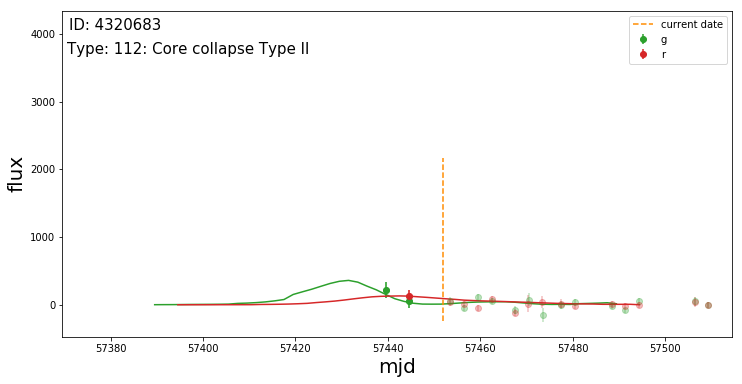

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57538.4615   g 341                 0 ...   78.67  28.81       99.0 4323280
57558.4181   g 341                 0 ...  142.36   29.1       99.0 4323280
57576.3808   g 341                 0 ...   37.76  28.45       99.0 4323280
 57576.478   r 341                 0 ...   46.13  28.49       99.0 4323280
57585.3775   g 341                 0 ...   73.02  28.76       99.0 4323280
57597.3789   g 341                 0 ...   39.44  28.41       99.0 4323280
57597.3996   r 341                 0 ...   48.57  28.47       99.0 4323280
57601.4192   g 341                 0 ...   35.27  28.36       99.0 4323280
57604.3773   r 341                 0 ...   45.03  28.48       99.0 4323280
57607.3354   g 341                 0 ...   34.41  28.36       99.0 4323280
       ... ...          ...      ... ...     ...    ...        ...     ...
57669.2856   g 341       

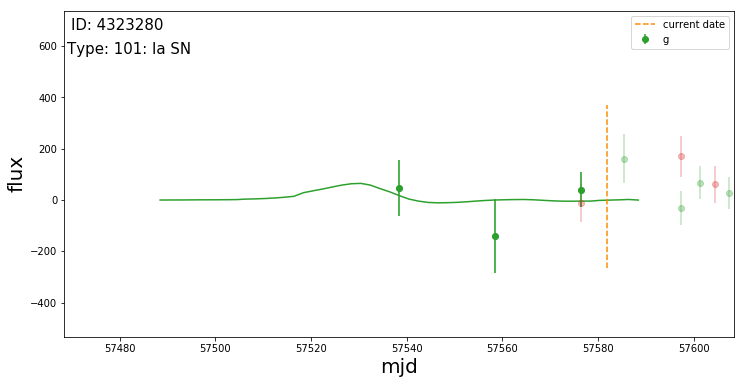

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4005   r 716                 0 ...   39.31  28.57   98.65991 4340714
57433.4274   g 716                 0 ...   22.57  28.07   98.65991 4340714
57436.3829   g 716                 0 ...    58.5  28.55   98.65991 4340714
57436.4504   r 716                 0 ...   46.89  28.51   98.65991 4340714
57439.3594   r 716                 0 ...  106.98  28.59   98.65991 4340714
57439.4026   g 716                 0 ...  197.85  29.11   98.65991 4340714
57444.3466   g 716                 0 ...   97.69  28.82   98.65991 4340714
57444.3895   r 716                 0 ...   83.31  28.51   98.65991 4340714
57451.3406   r 716                 0 ...   39.95  28.58   98.65991 4340714
57451.3844   g 716                 0 ...    22.4  28.06   98.65991 4340714
       ... ...          ...      ... ...     ...    ...        ...     ...
57585.2025   r 716       

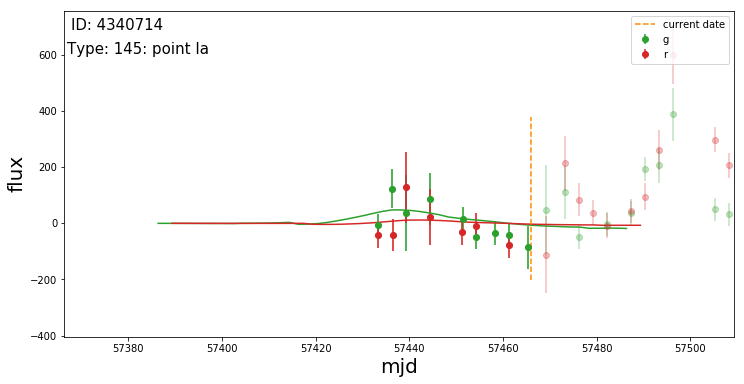

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57532.4593   r 444                 0 ...   96.17  28.53       99.0 4354092
57532.4817   g 444                 0 ...  244.78  29.35       99.0 4354092
 57539.482   r 444                 0 ...  127.34  28.53       99.0 4354092
57546.4439   g 444                 0 ...   34.91   28.4       99.0 4354092
57546.4779   r 444                 0 ...   46.45  28.47       99.0 4354092
57554.4423   g 444                 0 ...   32.63  28.34       99.0 4354092
57554.4623   r 444                 0 ...   48.14  28.58       99.0 4354092
57557.4185   g 444                 0 ...  112.07  28.94       99.0 4354092
57561.4194   g 444                 0 ...  173.06  29.16       99.0 4354092
 57561.439   r 444                 0 ...   107.1  28.58       99.0 4354092
       ... ...          ...      ... ...     ...    ...        ...     ...
57671.1902   r 444       

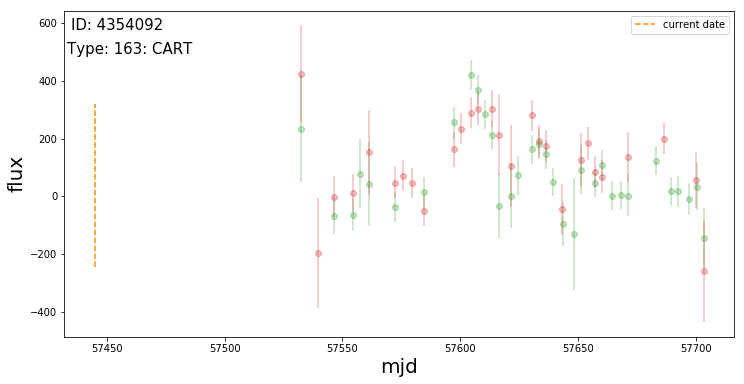

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57472.4996   r 641                 0 ...   95.01  28.43       99.0 4385382
57475.5207   r 641                 0 ...   65.54  28.45       99.0 4385382
57479.5067   g 641                 0 ...   54.49  28.61       99.0 4385382
57482.4935   r 641                 0 ...   45.86  28.52       99.0 4385382
57487.4866   g 641                 0 ...   32.56  28.36       99.0 4385382
57487.5055   r 641                 0 ...   47.45  28.64       99.0 4385382
 57490.484   g 641                 0 ...   28.83  28.28       99.0 4385382
57490.5053   r 641                 0 ...   50.41   28.6       99.0 4385382
 57494.487   g 641                 0 ...   29.86  28.23       99.0 4385382
57494.5083   r 641                 0 ...   56.78  28.54       99.0 4385382
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.1248   g 641       

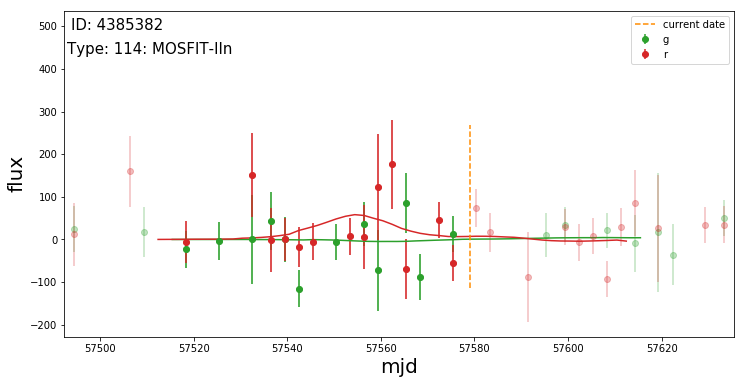

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2328   g 409                 0 ...   52.96  28.51       99.0 4393406
57436.1488   g 409                 0 ...  105.58  28.89       99.0 4393406
57443.1893   g 409                 0 ...   77.47  28.67       99.0 4393406
57443.2166   r 409                 0 ...   78.68  28.52       99.0 4393406
57451.1888   g 409                 0 ...   30.87  28.26       99.0 4393406
57454.1462   r 409                 0 ...   43.42   28.6       99.0 4393406
 57454.189   g 409                 0 ...   31.64  28.29       99.0 4393406
 57460.148   r 409                 0 ...   49.93  28.48       99.0 4393406
57460.1839   g 409                 0 ...   41.45  28.46       99.0 4393406
57463.1289   g 409                 0 ...   71.56   28.7       99.0 4393406
       ... ...          ...      ... ...     ...    ...        ...     ...
57681.4595   r 409       

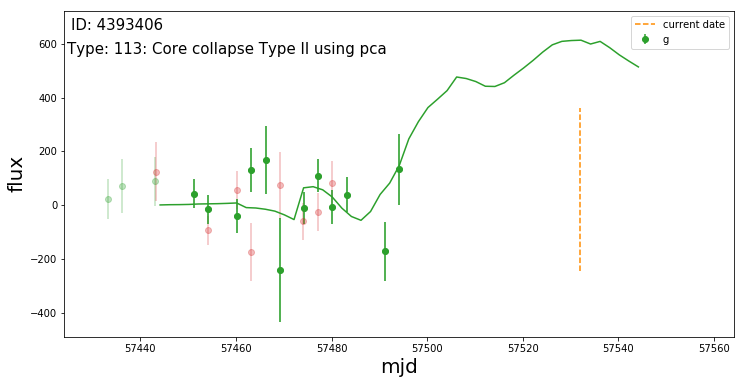

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5554   g 796                 0 ...   26.06  28.14  98.381714 4399084
57437.5285   g 796                 0 ...   28.85  28.22  98.381714 4399084
57443.5128   r 796                 0 ...    73.9  28.53  98.381714 4399084
57443.5542   g 796                 0 ...  122.59  28.94  98.381714 4399084
57452.5309   g 796                 0 ...   31.77   28.3  98.381714 4399084
57455.5165   g 796                 0 ...   26.28  28.21  98.381714 4399084
57455.5366   r 796                 0 ...   38.83  28.61  98.381714 4399084
57458.4951   r 796                 0 ...   36.98   28.5  98.381714 4399084
57458.5281   g 796                 0 ...    25.8  28.19  98.381714 4399084
57461.5116   g 796                 0 ...   23.85  28.16  98.381714 4399084
       ... ...          ...      ... ...     ...    ...        ...     ...
57494.4545   g 796       

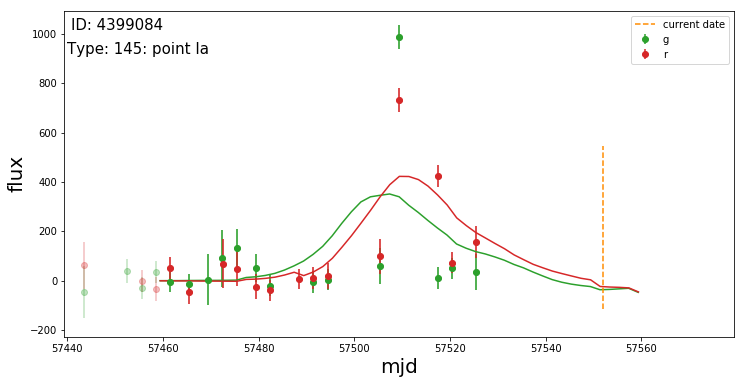

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.3153   r 569                 0 ...   45.95  28.54       99.0 4418149
57433.3591   g 569                 0 ...   27.23   28.2       99.0 4418149
57436.2554   r 569                 0 ...   77.15  28.56       99.0 4418149
57436.3067   g 569                 0 ...   85.05   28.7       99.0 4418149
57443.2459   g 569                 0 ...  104.24  28.81       99.0 4418149
57443.3158   r 569                 0 ...   99.24  28.54       99.0 4418149
57451.2527   g 569                 0 ...   24.31  28.11       99.0 4418149
57454.2723   g 569                 0 ...   25.93  28.15       99.0 4418149
57459.2311   r 569                 0 ...   36.87  28.55       99.0 4418149
57459.2691   g 569                 0 ...   24.23  28.13       99.0 4418149
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.5288   g 569       

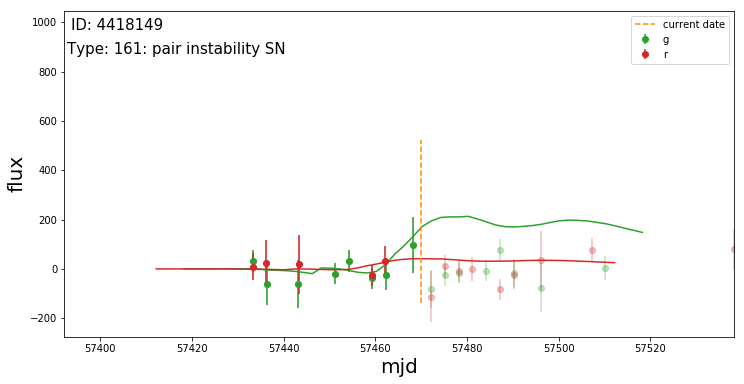

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2611   g 815                 0 ...   40.54  28.34       99.0 4491617
57433.2866   r 815                 0 ...   48.37  28.49       99.0 4491617
 57436.202   r 815                 0 ...    72.5  28.52       99.0 4491617
57436.2364   g 815                 0 ...   78.02  28.66       99.0 4491617
 57439.256   g 815                 0 ...  141.94  28.95       99.0 4491617
57439.3004   r 815                 0 ...  112.36  28.49       99.0 4491617
57443.2384   g 815                 0 ...   88.62  28.72       99.0 4491617
57443.3208   r 815                 0 ...   83.09  28.53       99.0 4491617
57451.2279   r 815                 0 ...   39.46   28.5       99.0 4491617
57451.2627   g 815                 0 ...   25.73  28.14       99.0 4491617
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4711   g 815       

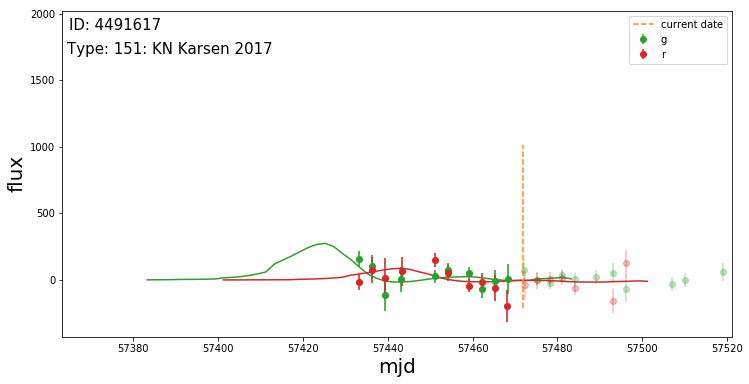

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5214   r 583                 0 ...   39.61  28.62       99.0 4493815
 57434.544   g 583                 0 ...   26.43  28.17       99.0 4493815
57437.5434   r 583                 0 ...   42.49  28.56       99.0 4493815
57443.5011   r 583                 0 ...   84.06  28.58       99.0 4493815
57452.4815   r 583                 0 ...    38.7   28.6       99.0 4493815
57455.5024   g 583                 0 ...    24.1  28.11       99.0 4493815
57459.4606   g 583                 0 ...   24.68  28.16       99.0 4493815
 57459.481   r 583                 0 ...   36.74  28.57       99.0 4493815
57462.4388   g 583                 0 ...   24.65  28.18       99.0 4493815
57465.4812   r 583                 0 ...   37.47  28.55       99.0 4493815
       ... ...          ...      ... ...     ...    ...        ...     ...
57581.2349   r 583       

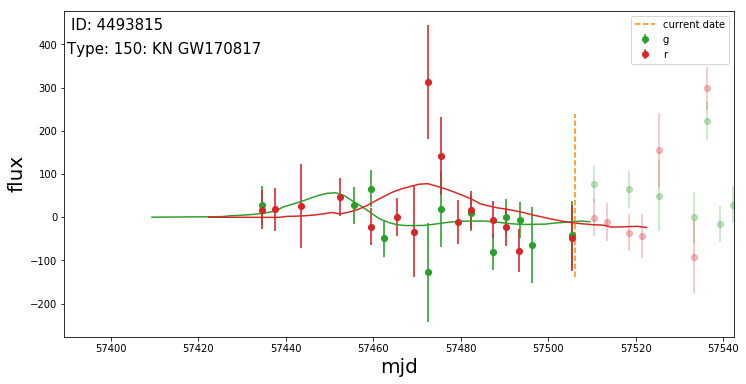

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
 57433.441   g 675                 0 ...   23.96  28.14   98.98062 4499939
57436.4629   r 675                 0 ...   39.49  28.53   98.98062 4499939
57439.4611   r 675                 0 ...   80.26   28.5   98.98062 4499939
57439.5052   g 675                 0 ...   86.38  28.68   98.98062 4499939
 57443.375   r 675                 0 ...   104.9  28.51   98.98062 4499939
57443.3984   g 675                 0 ...  130.92  28.98   98.98062 4499939
57451.3959   g 675                 0 ...    24.0  28.13   98.98062 4499939
57451.4421   r 675                 0 ...    35.2  28.52   98.98062 4499939
57454.3782   g 675                 0 ...   24.78  28.16   98.98062 4499939
 57454.437   r 675                 0 ...   35.65  28.52   98.98062 4499939
       ... ...          ...      ... ...     ...    ...        ...     ...
57569.2055   r 675       

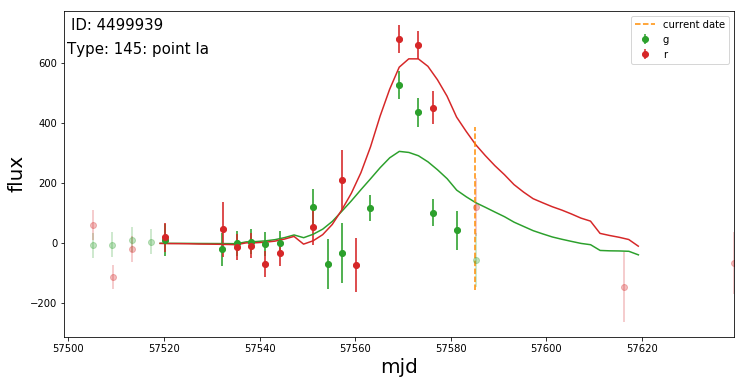

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2173   r 783              4096 ...   54.32  28.59   19.33099 4506575
57433.2626   g 783                 0 ...   41.12  28.39  20.503767 4506575
 57436.201   r 783                 0 ...   77.76  28.59  19.331528 4506575
57436.2168   g 783              6144 ...   84.35  28.73  20.506182 4506575
57443.2031   g 783                 0 ...   72.75  28.66   20.50375 4506575
57443.2848   r 783                 0 ...   85.65  28.63   19.33098 4506575
 57451.225   r 783                 0 ...   41.08   28.6  19.331732 4506575
57451.2651   g 783              4096 ...   26.47  28.23  20.506166 4506575
57454.2439   r 783                 0 ...   44.13  28.63  19.331537 4506575
57454.2579   g 783              4096 ...   25.99  28.13  20.505733 4506575
       ... ...          ...      ... ...     ...    ...        ...     ...
57687.4725   g 783       

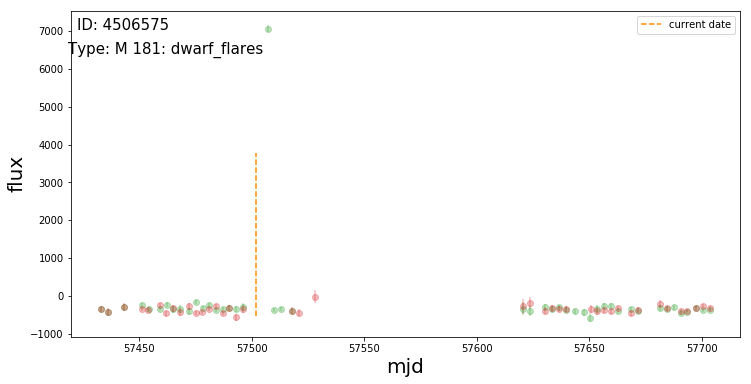

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57555.4426   g 446                 0 ...   36.37  28.45  22.216331 4538621
57558.4196   g 446                 0 ...  152.21  29.15  21.553139 4538621
 57562.479   r 446                 0 ...   98.97  28.43  21.141094 4538621
57573.4573   g 446              4096 ...   30.71  28.28  21.068235 4538621
57576.4574   g 446              6144 ...   30.69  28.27  21.225811 4538621
57581.4622   r 446              4096 ...   43.92  28.63   21.01992 4538621
57585.4613   g 446                 0 ...   31.78  28.32  22.193264 4538621
57585.4826   r 446                 0 ...   72.99  28.57  21.325977 4538621
57597.3831   g 446                 0 ...   35.64  28.38  23.163446 4538621
 57597.467   r 446                 0 ...   51.94  28.58  21.867943 4538621
       ... ...          ...      ... ...     ...    ...        ...     ...
57683.2114   g 446       

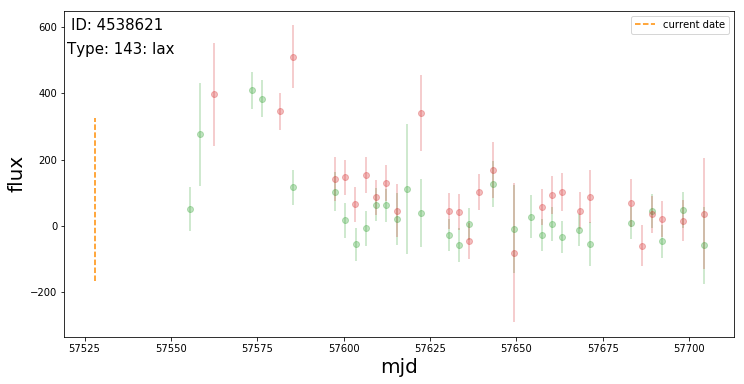

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.2443   g 744                 0 ...   48.35  28.43   99.04966 4601210
57436.1388   r 744                 0 ...   80.18  28.52   99.04966 4601210
57436.1651   g 744                 0 ...   89.54  28.73   99.04966 4601210
57439.1813   g 744                 0 ...  126.34  28.91   99.04966 4601210
57443.1386   g 744                 0 ...   30.31  28.21   99.04966 4601210
57443.1556   r 744                 0 ...   45.16  28.55   99.04966 4601210
57451.1761   r 744                 0 ...   42.17  28.62   99.04966 4601210
57451.2049   g 744                 0 ...   25.75  28.16   99.04966 4601210
57454.1763   r 744                 0 ...    40.5  28.64   99.04966 4601210
57454.2058   g 744                 0 ...   27.42  28.21   99.04966 4601210
       ... ...          ...      ... ...     ...    ...        ...     ...
 57687.435   r 744       

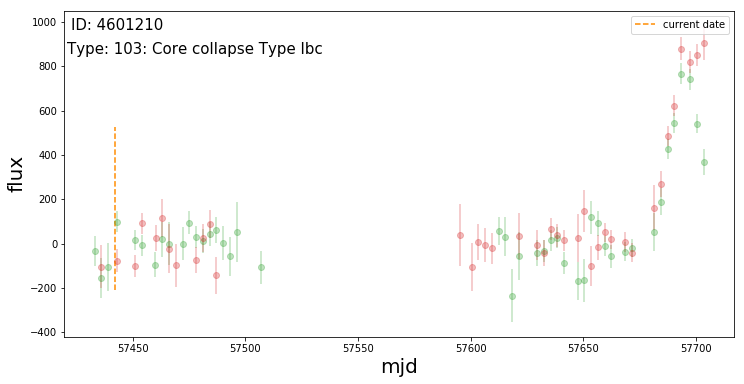

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.5494   g 634                 0 ...    26.4  28.22  21.800325 4601293
57437.5252   g 634                 0 ...    28.2   28.2  21.801022 4601293
57443.5236   r 634                 0 ...   76.83  28.62   20.42821 4601293
57443.5446   g 634                 0 ...  114.23  28.87   21.79855 4601293
57451.5247   g 634                 0 ...    36.6  28.32   21.79955 4601293
57451.5448   r 634                 0 ...   56.58  28.53  20.429255 4601293
57454.5041   r 634                 0 ...   38.51  28.61  20.410168 4601293
57458.4837   r 634              4096 ...   38.46  28.64  18.566574 4601293
57461.4999   r 634                 0 ...   36.61  28.58  20.428905 4601293
57461.5203   g 634                 0 ...   22.82  28.08  21.797928 4601293
       ... ...          ...      ... ...     ...    ...        ...     ...
57644.1272   r 634       

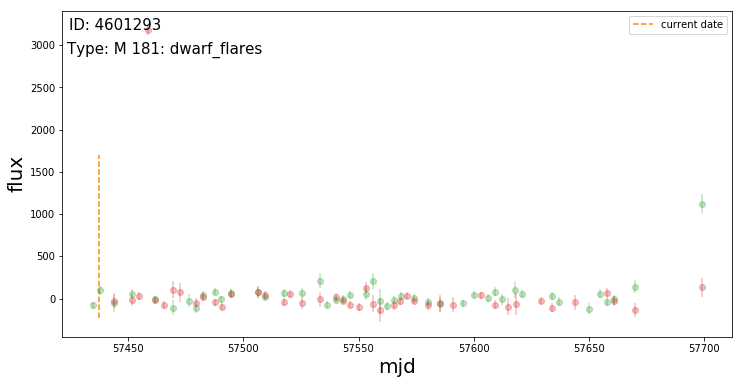

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.3784   r 523                 0 ...    41.6   28.6       99.0 4656912
57433.4181   g 523                 0 ...    25.0  28.16       99.0 4656912
57436.3772   g 523                 0 ...   60.62  28.58       99.0 4656912
57439.3563   r 523                 0 ...  133.98  28.58       99.0 4656912
57444.3487   g 523                 0 ...  113.99  28.89       99.0 4656912
57444.3938   r 523                 0 ...   103.7  28.58       99.0 4656912
57451.2965   g 523                 0 ...   27.41  28.25       99.0 4656912
57454.3149   r 523                 0 ...   43.67  28.61       99.0 4656912
57454.3351   g 523                 0 ...   27.37   28.2       99.0 4656912
57459.2953   g 523                 0 ...   25.54  28.19       99.0 4656912
       ... ...          ...      ... ...     ...    ...        ...     ...
57545.1706   r 523       

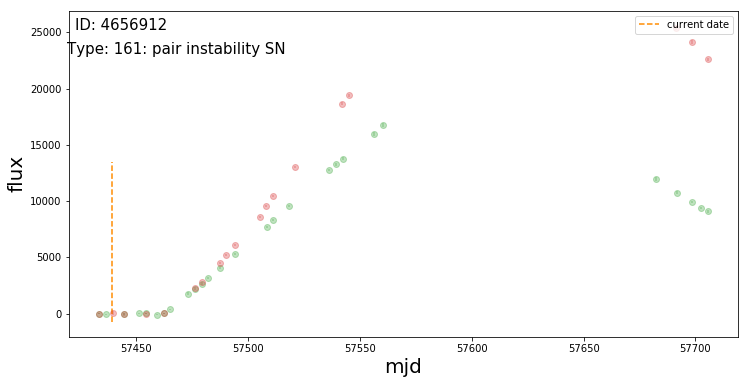

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57444.5272   r 726                 0 ...   67.85  28.49   99.11781 4657660
57444.5554   g 726                 0 ...   98.49   28.8   99.11781 4657660
57453.5277   g 726                 0 ...   30.85  28.26   99.11781 4657660
57456.5187   g 726                 0 ...   29.03  28.23   99.11781 4657660
57456.5282   r 726                 0 ...   38.26  28.52   99.11781 4657660
57459.5126   r 726                 0 ...   39.05  28.54   99.11781 4657660
57459.5355   g 726                 0 ...   25.29  28.11   99.11781 4657660
57462.5172   g 726                 0 ...    25.1  28.12   99.11781 4657660
57462.5337   r 726                 0 ...   40.64  28.62   99.11781 4657660
57467.4891   g 726                 0 ...   50.66  28.49   99.11781 4657660
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.1223   g 726       

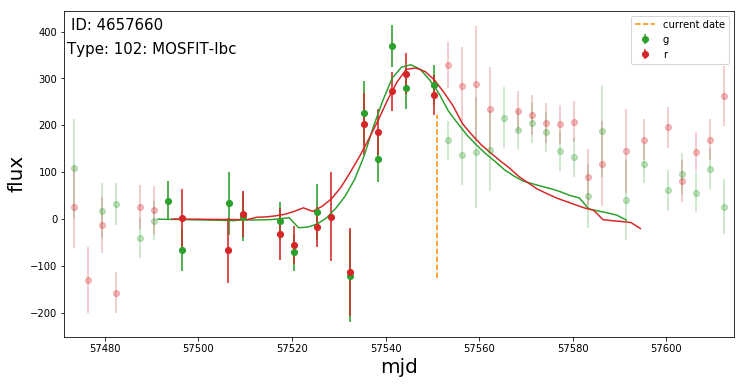

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.3395   r 622                 0 ...   42.55  28.55  98.170456 4680642
57436.3319   g 622                 0 ...   69.26   28.6  23.265005 4680642
57436.3374   r 622                 0 ...   69.02  28.52  23.667492 4680642
57439.2738   g 622                 0 ...  170.05  29.05  21.178904 4680642
57439.3248   r 622                 0 ...  130.04  28.52  21.308786 4680642
57444.2815   g 622              4096 ...   88.95  28.77  20.645567 4680642
57444.3044   r 622              6144 ...   87.21  28.54   20.33633 4680642
57451.2779   r 622              4096 ...   39.03  28.58  20.949478 4680642
 57451.297   g 622                 0 ...   24.44  28.11  22.482925 4680642
57454.2909   g 622                 0 ...   25.08  28.12  23.268303 4680642
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.5112   r 622       

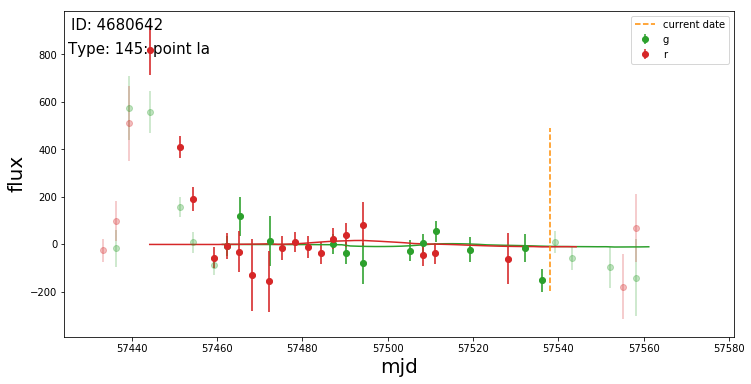

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57540.4826   r 499                 0 ...  133.72  28.57  19.618055 4685402
57552.4548   g 499                 0 ...   36.66  28.35  20.995493 4685402
57555.4445   g 499                 0 ...   37.84  28.44   20.99626 4685402
57558.4672   g 499                 0 ...   101.8  28.89  20.995913 4685402
57561.4208   g 499                 0 ...  153.44  29.11  20.997435 4685402
57561.4404   r 499                 0 ...    87.4  28.57  19.618341 4685402
57572.4434   g 499                 0 ...   29.98  28.25  20.996252 4685402
57572.4647   r 499                 0 ...    41.5  28.57  19.618341 4685402
57575.4548   g 499                 0 ...   27.98  28.23  20.996456 4685402
57575.4602   r 499                 0 ...   40.92  28.56  19.618341 4685402
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.2698   r 499       

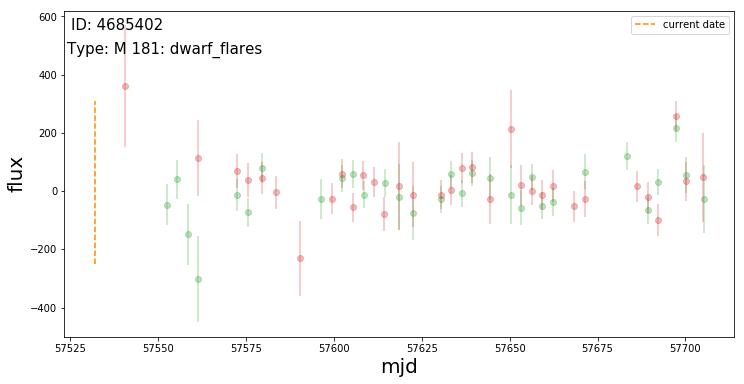

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57532.4593   r 444                 0 ...   96.17  28.53       99.0 4688909
57532.4817   g 444                 0 ...  244.78  29.35       99.0 4688909
 57539.482   r 444                 0 ...  127.34  28.53       99.0 4688909
57546.4439   g 444                 0 ...   34.91   28.4       99.0 4688909
57546.4779   r 444                 0 ...   46.45  28.47       99.0 4688909
57554.4423   g 444                 0 ...   32.63  28.34       99.0 4688909
57554.4623   r 444                 0 ...   48.14  28.58       99.0 4688909
57557.4185   g 444                 0 ...  112.07  28.94       99.0 4688909
57561.4194   g 444                 0 ...  173.06  29.16       99.0 4688909
 57561.439   r 444                 0 ...   107.1  28.58       99.0 4688909
       ... ...          ...      ... ...     ...    ...        ...     ...
57671.1902   r 444       

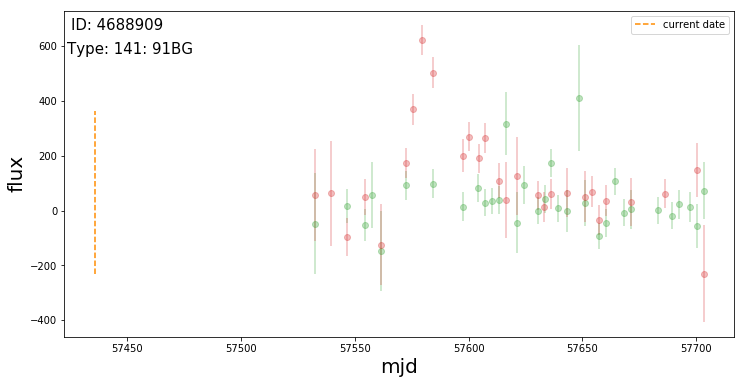

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57434.1127   r 694                 0 ...   76.67   28.5   99.07489 4694264
57434.1385   g 694                 0 ...   76.28  28.78   99.07489 4694264
57438.1354   g 694                 0 ...  153.63  29.13   99.07489 4694264
57533.4765   r 694                 0 ...   76.98  28.39   99.07489 4694264
57537.4465   r 694                 0 ...   63.52  28.54   99.07489 4694264
 57537.474   g 694                 0 ...   56.92  28.55   99.07489 4694264
57541.4793   g 694                 0 ...   41.12  28.39   99.07489 4694264
57551.4562   g 694                 0 ...   30.41  28.23   99.07489 4694264
57551.4661   r 694                 0 ...   45.94  28.53   99.07489 4694264
57554.4509   g 694                 0 ...   33.77  28.34   99.07489 4694264
       ... ...          ...      ... ...     ...    ...        ...     ...
57686.3232   r 694       

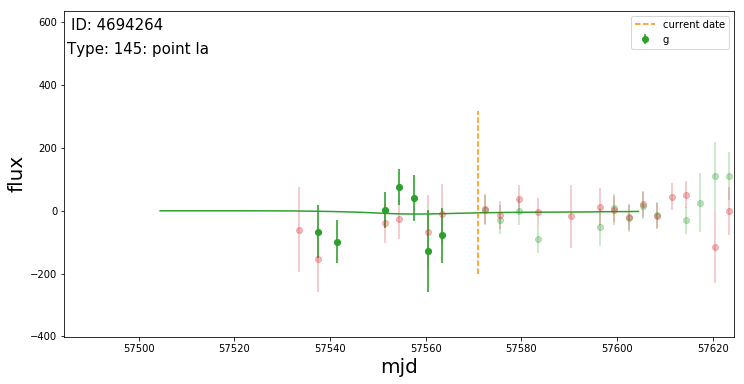

   MJD     FLT    FIELD     PHOTFLAG ... SKY_SIG ZEROPT SIM_MAGOBS   SNID 
---------- --- ------------ -------- ... ------- ------ ---------- -------
57433.4072   r 790                 0 ...   40.87  28.62       99.0 4702261
57433.4327   g 790                 0 ...    24.0  28.14       99.0 4702261
57436.3926   g 790                 0 ...   61.12   28.6       99.0 4702261
57436.4048   r 790                 0 ...   61.99   28.6       99.0 4702261
57439.2847   g 790                 0 ...  153.57  29.08       99.0 4702261
57439.4308   r 790                 0 ...  100.73  28.57       99.0 4702261
57443.3586   r 790                 0 ...   93.55  28.63       99.0 4702261
57451.3521   r 790                 0 ...   41.13  28.62  23.423506 4702261
57451.3897   g 790                 0 ...   23.76  28.14  23.538208 4702261
57454.3476   g 790                 0 ...   26.94  28.21  23.073296 4702261
       ... ...          ...      ... ...     ...    ...        ...     ...
57682.5325   g 790       

KeyboardInterrupt: 

<Figure size 864x432 with 0 Axes>

In [15]:
decouple_prediction_bands = True
decouple_pc_bands = False
mark_maximum = False
use_filter = False
min_flux_threshold = 20
num_pc_components = 3
use_random_current_date = True

arr103 = []
for object_id in object_ids:
    #object_id = 136110
    event_df = data_ob.get_data_of_event(object_id)
    print(event_df)
    pc = PredictLightCurve(data_ob, object_id=object_id)
    #pc.lc.plot_light_curve(color_band_dict=color_band_dict)
    current_date = None
    if use_random_current_date:
        #median_date = np.median(pc.lc.dates_of_maximum)
        #current_date = median_date+random()*50-25
        current_min = np.amin(lc.df[data_ob.time_col_name])
        current_max = np.amax(lc.df[data_ob.time_col_name])
        current_date = int(random()*(current_max-current_min)+current_min)
    #print(current_date)
    coeff_dict, num_pts_dict = pc.predict_lc_coeff(current_date=current_date,num_pc_components=num_pc_components, band_choice='z', decouple_pc_bands=decouple_pc_bands, decouple_prediction_bands=decouple_prediction_bands, min_flux_threshold=min_flux_threshold, bands=bands)
    print(coeff_dict)
    object_type_num = data_ob.get_object_type_number(object_id)
    if dataset_val ==1:
        object_type = ztf_ob_type_name(object_type_num)
    elif dataset_val == 0:
        object_type = data_ob.get_object_type_for_PLAsTiCC(object_id)
    #if object_type_num == 101: 
    #    arr103.append(object_id)
    #print(object_type_num)
    fig = pc.plot_predicted_bands(all_band_coeff_dict=coeff_dict, color_band_dict=color_band_dict, mark_maximum=mark_maximum,axes_lims = True)
    fig.gca().annotate("Type: "+ object_type, xy=(.09,.86),xycoords='figure fraction',fontsize=15)
    plt.show()
    plt.close('all')

In [ ]:
arr103.sort()

In [ ]:
arr101.sort()

In [ ]:
print(arr101)

In [ ]:
print(arr103)